In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import xarray as xr
import matplotlib.pyplot as plt
import cmocean
import cartopy.crs as ccrs
import numpy as np
from xgcm import Grid
import momlevel as ml

Matplotlib is building the font cache; this may take a moment.


In [265]:
from dask.distributed import Client
from dask_jobqueue import SLURMCluster 

portdash=19131

cluster = SLURMCluster(
    queue="analysis",
    cores=4,
    project="gfdl_o",
    job_extra=["-C bigmem"],
    memory="128GB",
    walltime="04:00:00",
    scheduler_options={"dashboard_address":f'{portdash}'},
)

client=Client(cluster)
client

/nbhome/Rebecca.Beadling/miniconda/envs/py39/lib/python3.9/site-packages/distributed/node.py:160: UserWarning: Port 19131 is already in use.
Perhaps you already have a cluster running?
Hosting the HTTP server on port 35153 instead
  warnings.warn(


<Client: 'tcp://140.208.147.5:45105' processes=0 threads=0, memory=0 B>

In [266]:
cluster.scale(10)

In [4]:
## There are some issues with the cm4 cmip6 output, so preprocessing is required when reading 
## in the data using xr.open_mfdataset()

def preprocess_cmip6_uo(ds):
    '''slice in the yh_sub02 dimension first because there is a bug in the cmip6 output'''
    dsnew = ds.isel(yh_sub02=slice(6,None)).rename({'yh_sub02':'yh'})
    return dsnew

def preprocess_cmip6_vol(ds):
    '''slice in the yh_sub01 dimension first because there is a bug in the cmip6 output'''
    dsnew = ds.isel(yh_sub01=slice(6,None)).rename({'yh_sub01':'yh'})
    return dsnew

def load_ocean_Drake_Passage(model_config):  
    if model_config == 'cmip6-cm4':
        ds_T = xr.open_mfdataset('/archive/oar.gfdl.cmip6/CM4/warsaw_201710_om4_v1.0.1/CM4_piControl_C/gfdl.ncrc4-intel16-prod-openmp/pp/ocean_Drake_Passage/ts/monthly/5yr/*thetao.nc',
                               combine='by_coords',use_cftime=True,preprocess=preprocess_cmip6_vol)
        ds_S = xr.open_mfdataset('/archive/oar.gfdl.cmip6/CM4/warsaw_201710_om4_v1.0.1/CM4_piControl_C/gfdl.ncrc4-intel16-prod-openmp/pp/ocean_Drake_Passage/ts/monthly/5yr/*so.nc',
                               combine='by_coords',use_cftime=True,preprocess=preprocess_cmip6_vol)
        ds_u = xr.open_mfdataset('/archive/oar.gfdl.cmip6/CM4/warsaw_201710_om4_v1.0.1/CM4_piControl_C/gfdl.ncrc4-intel16-prod-openmp/pp/ocean_Drake_Passage/ts/monthly/5yr/*uo.nc',
                               combine='by_coords',use_cftime=True,preprocess=preprocess_cmip6_uo)
        ds_umo = xr.open_mfdataset('/net/Rebecca.Beadling/dora_scripts/data/cm4_cmip6/*.umo.nc',
                               combine='by_coords',use_cftime=True,preprocess=preprocess_cmip6_uo)
        ds_drake = xr.merge([ds_T,ds_S,ds_u,ds_umo])
    
    if model_config == 'cmip6-cm4-1pct':
        ds_T = xr.open_mfdataset('/archive/oar.gfdl.cmip6/CM4/warsaw_201710_om4_v1.0.1/CM4_1pctCO2_C/gfdl.ncrc4-intel16-prod-openmp/pp/ocean_Drake_Passage/ts/monthly/5yr/*thetao.nc',
                               combine='by_coords',use_cftime=True,preprocess=preprocess_cmip6_vol)
        ds_S = xr.open_mfdataset('/archive/oar.gfdl.cmip6/CM4/warsaw_201710_om4_v1.0.1/CM4_1pctCO2_C/gfdl.ncrc4-intel16-prod-openmp/pp/ocean_Drake_Passage/ts/monthly/5yr/*so.nc',
                               combine='by_coords',use_cftime=True,preprocess=preprocess_cmip6_vol)
        ds_u = xr.open_mfdataset('/archive/oar.gfdl.cmip6/CM4/warsaw_201710_om4_v1.0.1/CM4_1pctCO2_C/gfdl.ncrc4-intel16-prod-openmp/pp/ocean_Drake_Passage/ts/monthly/5yr/*uo.nc',
                               combine='by_coords',use_cftime=True,preprocess=preprocess_cmip6_uo)
        ds_umo = xr.open_mfdataset('/archive/oar.gfdl.cmip6/CM4/warsaw_201710_om4_v1.0.1/CM4_1pctCO2_C/gfdl.ncrc4-intel16-prod-openmp/pp/ocean_Drake_Passage/ts/monthly/5yr/*umo.nc',
                               combine='by_coords',use_cftime=True,preprocess=preprocess_cmip6_uo)
        ds_drake = xr.merge([ds_T,ds_S,ds_u,ds_umo])
        
    if model_config == 'cmip6-cm4-ssp585':
        ds_T = xr.open_mfdataset('/archive/oar.gfdl.cmip6/CM4/warsaw_201803_om4_v1.0.1/CM4_Scenario_ssp585/gfdl.ncrc4-intel16-prod-openmp/pp/ocean_Drake_Passage/ts/monthly/5yr/*thetao.nc',
                               combine='by_coords',use_cftime=True,preprocess=preprocess_cmip6_vol)
        ds_S = xr.open_mfdataset('/archive/oar.gfdl.cmip6/CM4/warsaw_201803_om4_v1.0.1/CM4_Scenario_ssp585/gfdl.ncrc4-intel16-prod-openmp/pp/ocean_Drake_Passage/ts/monthly/5yr/*so.nc',
                               combine='by_coords',use_cftime=True,preprocess=preprocess_cmip6_vol)
        ds_u = xr.open_mfdataset('/archive/oar.gfdl.cmip6/CM4/warsaw_201803_om4_v1.0.1/CM4_Scenario_ssp585/gfdl.ncrc4-intel16-prod-openmp/pp/ocean_Drake_Passage/ts/monthly/5yr/*uo.nc',
                               combine='by_coords',use_cftime=True,preprocess=preprocess_cmip6_uo)
        ds_umo = xr.open_mfdataset('/archive/oar.gfdl.cmip6/CM4/warsaw_201803_om4_v1.0.1/CM4_Scenario_ssp585/gfdl.ncrc4-intel16-prod-openmp/pp/ocean_Drake_Passage/ts/monthly/5yr/*umo.nc',
                               combine='by_coords',use_cftime=True,preprocess=preprocess_cmip6_uo)
        ds_drake = xr.merge([ds_T,ds_S,ds_u,ds_umo])
    
    return ds_drake

In [5]:
static_om4p25 = xr.open_dataset('/archive/Raphael.Dussin/FMS2019.01.03_devgfdl_20210308/CM4_piControl_c192_OM4p25/gfdl.ncrc4-intel18-prod-openmp/pp/ocean_annual_z/ocean_annual_z.static.nc')

In [6]:
## Load om4p25 configurations:
cmip6_cm4 = load_ocean_Drake_Passage('cmip6-cm4').rename({'xh_sub01':'xh',
                                                          'xq_sub01':'xq',         
                                              })

#cmip6_cm4_1pct = load_ocean_Drake_Passage('cmip6-cm4-1pct').rename({'xh_sub01':'xh',
#                                                          'xq_sub01':'xq',         
#                                              })

#cmip6_cm4_ssp585 = load_ocean_Drake_Passage('cmip6-cm4-ssp585').rename({'xh_sub01':'xh',
#                                                          'xq_sub01':'xq',         
#                                              })

### Functions to be used in calculations

In [7]:
g = 9.81       ## m s-2 
rho_0 = 1035.  ## kg m-3 Ref density used in MOM6

def annual_mean(array):
    """
    weight by days in each month
    """
    # Determine month length
    month_length = array.time.dt.days_in_month
    # Calculate weights
    wgts = month_length.groupby('time.year') / month_length.groupby('time.year').sum()
    # Make sure the weights in each year add up to 1
    np.testing.assert_allclose(wgts.groupby("time.year").sum(xr.ALL_DIMS), 1.0)
    # Setup our masking for nan values
    cond = array.isnull()
    ones = xr.where(cond, 0.0, 1.0)
    # Calculate the numerator
    array_sum = (array * wgts).resample(time="AS").sum(dim="time")
    # Calculate the denominator
    ones_out = (ones * wgts).resample(time="AS").sum(dim="time")
    # Return the weighted average
    return array_sum / ones_out


def compute_coriolis(darray):
    """
    Calculate the Coriolis frequency (f) if not provided in the ocean_static file
    
    Parameters
    -----------
    darray: xarray.DataArray
        Two dimensional data array containing model's geolat variable
    
    Returns
    -----------
    f: xarray.DataArray
        Two dimensional data array containing computed Corilis parameter f. 
    """
    
    w = 7.292124e-5                             #Earth's angular velocity in rad s-1 (2*pi / T, where T is Earth's sidereal period, 23 hrs, 56 min, 4 sec.)
    lat_rad = (darray.geolat_c)*((2*np.pi)/360) #np.sin takes an angle in radians, so need to convert lat from degrees to rad.
    f = (2*w)*np.sin(lat_rad)
    return f


def compute_dz_between_u_points(thk):
    
    """
    Calculate the discrete vertical distance (dz) between two points where 
    the zonal geostrophic velocities are located that are derived from our
    potential density field. These vertically are on the cell centers (z_l)
    , but we must account for partial cells are the ocean bottom.
       
    For du/dz, the vertical shear, the dz refers to the depth in m between
    our two u velocities, this is NOT equivalent to grid cell thickness. 
    The correct dz between u points is computed using this function.
    
    Parameters
    ----------
    thk : xarray.DataArray
        Data Array containing interpolated thickness on xh,yq points
        which as already been subset in yq for the Drake Passage
        
    Returns
    ----------
    dz_u_points: xarray.DataArray
        Data Array containing the distance in m between zonal 
        geostrophic velocities to be used in Thermal Wind Transport calculation
    """
    
    kmax = thk.shape[0]                             ## of z levels
    zl  = 0.0 * thk[:]                              ## Thickness is zero everywhere 
    zl[0] = 0.5 * thk[0]                            ## Multiple first element by 0.5 .... first element is the top cell

    k = 1
    while k < kmax:
        zl[k] = (0.5*(thk[k-1])) + (0.5*(thk[k]))
        k=k+1

    dz_u_points = xr.DataArray(zl,dims=thk.dims,coords=thk.coords)
    
    return dz_u_points


def slice_static_array(sliced_array,static_array):
    """ 
    Slice the ocean static array along the Y dimension so that it can be used to 
    create xgcm grid object to be used with the Drake Passage post-processed model
    output which is provided only at the Drake Passage cross-section.
    
    Parameters
    ----------
    sliced_array : xarray.DataArray
        Data Array containing drake passage subset data.
        
    static_array : xarray.DataArray
        Data Array containing full ocean static field that
        you wish to slice.
        
    Returns
    ----------
    static_sliced_array: xarray.DataArray
        Data Array containing the static field sliced in the Y dimensions to be used
        with the post processed Drake Passage subset data.
    
    """
    
    ## Find yq point adjacent to the first yh point in our rho array:
    y_south_0 = sliced_array.yh[0]
    y_south_1 = sliced_array.yh[1]
    diff_y_south = np.abs(y_south_1 - y_south_0)
    yq_point_south = y_south_0 + (diff_y_south/2)

    ## Find yq point adjacent to the last yh point in our rho array:
    y_north_1 = sliced_array.yh[-1]
    y_north_0 = sliced_array.yh[-2]
    diff_y_north = np.abs(y_north_1 - y_north_0)
    yq_point_north = y_north_1 + (diff_y_north/2)

    ## Find index where yq points are:
    yq_south_idx = np.abs(static_array.yq - yq_point_south.values).argmin()
    yq_north_idx = np.abs(static_array.yq - yq_point_north.values).argmin()
    yh_south_idx = np.abs(static_array.yh - y_south_0.values).argmin()
    yh_north_idx = np.abs(static_array.yh - y_north_1.values).argmin()

    ## We must slice our static array to be equal to the section
    ## defined from yq=288 to yq=578, (so indexed as 578+1)
    static_sliced_array = static_array.isel(yq=slice(yq_south_idx.values,yq_north_idx.values + 2),
                                            yh=slice(yh_south_idx.values,yh_north_idx.values+1))
    
    
    return static_sliced_array

### Define grid object for Drake Passage sliced array

In [8]:
static_sliced_om4p25 = slice_static_array(cmip6_cm4,static_om4p25)

grid_sliced_p25 = Grid(static_sliced_om4p25, 
                coords={'X': {'center': 'xh', 'outer': 'xq'},
                        'Y': {'center': 'yh', 'outer': 'yq'},
                        }, periodic=['X'])

## Compute thermal wind transport from density field

Geostrophic Balance:
\begin{equation}
u_g = -\frac{1}{\rho_0 f} \frac{\partial p}{\partial y}
\end{equation}

Hydrostatic Approximation:
\begin{equation}
\frac{\partial p}{\partial z} = -\rho g
\end{equation}

Thermal Wind Equation:
\begin{equation}
\frac{\partial u}{\partial z} = \frac{g}{\rho_0 f}\frac{\partial \rho}{\partial y}
\end{equation}

Thermal Wind Velocity (or geostrophic velocity, u_geo), assuming a level of no motion (zero velocity) at ocean bottom:

\begin{equation}
u_{geo}  = \int_{0}^{H} \frac{g}{\rho_0 f}\frac{\partial \rho}{\partial y} dz + u_0
\end{equation}

#### Compute potential density referenced to local pressure level (depth for Boussinesque fluid) and the thermal expansion and haline contraction coefficients

In [9]:
rho_cmip6_cm4 = ml.derived.calc_rho(cmip6_cm4.thetao,
                                       cmip6_cm4.so,
                                       cmip6_cm4.z_l*1e4).squeeze()
alpha_cmip6_cm4 = ml.derived.calc_alpha(cmip6_cm4.thetao,
                                       cmip6_cm4.so,
                                       cmip6_cm4.z_l*1e4).squeeze()
beta_cmip6_cm4 = ml.derived.calc_beta(cmip6_cm4.thetao,
                                       cmip6_cm4.so,
                                       cmip6_cm4.z_l*1e4).squeeze()

#rho_cmip6_cm4_1pct = ml.derived.calc_rho(cmip6_cm4_1pct.thetao,
#                                       cmip6_cm4_1pct.so,
#                                       cmip6_cm4_1pct.z_l*1e4).squeeze()
#alpha_cmip6_cm4_1pct = ml.derived.calc_alpha(cmip6_cm4_1pct.thetao,
#                                       cmip6_cm4_1pct.so,
#                                       cmip6_cm4_1pct.z_l*1e4).squeeze()
#beta_cmip6_cm4_1pct = ml.derived.calc_beta(cmip6_cm4_1pct.thetao,
#                                       cmip6_cm4_1pct.so,
#                                       cmip6_cm4_1pct.z_l*1e4).squeeze()

#rho_cmip6_cm4_ssp585 = ml.derived.calc_rho(cmip6_cm4_ssp585.thetao,
#                                       cmip6_cm4_ssp585.so,
#                                       cmip6_cm4_ssp585.z_l*1e4).squeeze()
#alpha_cmip6_cm4_ssp585 = ml.derived.calc_alpha(cmip6_cm4_ssp585.thetao,
#                                       cmip6_cm4_ssp585.so,
#                                       cmip6_cm4_ssp585.z_l*1e4).squeeze()
#beta_cmip6_cm4_ssp585 = ml.derived.calc_beta(cmip6_cm4_ssp585.thetao,
#                                       cmip6_cm4_ssp585.so,
#                                       cmip6_cm4_ssp585.z_l*1e4).squeeze()

In [159]:
def compute_thermal_wind(static_sliced_array,rho_array,TS_dataset,grid_object):
    # Coriolis defined at same points that ddens_dy will end up:
    f = grid_object.interp(static_sliced_array.Coriolis,'X',boundary='fill').sel(xh=rho_array.xh.values,method='nearest')
    
    # Discrete difference of density along Y axis:
    diff_dens = grid_object.diff(rho_array,'Y',boundary='fill')
    
    # Distance between yh points:
    dy = static_sliced_array.dyCv.sel(xh=rho_array.xh.values,method='nearest')
    
    # Difference in density / distance of yh points
    ddens_dy = (diff_dens/dy)
    
    # thickness between z levels accounting for partial cells at ocean bottom:
    thk = ml.derived.calc_dz(TS_dataset.z_l,TS_dataset.z_i,static_sliced_array.deptho)
    thk = thk.where(thk>0).sel(xh=rho_array.xh.values,method='nearest')
    thk_interp = grid_object.interp(thk,'Y',boundary='fill')
    
    dz_u_points = compute_dz_between_u_points(thk_interp)
    #dz_u_points = thk_interp
    
    ddens_dy_times_dz = (ddens_dy)*dz_u_points     
    constant = g / (rho_0*f)
    
    ## This is our du field which then must be cumulatively summed vertically from bottom to top to get the zonal geostrophic velocity ugeo:
    ugeo_intermed = (constant*ddens_dy_times_dz).squeeze().transpose("z_l","yq","time")   
    ugeo = ugeo_intermed.reindex(z_l=ugeo_intermed.z_l[::-1]).cumsum('z_l')

    ## Compute total volume transport, U:
    U_Sv = (ugeo*thk_interp*dy)/10**6
    TWT_Sv = U_Sv.sum(dim=(['yq','z_l']))
    TWT_Sv_upper_1000 = U_Sv.reindex(z_l=U_Sv.z_l[::-1]).sel(z_l=slice(0,1000)).sum(dim=(['yq','z_l']))
    TWT_Sv_below_1000 = U_Sv.reindex(z_l=U_Sv.z_l[::-1]).sel(z_l=slice(1000,None)).sum(dim=(['yq','z_l']))
    
    return ugeo, TWT_Sv, TWT_Sv_upper_1000, TWT_Sv_below_1000, ddens_dy

### Decompose the thermal wind velocity into a contribution from horizontal gradients in S ($u_{geo,S}$) and from $\theta$ ($u_{geo,\theta}$)

\begin{equation}
\frac{\partial \rho}{\partial y} = \rho_0 * (-\alpha*\frac{\partial \theta}{\partial y} + \beta*\frac{\partial S}{\partial y})
\end{equation}

Thermal Expansion Coefficient:
\begin{equation}
\alpha = -\frac{1}{\rho_0}\frac{\partial \rho}{\partial \theta}
\end{equation}

\begin{equation}
-\alpha*\rho_0*\frac{\partial \theta}{\partial y} = \frac{\partial \rho}{\partial y}
\end{equation}

\begin{equation}
\frac{\partial u}{\partial z} = \frac{g}{\rho_0 f}  (-\alpha*\rho_0*\frac{\partial \theta}{\partial y}) 
\end{equation}

\begin{equation}
u_{geo,\theta}  = \int_{0}^{H} \frac{g}{\rho_0 f}(-\alpha*\rho_0*\frac{\partial \theta}{\partial y}) dz + u_0
\end{equation}

Haline Contraction Coefficient:
\begin{equation}
\beta = \frac{1}{\rho_0}\frac{\partial \rho}{\partial S}
\end{equation}

\begin{equation}
\beta*\rho_0*\frac{\partial S}{\partial y} = \frac{\partial \rho}{\partial y}
\end{equation}

\begin{equation}
\frac{\partial u}{\partial z} = \frac{g}{\rho_0 f}  (\beta*\rho_0*\frac{\partial S}{\partial y}) 
\end{equation}

\begin{equation}
u_{geo,S}  = \int_{0}^{H} \frac{g}{\rho_0 f}(\beta*\rho_0*\frac{\partial S}{\partial y}) dz + u_0
\end{equation}

Summation of transport due to temperature gradients and salinity gradients should approximate transport due to density gradients:
\begin{equation}
u_{geo} = u_{geo,\theta} + u_{geo,S}  
\end{equation}

In [269]:
def compute_thermal_wind_salinity(static_sliced_array,TS_dataset,grid_object,beta_array):
    # Coriolis defined at same points that ddens_dy will end up:
    f = grid_object.interp(static_sliced_array.Coriolis,'X',boundary='fill').sel(xh=TS_dataset.xh.values,method='nearest')
    
    # alpha defined at the same ponits that dT_dy will end up:
    beta = grid_object.interp(beta_array,'Y',boundary='fill')
    
    # Discrete difference of density along Y axis:
    diff_so = grid_object.diff(TS_dataset.so,'Y',boundary='fill')
    
    # Distance between yh points:
    dy = static_sliced_array.dyCv.sel(xh=TS_dataset.xh.values,method='nearest')
    
    # Difference in density / distance of yh points
    dso_dy_beta = beta*(diff_so/dy)
    
    # thickness between z levels accounting for partial cells at ocean bottom:
    thk = ml.derived.calc_dz(TS_dataset.z_l,TS_dataset.z_i,static_sliced_array.deptho)
    thk = thk.where(thk>0).sel(xh=TS_dataset.xh.values,method='nearest')
    thk_interp = grid_object.interp(thk,'Y',boundary='fill')
    
    dz_u_points = compute_dz_between_u_points(thk_interp)
    #dz_u_points = thk_interp
    
    dso_dy_times_dz = dso_dy_beta*dz_u_points     
    constant = g / (rho_0*f)
    
    ## This is our du field which then must be cumulatively summed vertically from bottom to top to get the zonal geostrophic velocity ugeo:
    ugeo_intermed = (constant*dso_dy_times_dz).squeeze().transpose("z_l","yq","time")   
    ugeo = ugeo_intermed.reindex(z_l=ugeo_intermed.z_l[::-1]).cumsum('z_l')

    ## Compute total volume transport, U:
    U_Sv = (ugeo*thk_interp*dy)/10**6
    TWT_Sv = U_Sv.sum(dim=(['yq','z_l']))
    TWT_Sv_upper_1000 = U_Sv.reindex(z_l=U_Sv.z_l[::-1]).sel(z_l=slice(0,1000)).sum(dim=(['yq','z_l']))
    TWT_Sv_below_1000 = U_Sv.reindex(z_l=U_Sv.z_l[::-1]).sel(z_l=slice(1000,None)).sum(dim=(['yq','z_l']))
    
    return ugeo, TWT_Sv, TWT_Sv_upper_1000, TWT_Sv_below_1000, dso_dy_beta

In [161]:
def compute_thermal_wind_temp(static_sliced_array,TS_dataset,grid_object,alpha_array):
    # Coriolis defined at same points that dT_dy will end up:
    f = grid_object.interp(static_sliced_array.Coriolis,'X',boundary='fill').sel(xh=TS_dataset.xh.values,method='nearest')
    
    # alpha defined at the same ponits that dT_dy will end up:
    alpha = grid_object.interp(alpha_array,'Y',boundary='fill')
    
    # Discrete difference of density along Y axis:
    diff_T = grid_object.diff(TS_dataset.thetao,'Y',boundary='fill')
    
    # Distance between yh points:
    dy = static_sliced_array.dyCv.sel(xh=TS_dataset.xh.values,method='nearest')
    
    # Difference in density / distance of yh points
    dT_dy_alpha = (diff_T/dy)*alpha
    
    # thickness between z levels accounting for partial cells at ocean bottom:
    thk = ml.derived.calc_dz(TS_dataset.z_l,TS_dataset.z_i,static_sliced_array.deptho)
    thk = thk.where(thk>0).sel(xh=TS_dataset.xh.values,method='nearest')
    thk_interp = grid_object.interp(thk,'Y',boundary='fill')
    
    dz_u_points = compute_dz_between_u_points(thk_interp)
    #dz_u_points = thk_interp
    
    dT_dy_times_dz = (dT_dy_alpha)*dz_u_points     
    constant = g / (rho_0*f)
    
    ## This is our du field which then must be cumulatively summed vertically from bottom to top to get the zonal geostrophic velocity ugeo:
    ugeo_intermed = (constant*dT_dy_times_dz).squeeze().transpose("z_l","yq","time")   
    ugeo = ugeo_intermed.reindex(z_l=ugeo_intermed.z_l[::-1]).cumsum('z_l')

    ## Compute total volume transport, U:
    U_Sv = (ugeo*thk_interp*dy)/10**6
    TWT_Sv = U_Sv.sum(dim=(['yq','z_l']))
    TWT_Sv_upper_1000 = U_Sv.reindex(z_l=U_Sv.z_l[::-1]).sel(z_l=slice(0,1000)).sum(dim=(['yq','z_l']))
    TWT_Sv_below_1000 = U_Sv.reindex(z_l=U_Sv.z_l[::-1]).sel(z_l=slice(1000,None)).sum(dim=(['yq','z_l']))
    
    return ugeo, TWT_Sv, TWT_Sv_upper_1000, TWT_Sv_below_1000, dT_dy_alpha

### Compute bottom velocity transport

In [162]:
def compute_bottom_velocity_transport(static_array,zonal_velocity_array,TS_dataset,grid_object):
    ### Isolate bottom velocities
    uo_bottom = zonal_velocity_array.ffill('z_l').isel(z_l=-1)
    
    ### Only have thickness at tracer points, so to use for velocity calculation, we need
    ### to interpolate thickness to xq points:
    thk = ml.derived.calc_dz(TS_dataset.z_l,TS_dataset.z_i,static_array.deptho)
    thk_interp = grid_object.interp(thk,'X',boundary='fill')
    
    ### locate index of xq value:
    xloc = zonal_velocity_array.xq.values
    xloc_idx = np.abs(static_array.xq - xloc).argmin()
    
    ### Isolate thkness and dy in Drake region
    thk_interp_drake = thk_interp.isel(xq=xloc_idx)
    total_depth_drake = thk_interp_drake.sum(dim='z_l')
    
    ### Compute the bottom velocity transport
    dy = static_array.dyCu.isel(xq=xloc_idx)
    U_bottom = total_depth_drake*dy*uo_bottom
    BVT_Sv = U_bottom.sum(dim=(['yh']))/10**6
    
    ### For plot of BV velocity expanded through the water column
    uo_bottom_mask = zonal_velocity_array.where(zonal_velocity_array == uo_bottom)
    bottom_vel_filled = uo_bottom_mask.bfill('z_l')

    return bottom_vel_filled, BVT_Sv, U_bottom

In [163]:
grid_full_p25 = Grid(static_om4p25, 
                coords={'X': {'center': 'xh', 'outer': 'xq'},
                        'Y': {'center': 'yh', 'outer': 'yq'},
                        }, periodic=['X'])

### Compute all ACC transport components for CM4's piControl simulation

In [164]:
## total transport from umo:
total_umo_cmip6 = cmip6_cm4.umo.sum(dim=['yh','z_l'])/10**6/1035
total_umo_cmip6_annual_mean = annual_mean(total_umo_cmip6)

## bottom velocity transport:
BottomVelTransport_cmip6 = compute_bottom_velocity_transport(static_om4p25,cmip6_cm4.uo,cmip6_cm4,grid_full_p25)
BottomVelTransport_cmip6_annual_mean = annual_mean(BottomVelTransport_cmip6[1])

## thermal wind transports:
TWT_cmip6_salinity = compute_thermal_wind_salinity(static_sliced_om4p25,cmip6_cm4,grid_sliced_p25,beta_cmip6_cm4)
TWT_cmip6_salinity_annual_mean = annual_mean(TWT_cmip6_salinity[1])
TWT_cmip6_temp = compute_thermal_wind_temp(static_sliced_om4p25,cmip6_cm4,grid_sliced_p25,alpha_cmip6_cm4)
TWT_cmip6_temp_annual_mean = annual_mean(TWT_cmip6_temp[1])
TWT_cmip6 = compute_thermal_wind(static_sliced_om4p25,rho_cmip6_cm4,cmip6_cm4,grid_sliced_p25)
TWT_cmip6_annual_mean = annual_mean(TWT_cmip6[1])
TWT_sum_of_components = (-TWT_cmip6_temp_annual_mean + TWT_cmip6_salinity_annual_mean)*1035

/nbhome/Rebecca.Beadling/miniconda/envs/py39/lib/python3.9/site-packages/xarray/core/indexes.py:234: FutureWarning: Passing method to Float64Index.get_loc is deprecated and will raise in a future version. Use index.get_indexer([item], method=...) instead.
  indexer = self.index.get_loc(
/nbhome/Rebecca.Beadling/miniconda/envs/py39/lib/python3.9/site-packages/xarray/core/indexes.py:234: FutureWarning: Passing method to Float64Index.get_loc is deprecated and will raise in a future version. Use index.get_indexer([item], method=...) instead.
  indexer = self.index.get_loc(
/nbhome/Rebecca.Beadling/miniconda/envs/py39/lib/python3.9/site-packages/xarray/core/indexes.py:234: FutureWarning: Passing method to Float64Index.get_loc is deprecated and will raise in a future version. Use index.get_indexer([item], method=...) instead.
  indexer = self.index.get_loc(


### Compute maximum mixed layer depth in the Ross Sea to identify polynya periods

In [16]:
mld_restrat_cmip6 = xr.open_mfdataset('/archive/oar.gfdl.cmip6/CM4/warsaw_201710_om4_v1.0.1/CM4_piControl_C/gfdl.ncrc4-intel16-prod-openmp/pp/ocean_monthly/ts/monthly/5yr/*MLD_restrat.nc',
                                     combine='by_coords',use_cftime=True).sel(yh=slice(-80,-50))

In [17]:
mld_restrat_cmip6_cm4 = mld_restrat_cmip6.MLD_restrat
mld_ross = mld_restrat_cmip6_cm4.sel(xh=slice(-220,-100),yh=slice(-80,-55))
mld_weddell = mld_restrat_cmip6_cm4.sel(xh=slice(-62,20),yh=slice(-80,-55))

mld_ross_max_monthly = mld_ross.max(dim=['xh','yh'])
mld_weddell_max_monthly = mld_weddell.max(dim=['xh','yh'])

mld_ross_max_annual = mld_ross_max_monthly.groupby('time.year').max(dim='time')
mld_weddell_max_annual = mld_weddell_max_monthly.groupby('time.year').max(dim='time')

### Load surface water mass transformation analysis

In [18]:
cm4_south_of_60S_swmt = xr.open_dataset('/work/jet/data/interim/CM4_piControl_so_0001to0650_southof600S_swmt_onvoffshelf_decomposed_sigma2_002.nc')


In [19]:
cm4_south_of_60S_swmt_annual_max = cm4_south_of_60S_swmt.groupby('time.year').max(dim='time')/10**6

### Load full x,y field umo to compute Antarctic Slope Current time series

In [20]:
umo_cmip6 = xr.open_mfdataset('/archive/oar.gfdl.cmip6/CM4/warsaw_201710_om4_v1.0.1/CM4_piControl_C/gfdl.ncrc4-intel16-prod-openmp/pp/ocean_annual_z/ts/annual/5yr/*umo.nc',
                               combine='by_coords',use_cftime=True).sel(yh=slice(-90,-50)).chunk({'time':20,'xq':288,'yh':126})

In [21]:
asc_20e_cmip6 = umo_cmip6.umo.sel(yh=slice(-70.5,-68)).sel(xq=20.51,method='nearest').sum(dim=['yh','z_l'])*(1/1035)*1e-6*-1

/nbhome/Rebecca.Beadling/miniconda/envs/py39/lib/python3.9/site-packages/xarray/core/indexes.py:234: FutureWarning: Passing method to Float64Index.get_loc is deprecated and will raise in a future version. Use index.get_indexer([item], method=...) instead.
  indexer = self.index.get_loc(


### Load sea surface height output

### Load full x,y field temperature and salinity for gyre subsurface and stratification metrics 

In [280]:
salt_cmip6 = xr.open_mfdataset('/archive/oar.gfdl.cmip6/CM4/warsaw_201710_om4_v1.0.1/CM4_piControl_C/gfdl.ncrc4-intel16-prod-openmp/pp/ocean_annual_z/ts/annual/5yr/*.so.nc',
                               combine='by_coords',use_cftime=True).sel(yh=slice(-90,-50)).chunk({'time':20,'xh':288,'yh':126})
temp_cmip6 = xr.open_mfdataset('/archive/oar.gfdl.cmip6/CM4/warsaw_201710_om4_v1.0.1/CM4_piControl_C/gfdl.ncrc4-intel16-prod-openmp/pp/ocean_annual_z/ts/annual/5yr/*thetao.nc',
                               combine='by_coords',use_cftime=True).sel(yh=slice(-90,-50)).chunk({'time':20,'xh':288,'yh':126})

### Define Ross and Weddell Regions and Compute Subsurface Heat Content Metrics

In [281]:
def Ross_weighted_average(array, static):
    Ross = array.sel(yh=slice(-80,-55),xh=slice(-220,-100))
    areaweights = static.areacello
    Ross_weighted = Ross.weighted(areaweights.sel(yh=slice(-80,-55),xh=slice(-220,-100))).mean(dim=["xh","yh"])
    
    return Ross_weighted

def Weddell_weighted_average(array, static):
    Weddell = array.sel(yh=slice(-80,-55),xh=slice(-62,20))
    areaweights = static.areacello
    Weddell_weighted = Weddell.weighted(areaweights.sel(yh=slice(-80,-55),xh=slice(-62,20))).mean(dim=["xh","yh"])
    
    return Weddell_weighted

In [282]:
temp_ross = Ross_weighted_average(temp_cmip6.thetao,static_om4p25)
salt_ross = Ross_weighted_average(salt_cmip6.so,static_om4p25)
temp_weddell = Weddell_weighted_average(temp_cmip6.thetao,static_om4p25)
salt_weddell = Weddell_weighted_average(salt_cmip6.so,static_om4p25)

In [25]:
t_max_ross = temp_ross.max(dim='z_l')
t_max_ross_location = temp_ross.idxmax(dim='z_l')
s_max_ross = salt_ross.max(dim='z_l')
s_max_ross_location = salt_ross.idxmax(dim='z_l')

t_max_weddell = temp_weddell.max(dim='z_l')
t_max_weddell_location = temp_weddell.idxmax(dim='z_l')
s_max_weddell = salt_weddell.max(dim='z_l')
s_max_weddell_location = salt_weddell.idxmax(dim='z_l')

NameError: name 'temp_ross' is not defined

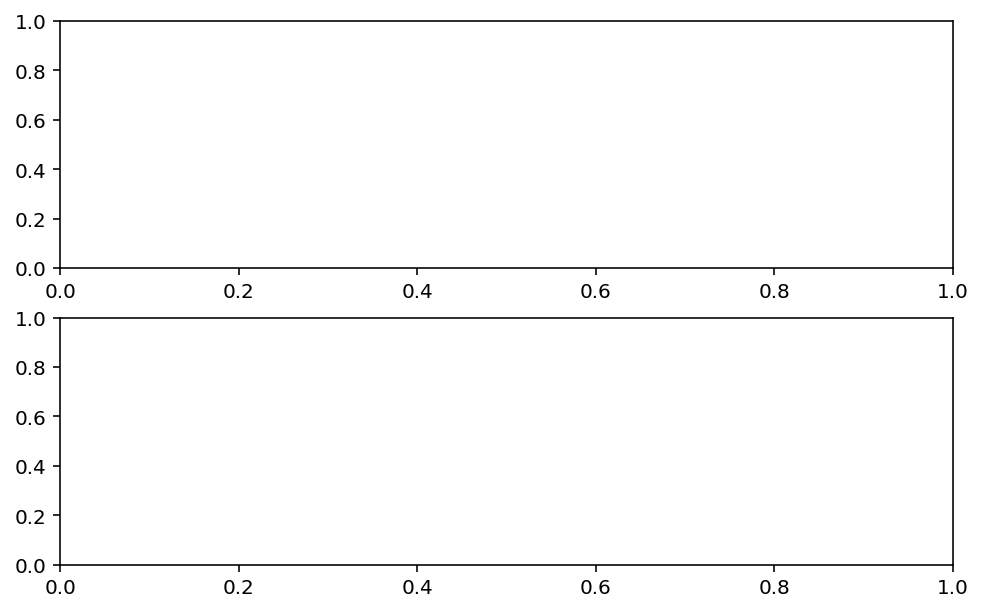

In [276]:
f, (a0, a1) = plt.subplots(2, 1, gridspec_kw={'height_ratios': [1,1]},figsize=(8,5))

temp_ross.plot.contourf(ax=a0,y='z_l',
                        yincrease=False,
                        cmap=cmocean.cm.balance,
                        vmin=-2,
                        vmax=2,
                        levels=30,
                        extend='both',
                        ylim=(0,6000))

temp_ross.plot.contour(ax=a0,y='z_l',
                        yincrease=False,
                        colors='grey',
                        vmin=-2,
                        vmax=2,
                        levels=30,
                        linewidths=0.3,
                        ylim=(0,6000))

t_max_ross_location.plot(ax=a0,
                         yincrease=False,
                         color='white',linewidth=0.60)

salt_ross.plot.contourf(ax=a1,y='z_l',
                        yincrease=False,
                        cmap='viridis',
                        vmin=34.20,
                        vmax=34.80,
                        levels=80,
                        extend='both',
                        ylim=(0,6000))

salt_ross.plot.contour(ax=a1,y='z_l',
                        yincrease=False,
                        colors='grey',
                        vmin=34.20,
                        vmax=34.80,
                        levels=80,
                        linewidths=0.3,
                        ylim=(0,6000))

s_max_ross_location.plot(ax=a1,
                         yincrease=False,
                         color='white',linewidth=0.60)

a0.grid(linestyle='--',linewidth=0.5, color='black')
a1.grid(linestyle='--',linewidth=0.5, color='black')

a0.set_xlabel('')
a1.set_xlabel('Model Year')

a0.set_ylabel('Depth [m]')
a1.set_ylabel('Depth [m]')

In [ ]:
f, (a0, a1) = plt.subplots(2, 1, gridspec_kw={'height_ratios': [1,1]},figsize=(8,5))

t_max_ross.plot(ax=a0)
s_max_ross.plot(ax=a1)

a0.grid(linestyle='--',linewidth=0.5, color='black')
a1.grid(linestyle='--',linewidth=0.5, color='black')

a0.set_xlabel('')
a1.set_xlabel('Model Year')

a0.set_ylabel('Subsurface Max. Temperature')
a1.set_ylabel('Subsurface Max. Salinity')

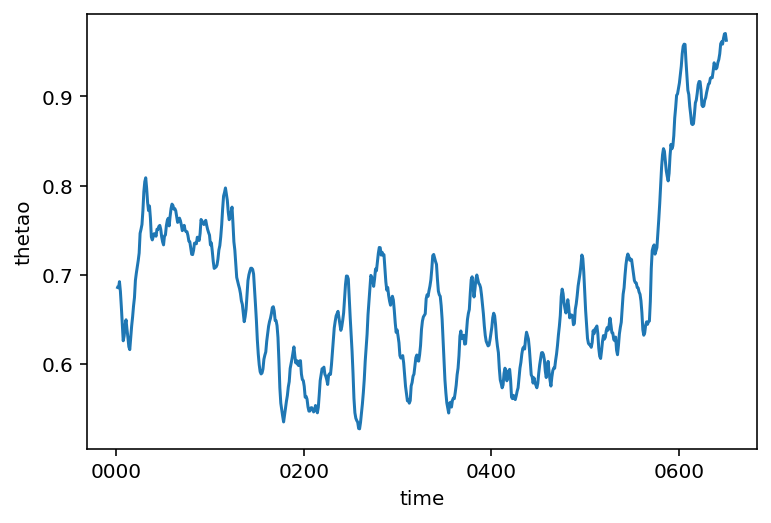

In [92]:
t_max_weddell.plot()

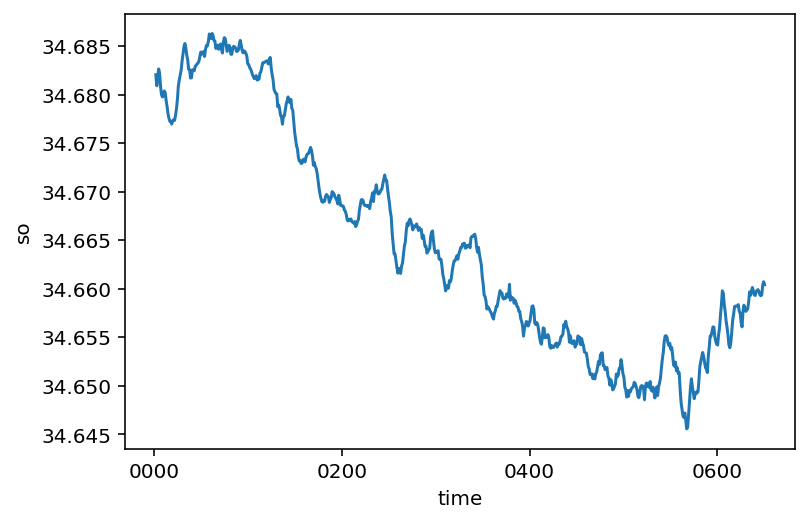

In [93]:
s_max_weddell.plot()

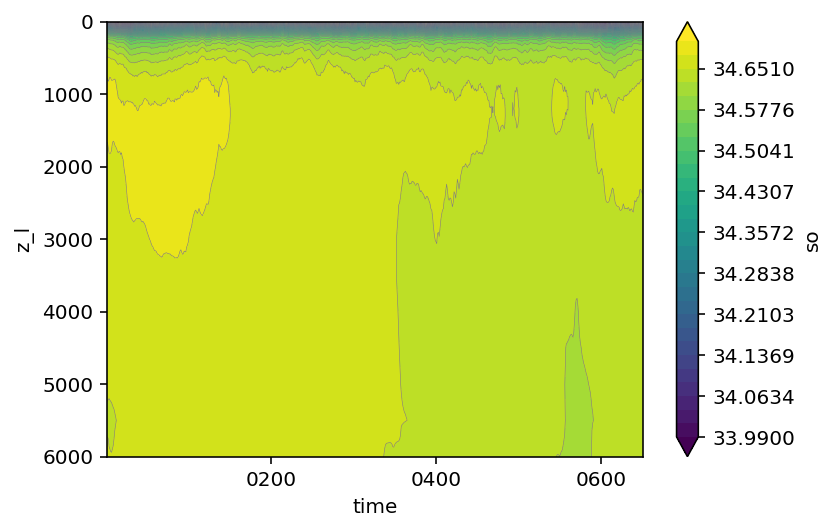

In [37]:
salt_weddell.plot.contourf(y='z_l',
                        yincrease=False,
                        cmap='viridis',
                        ylim=(6000,0),
                        levels=30,
                        vmin=33.99,
                        vmax=34.70,
                        extend='both')

salt_weddell.plot.contour(y='z_l',
                        yincrease=False,
                        colors='grey',
                        linewidths=0.3,
                        ylim=(6000,0),
                        levels=30,
                        vmin=33.99,
                        vmax=34.70)

Text(0, 0.5, 'Depth [m]')

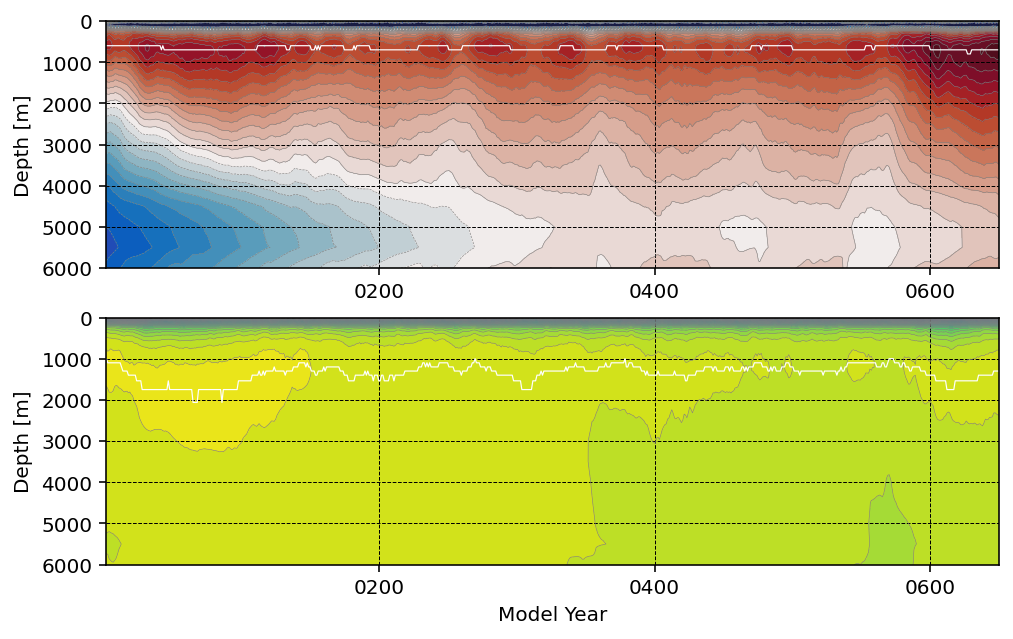

In [39]:
f, (a0, a1) = plt.subplots(2, 1, gridspec_kw={'height_ratios': [1,1]},figsize=(8,5))

temp_weddell.plot.contourf(ax=a0,y='z_l',
                        yincrease=False,
                        cmap=cmocean.cm.balance,
                        vmin=-1,
                        vmax=1,
                        levels=30,
                        extend='both',add_colorbar=False,
                        ylim=(6000,0))

temp_weddell.plot.contour(ax=a0,y='z_l',
                        yincrease=False,
                        colors='grey',
                        linewidths=0.3,
                        vmin=-1,
                        vmax=1,
                        levels=30,
                        ylim=(6000,0))

t_max_weddell_location.plot(ax=a0,
                         yincrease=False,
                         color='white',linewidth=0.60)

salt_weddell.plot.contourf(ax=a1,y='z_l',
                        yincrease=False,
                        cmap='viridis',
                        ylim=(6000,0),
                        levels=30,
                        vmin=33.99,
                        vmax=34.70,
                        extend='both',
                        add_colorbar=False)

salt_weddell.plot.contour(ax=a1,y='z_l',
                        yincrease=False,
                        colors='grey',
                        linewidths=0.3,
                        ylim=(6000,0),
                        levels=30,
                        vmin=33.99,
                        vmax=34.70,
                        )

s_max_weddell_location.plot(ax=a1,
                         yincrease=False,
                         color='white',linewidth=0.60)

a0.grid(linestyle='--',linewidth=0.5, color='black')
a1.grid(linestyle='--',linewidth=0.5, color='black')

a0.set_xlabel('')
a1.set_xlabel('Model Year')

a0.set_ylabel('Depth [m]')
a1.set_ylabel('Depth [m]')

[Text(-803000, 0, ''),
 Text(-730000, 0, ''),
 Text(-657000, 0, ''),
 Text(-584000, 0, ''),
 Text(-511000, 0, ''),
 Text(-438000, 0, '')]

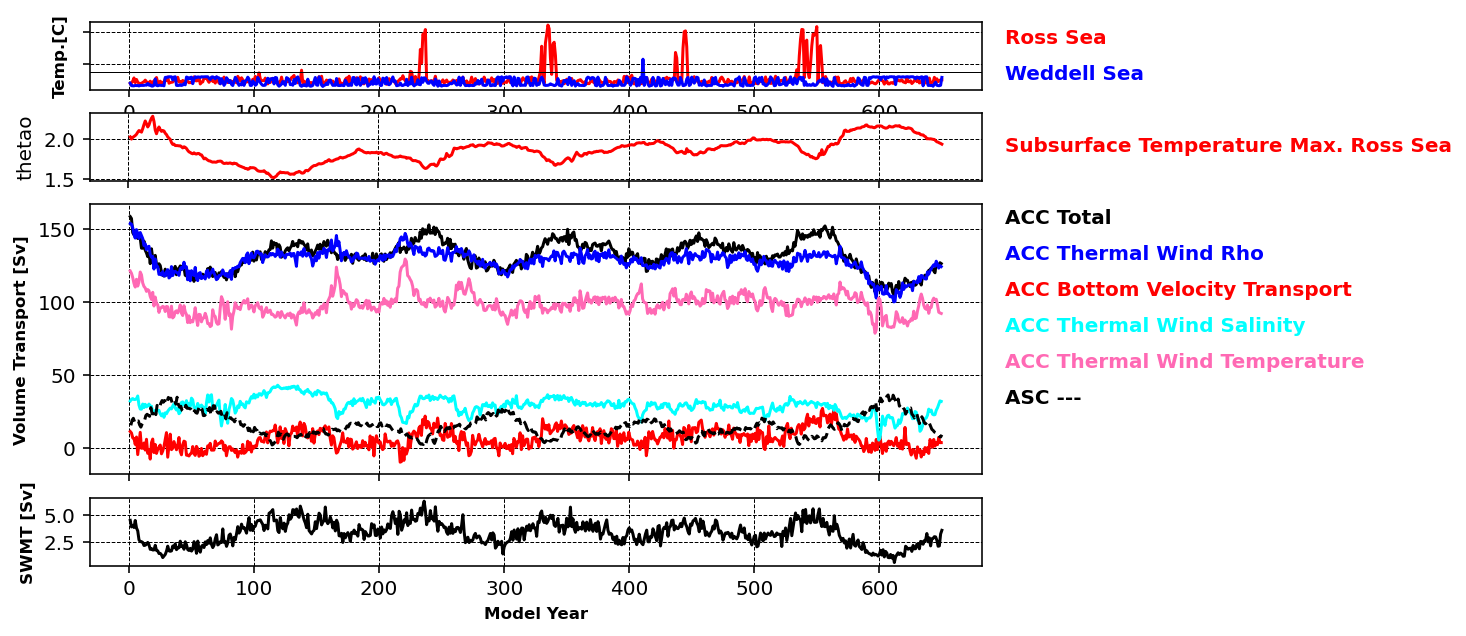

In [47]:
temp_component = TWT_cmip6_temp_annual_mean*-1*1035
salt_component = TWT_cmip6_salinity_annual_mean*1035

f, (a0, a1, a2, a3) = plt.subplots(4, 1, gridspec_kw={'height_ratios': [1,1,4,1]},figsize=(8,5))

mld_ross_max_annual.plot(ax=a0,color='red')
mld_weddell_max_annual.plot(ax=a0,color='blue')

t_max_ross.plot(ax=a1,color='red')

total_umo_cmip6_annual_mean.plot(ax=a2,color='black')
TWT_cmip6_annual_mean.plot(ax=a2,color='blue')
BottomVelTransport_cmip6_annual_mean.plot(ax=a2,color='red')
salt_component.plot(ax=a2,color='cyan')
temp_component.plot(ax=a2,color='hotpink')
asc_20e_cmip6.plot(ax=a2,color='k',linestyle='--')

cm4_south_of_60S_swmt_annual_max.isel(sigma2=slice(88,None)).mean(dim='sigma2').onshlf_total.plot(ax=a3,color='k')

a0.grid(linestyle='--',linewidth=0.5, color='black')
a1.grid(linestyle='--',linewidth=0.5, color='black')
a2.grid(linestyle='--',linewidth=0.5, color='black')
a3.grid(linestyle='--',linewidth=0.5, color='black')

a0.set_ylabel('MLD [m]',fontweight='bold',fontsize='small')
a0.set_ylabel('Temp.[C]',fontweight='bold',fontsize='small')
a2.set_ylabel('Volume Transport [Sv]',fontweight='bold',fontsize='small')
a3.set_ylabel('SWMT [Sv]',fontweight='bold',fontsize='small')

a0.set_xlabel('')
a1.set_xlabel('')
a2.set_xlabel('')
a3.set_xlabel('Model Year',fontweight='bold',fontsize='small')

a0.axhline(y=1500,linewidth=0.5,color='k')

a1.set_title('')
a2.set_title('')

f.text(0.92,0.85,'Ross Sea',fontsize=10,color='red',fontweight='bold')
f.text(0.92,0.80,'Weddell Sea',fontsize=10,color='blue',fontweight='bold')

f.text(0.92,0.70,'Subsurface Temperature Max. Ross Sea',fontsize=10,color='red',fontweight='bold')

f.text(0.92,0.60,'ACC Total',fontsize=10,color='black',fontweight='bold')
f.text(0.92,0.55,'ACC Thermal Wind Rho',fontsize=10,color='blue',fontweight='bold')
f.text(0.92,0.50,'ACC Bottom Velocity Transport',fontsize=10,color='red',fontweight='bold')
f.text(0.92,0.45,'ACC Thermal Wind Salinity',fontsize=10,color='cyan',fontweight='bold')
f.text(0.92,0.40,'ACC Thermal Wind Temperature',fontsize=10,color='hotpink',fontweight='bold')

f.text(0.92,0.35,'ASC ---',fontsize=10,color='black',fontweight='bold')

a0.yaxis.set_ticklabels([])
a1.xaxis.set_ticklabels([])
a2.xaxis.set_ticklabels([])

In [206]:
cm4_south_of_60S_swmt_annual_max

<xarray.Dataset>
Dimensions:       (sigma2: 124, year: 650)
Coordinates:
  * sigma2        (sigma2) float64 35.41 35.43 35.45 35.47 ... 37.83 37.85 37.87
  * year          (year) int64 1 2 3 4 5 6 7 8 ... 644 645 646 647 648 649 650
Data variables:
    onshlf_heat   (year, sigma2) float64 0.0276 0.04563 ... 8.752e-05 0.0002611
    onshlf_salt   (year, sigma2) float64 0.01993 0.0 0.0 ... 0.09011 0.06283
    onshlf_total  (year, sigma2) float64 0.0223 0.0 0.0 ... 0.09015 0.06298
    offshr_heat   (year, sigma2) float64 0.0 0.002258 0.0007569 ... 0.0 0.0 0.0
    offshr_salt   (year, sigma2) float64 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
    offshr_total  (year, sigma2) float64 0.0 0.002138 0.0 0.0 ... 0.0 0.0 0.0

In [207]:
cm4_south_of_60S_swmt_annual_max.isel(sigma2=slice(88,None)).mean(dim='sigma2').onshlf_total.sel(year=slice('200','300'))

<xarray.DataArray 'onshlf_total' (year: 101)>
array([3.42461203, 2.83635174, 3.85956177, 3.22335923, 3.59182543,
       3.40863164, 3.61638036, 4.14378164, 3.79765476, 3.72414402,
       4.9231577 , 5.27515397, 4.79410977, 4.17323027, 4.59502083,
       3.17289585, 5.31393099, 4.99134314, 3.557672  , 3.90845451,
       4.51694267, 4.30485692, 5.17266792, 3.9892235 , 4.33966308,
       4.18712561, 5.42291657, 4.56729793, 4.59018082, 4.38564472,
       4.44319096, 5.11043252, 4.99442584, 5.60593137, 4.95071819,
       5.71450741, 6.24885007, 5.40152965, 4.0730127 , 4.62462415,
       4.42091423, 5.37498036, 4.62094047, 4.76983969, 4.40216775,
       5.72614083, 4.33124778, 3.46172708, 4.37618596, 4.0983503 ,
       4.17726648, 4.03818024, 3.79630537, 3.84830233, 3.36892619,
       3.18031282, 3.84886183, 3.28214493, 4.16972455, 3.26656677,
       3.61396975, 3.42571998, 3.80077978, 3.8239183 , 3.68295068,
       3.35067643, 4.02188019, 4.99394123, 3.40647111, 2.40670431,
       2.78402452, 2.91375981, 2.4184046 , 2.63278482, 2.52919647,
       2.67294299, 3.0834285 , 3.26904112, 2.83594123, 2.96415844,
       3.0311009 , 2.80708755, 2.38252231, 2.44429795, 2.37067266,
       2.2314076 , 2.48656848, 2.61654245, 2.94833399, 3.25838471,
       2.65938391, 3.31872055, 3.11441821, 1.90277897, 2.07334356,
       2.54097972, 2.24412955, 2.2707398 , 2.53460593, 1.36223269,
       2.00423549])
Coordinates:
  * year     (year) int64 200 201 202 203 204 205 ... 295 296 297 298 299 300

Text(0.5, 1.0, '')

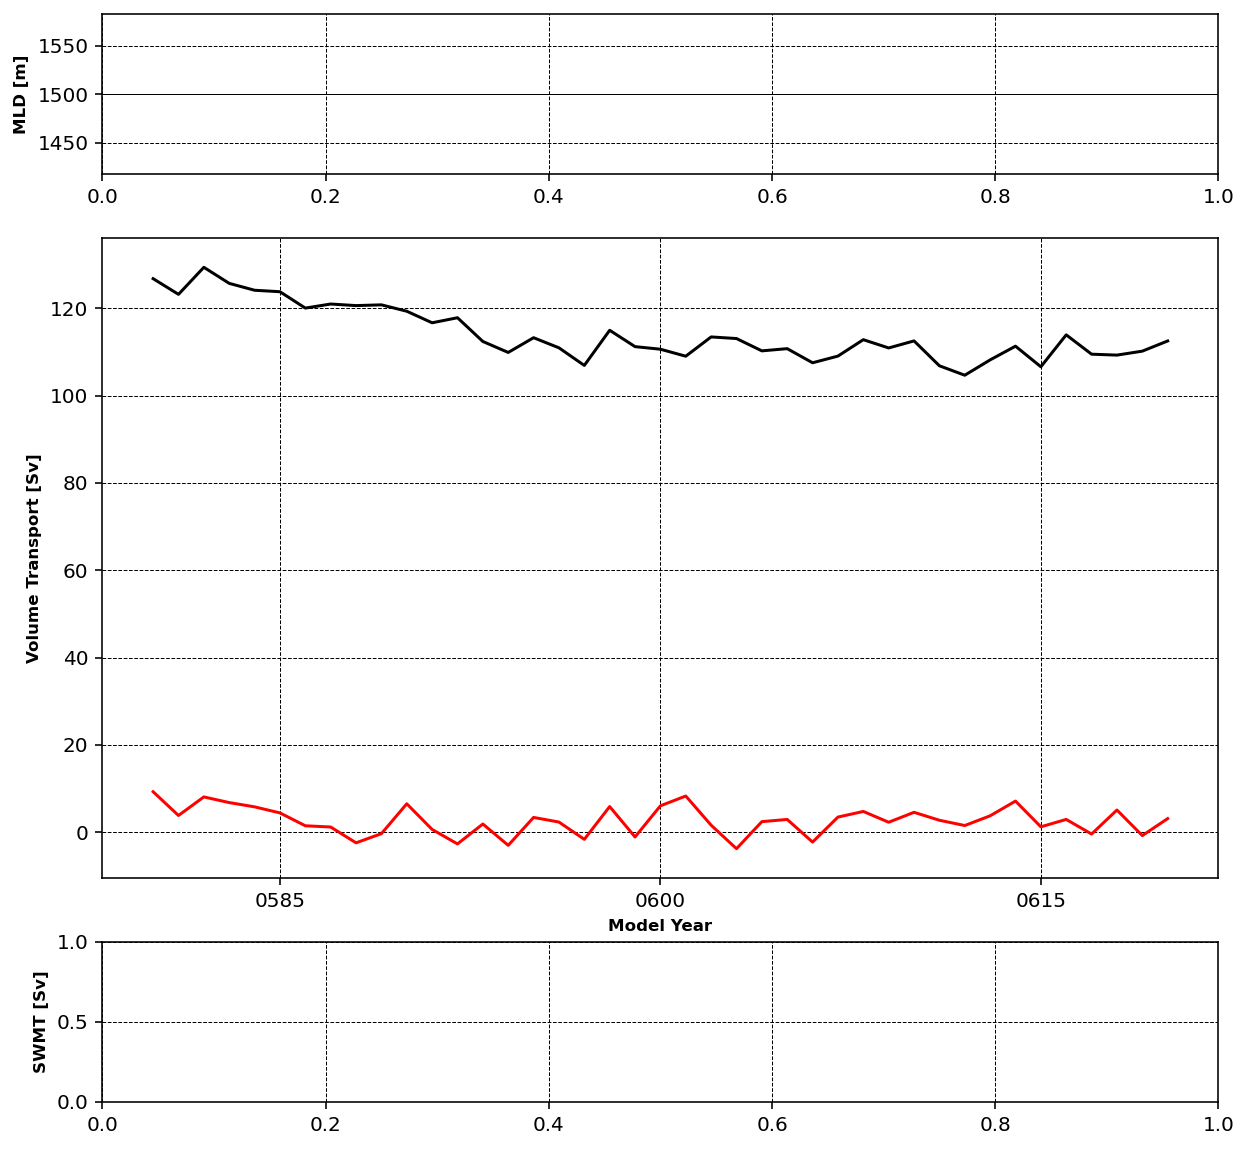

In [36]:
temp_component = TWT_cmip6_temp_annual_mean*-1*1035
salt_component = TWT_cmip6_salinity_annual_mean*1035

f, (a0, a1,a2) = plt.subplots(3, 1, gridspec_kw={'height_ratios': [1,4,1]},figsize=(10,10))

#mld_ross_max_annual.sel(year=slice('200','300')).plot(ax=a0,color='red')
#mld_weddell_max_annual.sel(year=slice('200','300')).plot(ax=a0,color='blue')

total_umo_cmip6_annual_mean.sel(time=slice('0580-01-01','0620-01-01')).plot(ax=a1,color='black')
#TWT_cmip6_annual_mean.sel(time=slice('0200-01-01','0300-01-01')).plot(ax=a1,color='blue')
BottomVelTransport_cmip6_annual_mean.sel(time=slice('0580-01-01','0620-01-01')).plot(ax=a1,color='red')
#salt_component.sel(time=slice('0200-01-01','0300-01-01')).plot(ax=a1,color='cyan')
#temp_component.sel(time=slice('0200-01-01','0300-01-01')).plot(ax=a1,color='hotpink')
#asc_20e_cmip6.sel(time=slice('0200-01-01','0300-01-01')).plot(ax=a1,color='k',linestyle='--')

#cm4_south_of_60S_swmt_annual_max.isel(sigma2=slice(88,None)).mean(dim='sigma2').sel(year=slice('200','300')).onshlf_total.plot(ax=a2,color='k')

a0.grid(linestyle='--',linewidth=0.5, color='black')
a1.grid(linestyle='--',linewidth=0.5, color='black')
a2.grid(linestyle='--',linewidth=0.5, color='black')

a0.set_ylabel('MLD [m]',fontweight='bold',fontsize='small')
a1.set_ylabel('Volume Transport [Sv]',fontweight='bold',fontsize='small')
a2.set_ylabel('SWMT [Sv]',fontweight='bold',fontsize='small')
a1.set_xlabel('Model Year',fontweight='bold',fontsize='small')
a0.set_xlabel('')

a0.axhline(y=1500,linewidth=0.5,color='k')

a1.set_title('')

In [31]:
total_umo_cmip6_annual_mean.sel(time=slice('0499-01-01','0518-01-01'))

<xarray.DataArray (time: 20, xq: 1)>
dask.array<getitem, shape=(20, 1), dtype=float64, chunksize=(1, 1), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) object 0499-01-01 00:00:00 ... 0518-01-01 00:00:00
  * xq       (xq) float64 -70.01

In [ ]:
temp_component = TWT_cmip6_temp_annual_mean*-1*1035
salt_component = TWT_cmip6_salinity_annual_mean*1035

f, (a0, a1,a2) = plt.subplots(3, 1, gridspec_kw={'height_ratios': [1,4,1]},figsize=(8,5))

mld_ross_max_annual.sel(time=slice('200','275')).plot(ax=a0,color='red')
mld_weddell_max_annual.sel(time=slice('200','275')).plot(ax=a0,color='blue')

total_umo_cmip6_annual_mean.plot(ax=a1,color='black')
TWT_cmip6_annual_mean.plot(ax=a1,color='blue')
BottomVelTransport_cmip6_annual_mean.plot(ax=a1,color='red')
salt_component.plot(ax=a1,color='cyan')
temp_component.plot(ax=a1,color='hotpink')
asc_20e_cmip6.plot(ax=a1,color='k',linestyle='--')

cm4_south_of_60S_swmt_annual_max.isel(sigma2=slice(88,None)).mean(dim='sigma2').onshlf_total.plot(ax=a2,color='k')

a0.grid(linestyle='--',linewidth=0.5, color='black')
a1.grid(linestyle='--',linewidth=0.5, color='black')
a2.grid(linestyle='--',linewidth=0.5, color='black')

a0.set_ylabel('MLD [m]',fontweight='bold',fontsize='small')
a1.set_ylabel('Volume Transport [Sv]',fontweight='bold',fontsize='small')
a2.set_ylabel('SWMT [Sv]',fontweight='bold',fontsize='small')
a1.set_xlabel('Model Year',fontweight='bold',fontsize='small')
a0.set_xlabel('')

a0.axhline(y=1500,linewidth=0.5,color='k')

a1.set_title('')

f.text(0.92,0.85,'Ross Sea',fontsize=10,color='red',fontweight='bold')
f.text(0.92,0.80,'Weddell Sea',fontsize=10,color='blue',fontweight='bold')

f.text(0.92,0.70,'ACC Total',fontsize=10,color='black',fontweight='bold')
f.text(0.92,0.65,'ACC Thermal Wind Rho',fontsize=10,color='blue',fontweight='bold')
f.text(0.92,0.60,'ACC Bottom Velocity Transport',fontsize=10,color='red',fontweight='bold')
f.text(0.92,0.55,'ACC Thermal Wind Salinity',fontsize=10,color='cyan',fontweight='bold')
f.text(0.92,0.50,'ACC Thermal Wind Temperature',fontsize=10,color='hotpink',fontweight='bold')

f.text(0.92,0.45,'ASC ---',fontsize=10,color='black',fontweight='bold')

### Define Ross polynya periods - 10 years before, duration of polynya, 10 years post.

#### Polynya 1: years 225 to 238
#### Pre-Polynya 1: years 215 to 224
#### Post-Polynya 1: years 239 to 248

#### Polynya 2: years 329 to 342
#### Pre-Polynya 2: years 319 to 328
#### Post-Polynya 2: years 343 to 352

#### Polynya 3: years 437 to 446
#### Pre-Polynya 3: years 427 to 436
#### Post-Polynya 3: years 447 to 456

#### Polynya 4: years 534 to 554
#### Pre-Polynya 4: years 524 to 533
#### Post-Polynya 4: years 555 to 564

### Plot full time-averaged velocity field components

In [17]:
## Cannot have NaNs to use as coordinate in pcolormesh:
def forward_fill(arr):
    """ Forward fill a 2-D array along the column dimension"""
    # make a copy of the input array
    out = arr * 1.0
    # loop over column index
    for col_idx in range(0,arr.shape[1]):
        # get the column to work on
        _row = arr[:,col_idx]
        # get index numbers of nan values
        _nan_vals = np.argwhere(np.isnan(_row))
        # find the last "good" value
        _depth = 0. if _nan_vals[0] == 0 else _row[_nan_vals[0]-1]
        # set nan values to the last good value
        _row = np.where(np.isnan(_row),_depth,_row)
        # re-assign the filled column
        out[:,col_idx] = _row
    return out

In [18]:
thk = ml.derived.calc_dz(cmip6_cm4.z_l,cmip6_cm4.z_i,static_sliced_om4p25.deptho)
thk = thk.where(thk>0).sel(xh=cmip6_cm4.xh.values,method='nearest')
thk_interp = grid_sliced_p25.interp(thk,'Y',boundary='fill').squeeze()

thk_drake = thk_interp
lat_drake = thk_interp.yq

#### Get depth to the center of the partial cell in Drake:
kmax = thk_drake.shape[0]                                           ## Maximum k value, == 35
zl_Drake  = 0.0 * thk_drake[:]                              ## Take all the values for thickness at Drake and multiply by zero. 
zl_Drake[0] = 0.5 * thk_drake[0]                            ## Multiple first element by 0.5.

k_Drake = 1
while k_Drake < kmax:
    zl_Drake[k_Drake] = zl_Drake[k_Drake-1] + 0.5 * (thk_drake[k_Drake]+thk_drake[k_Drake-1])
    k_Drake=k_Drake+1
    
zl_Drake_nm = np.array(zl_Drake)

zl_Drake_cm4 = forward_fill(zl_Drake_nm)
lat_Drake_cm4 = np.broadcast_to(lat_drake,zl_Drake.shape)

In [19]:
thk = ml.derived.calc_dz(cmip6_cm4.z_l,cmip6_cm4.z_i,static_sliced_om4p25.deptho)
thk = thk.where(thk>0).sel(xh=cmip6_cm4.xh.values,method='nearest')
thk_interp = grid_sliced_p25.interp(thk,'Y',boundary='fill')
dy = static_sliced_om4p25.dyCv.sel(xh=cmip6_cm4.xh.values,method='nearest')

TWT_cmip6_rho_field = annual_mean(TWT_cmip6[0])
TWT_cmip6_salinity_field = TWT_cmip6_salinity[0]*1035
TWT_cmip6_temp_field = TWT_cmip6_temp[0]*1035*-1
BVT_cmip6 = BottomVelTransport_cmip6[0]

TWT_cmip6_rho_field_volume_trans = (TWT_cmip6_rho_field*thk_interp*dy)/10**6
TWT_cmip6_rho_field_volume_trans_Sv_vert_sum = TWT_cmip6_rho_field_volume_trans.sum(dim=(['z_l']))
TWT_cmip6_temp_field_volume_trans = (TWT_cmip6_temp_field*thk_interp*dy)/10**6
TWT_cmip6_temp_field_volume_trans_Sv_vert_sum = TWT_cmip6_temp_field_volume_trans.sum(dim=(['z_l']))*-1
TWT_cmip6_salinity_field_volume_trans = (TWT_cmip6_salinity_field*thk_interp*dy)/10**6
TWT_cmip6_salinity_field_volume_trans_Sv_vert_sum = TWT_cmip6_salinity_field_volume_trans.sum(dim=(['z_l']))

### Velocity Cross-Sections time-averaged over entire piControl Period

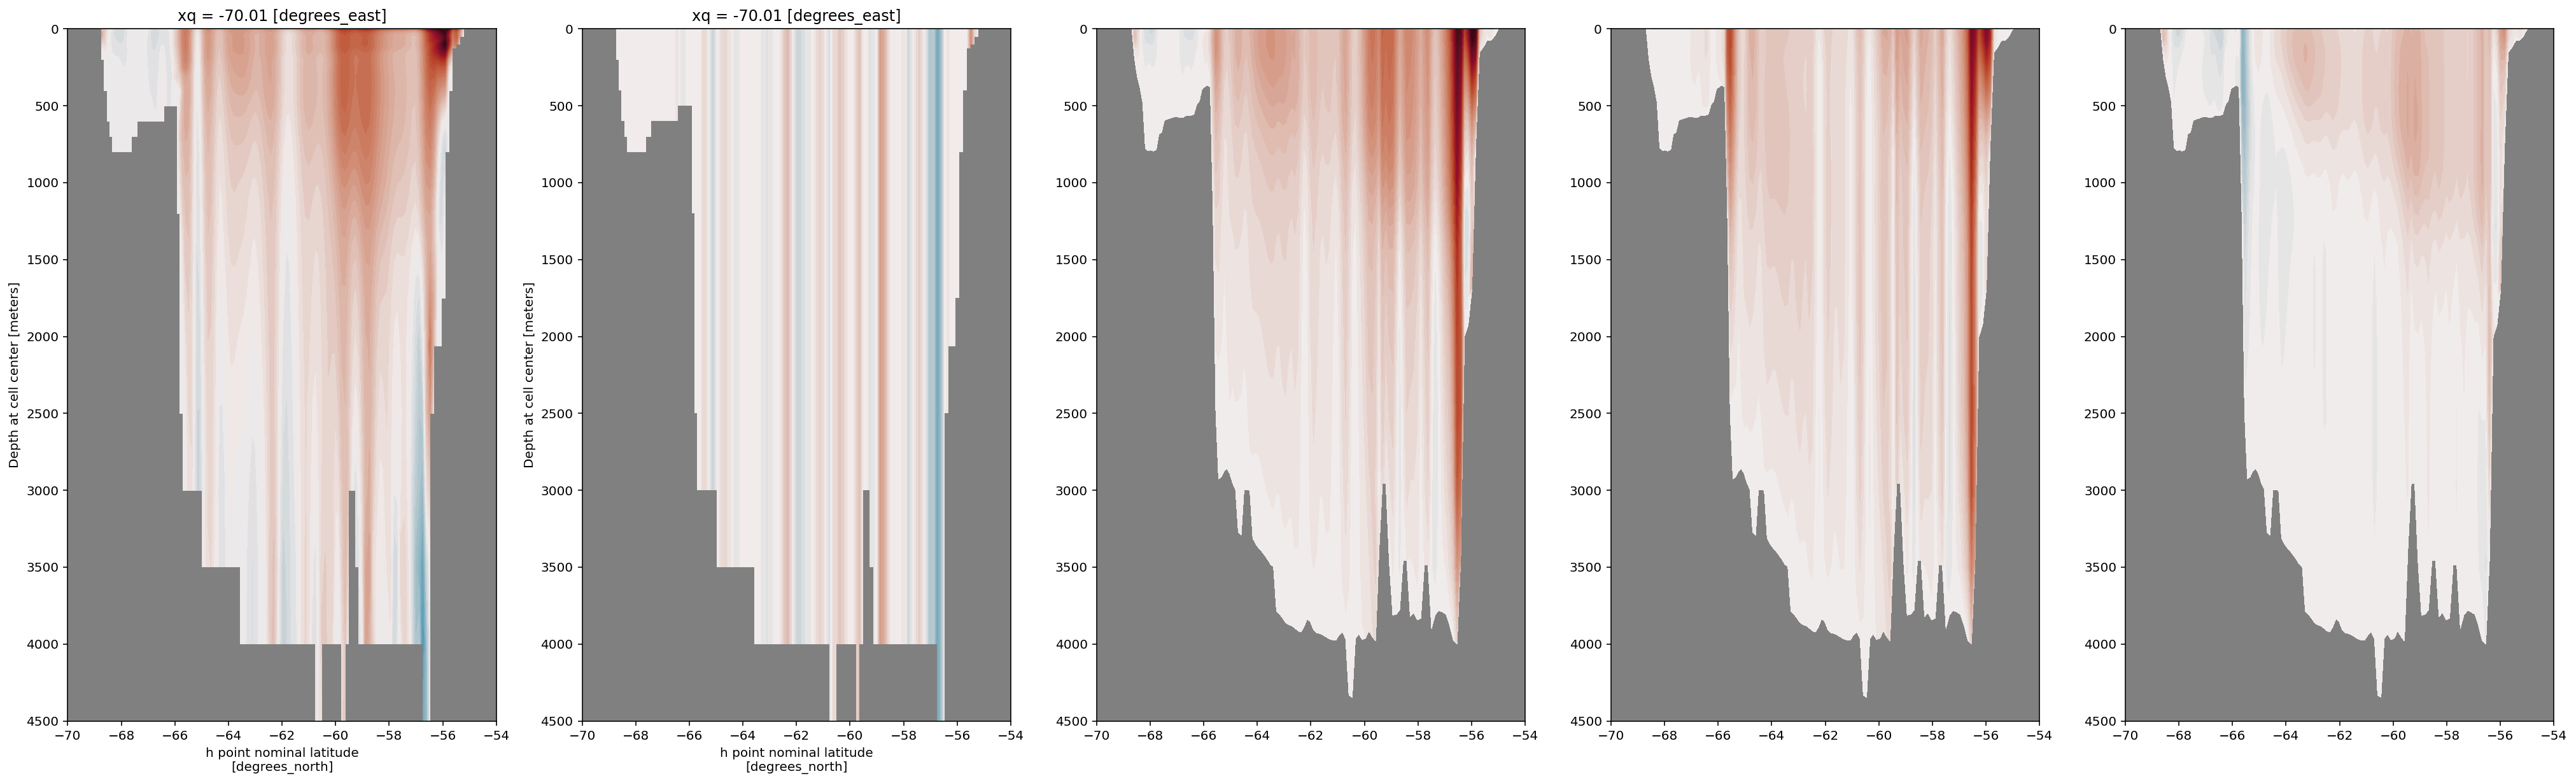

In [41]:
from matplotlib import gridspec
from matplotlib import colorbar

fig, ax = plt.subplots(1,5,figsize=(35,10))
gs = gridspec.GridSpec(1,5)
ax1, ax2, ax3, ax4, ax5 = plt.subplot(gs[0,0],facecolor='grey'),\
                          plt.subplot(gs[0,1],facecolor='grey'),\
                          plt.subplot(gs[0,2],facecolor='grey'),\
                          plt.subplot(gs[0,3],facecolor='grey'),\
                          plt.subplot(gs[0,4],facecolor='grey')

custom_ylim = (4500,0)
custom_xlim = (-70,-54)

plt.setp(ax1, ylim=custom_ylim, xlim=custom_xlim)
plt.setp(ax2, ylim=custom_ylim, xlim=custom_xlim)
plt.setp(ax3, ylim=custom_ylim, xlim=custom_xlim)
plt.setp(ax4, ylim=custom_ylim, xlim=custom_xlim)
plt.setp(ax5, ylim=custom_ylim, xlim=custom_xlim)

levels_vel = np.linspace(-0.3,0.3,60)
levels_vel_contour = np.linspace(-0.3,0.3,30)

cmip6_cm4.mean(dim='time').uo.squeeze().plot.contourf(ax=ax1,yincrease=False,
                                                 vmin=-0.3,
                                                 vmax=0.3,
                                                 levels=60,
                                                 cmap=cmocean.cm.balance,
                                                 ylim=(4500,0),
                                                 corner_mask=False,
                                                 add_colorbar=False) 

BottomVelTransport_cmip6[0].mean(dim='time').squeeze().plot.contourf(ax=ax2,yincrease=False,
                                                 vmin=-0.3,
                                                 vmax=0.3,
                                                 levels=60,
                                                 cmap=cmocean.cm.balance,
                                                 ylim=(4500,0),
                                                 corner_mask=False,
                                                 add_colorbar=False)                                                                               
ax3.contourf(lat_Drake_cm4,
             zl_Drake_cm4,
             TWT_cmip6_rho_field.reindex(z_l=TWT_cmip6_rho_field.z_l[::-1]).mean(dim='time'),
             levels=levels_vel,
             cmap=cmocean.cm.balance,
             extend='both',
             corner_mask=False)

ax4.contourf(lat_Drake_cm4,
             zl_Drake_cm4,
             TWT_cmip6_temp_field.reindex(z_l=TWT_cmip6_temp_field.z_l[::-1]).mean(dim='time'),
             levels=levels_vel,
             cmap=cmocean.cm.balance,
             extend='both',
             corner_mask=False)

ax5.contourf(lat_Drake_cm4,
             zl_Drake_cm4,
             TWT_cmip6_salinity_field.reindex(z_l=TWT_cmip6_salinity_field.z_l[::-1]).mean(dim='time'),
             levels=levels_vel,
             cmap=cmocean.cm.balance,
             extend='both',
             corner_mask=False)

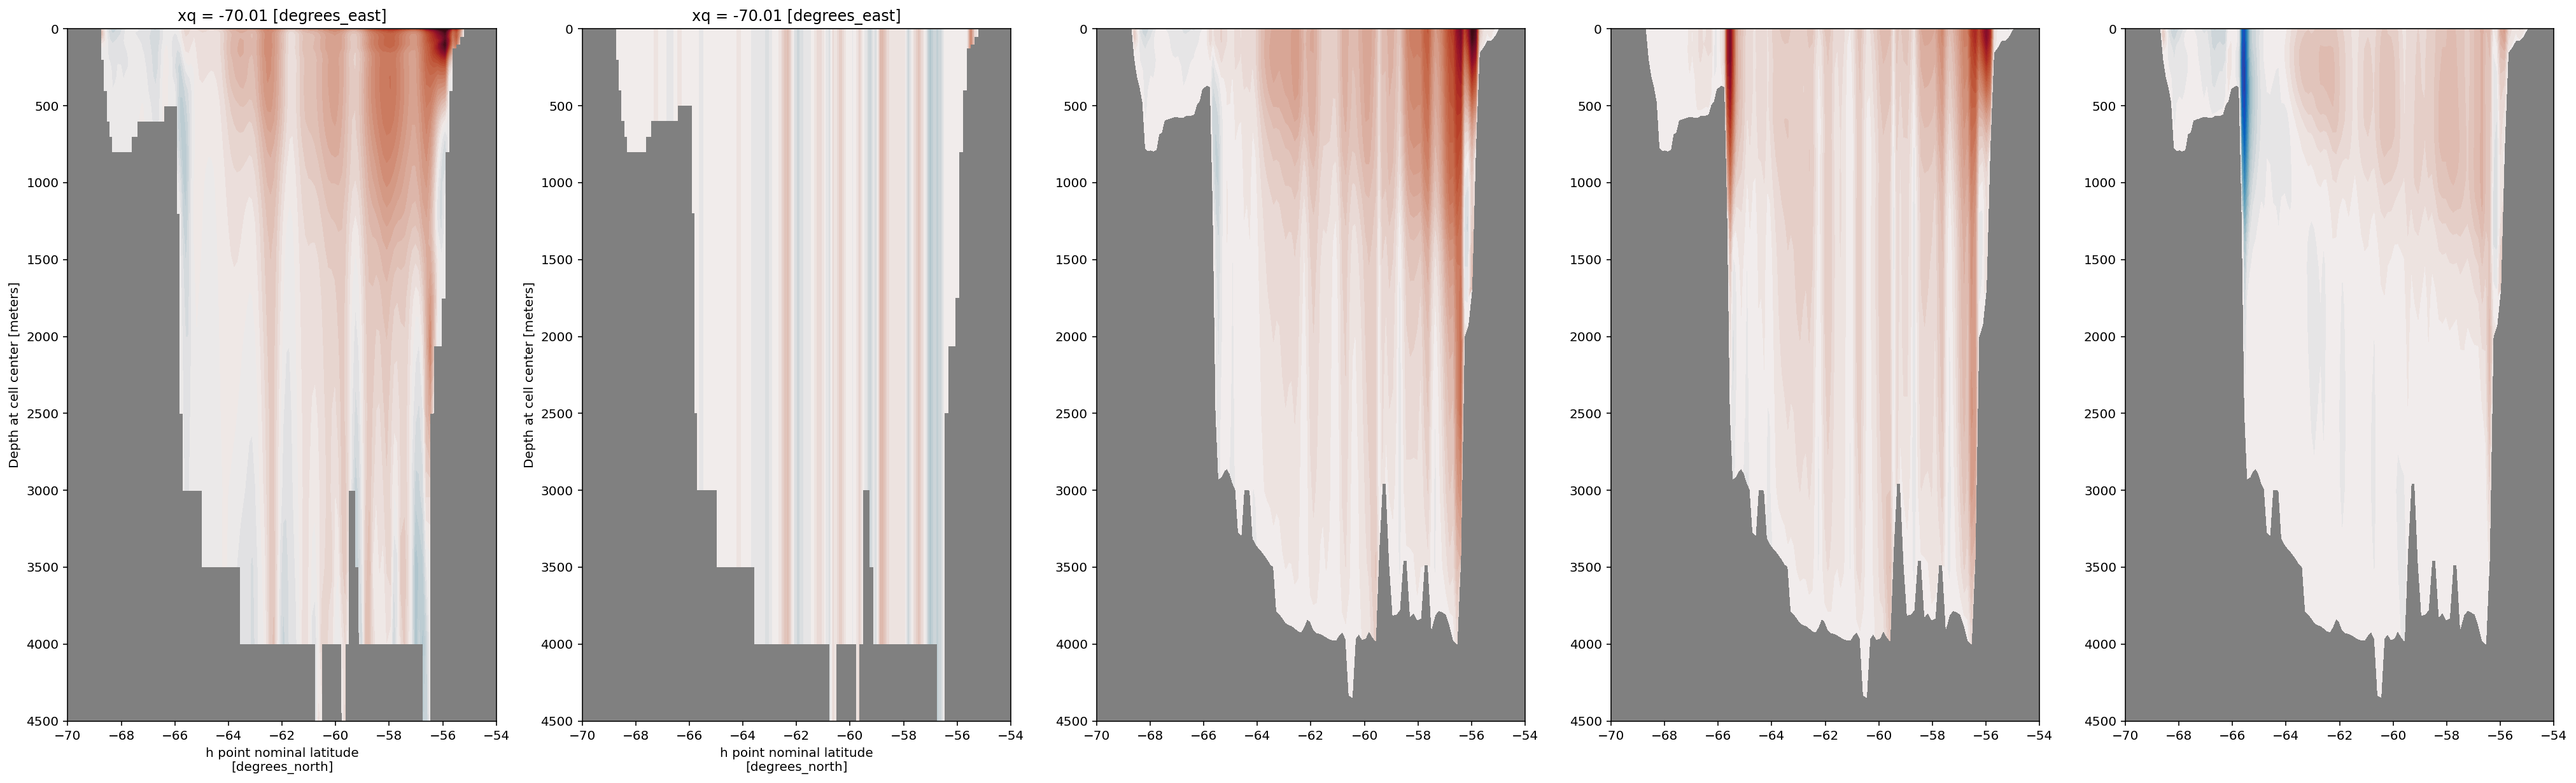

In [37]:
from matplotlib import gridspec
from matplotlib import colorbar

fig, ax = plt.subplots(1,5,figsize=(35,10))
gs = gridspec.GridSpec(1,5)
ax1, ax2, ax3, ax4, ax5 = plt.subplot(gs[0,0],facecolor='grey'),\
                          plt.subplot(gs[0,1],facecolor='grey'),\
                          plt.subplot(gs[0,2],facecolor='grey'),\
                          plt.subplot(gs[0,3],facecolor='grey'),\
                          plt.subplot(gs[0,4],facecolor='grey')

custom_ylim = (4500,0)
custom_xlim = (-70,-54)

plt.setp(ax1, ylim=custom_ylim, xlim=custom_xlim)
plt.setp(ax2, ylim=custom_ylim, xlim=custom_xlim)
plt.setp(ax3, ylim=custom_ylim, xlim=custom_xlim)
plt.setp(ax4, ylim=custom_ylim, xlim=custom_xlim)
plt.setp(ax5, ylim=custom_ylim, xlim=custom_xlim)

levels_vel = np.linspace(-0.3,0.3,60)
levels_vel_contour = np.linspace(-0.3,0.3,30)

cmip6_cm4.sel(time=slice('0605-01-16','0624-12-16')).mean(dim='time').uo.squeeze().plot.contourf(ax=ax1,yincrease=False,
                                                 vmin=-0.3,
                                                 vmax=0.3,
                                                 levels=60,
                                                 cmap=cmocean.cm.balance,
                                                 ylim=(4500,0),
                                                 corner_mask=False,
                                                 add_colorbar=False) 

BottomVelTransport_cmip6[0].sel(time=slice('0605-01-16','0624-12-16')).mean(dim='time').squeeze().plot.contourf(ax=ax2,yincrease=False,
                                                 vmin=-0.3,
                                                 vmax=0.3,
                                                 levels=60,
                                                 cmap=cmocean.cm.balance,
                                                 ylim=(4500,0),
                                                 corner_mask=False,
                                                 add_colorbar=False)                                                                               
ax3.contourf(lat_Drake_cm4,
             zl_Drake_cm4,
             TWT_cmip6_rho_field.reindex(z_l=TWT_cmip6_rho_field.z_l[::-1]).sel(time=slice('0605-01-16','0624-12-16')).mean(dim='time'),
             levels=levels_vel,
             cmap=cmocean.cm.balance,
             extend='both',
             corner_mask=False)

ax4.contourf(lat_Drake_cm4,
             zl_Drake_cm4,
             TWT_cmip6_temp_field.reindex(z_l=TWT_cmip6_temp_field.z_l[::-1]).sel(time=slice('0605-01-16','0624-12-16')).mean(dim='time'),
             levels=levels_vel,
             cmap=cmocean.cm.balance,
             extend='both',
             corner_mask=False)

ax5.contourf(lat_Drake_cm4,
             zl_Drake_cm4,
             TWT_cmip6_salinity_field.reindex(z_l=TWT_cmip6_salinity_field.z_l[::-1]).sel(time=slice('0605-01-16','0624-12-16')).mean(dim='time'),
             levels=levels_vel,
             cmap=cmocean.cm.balance,
             extend='both',
             corner_mask=False)

<xarray.Dataset>
Dimensions:     (nv: 2, time: 240, z_l: 35, yh: 138, xh: 1, z_i: 36, xq: 1)
Coordinates:
  * nv          (nv) float64 1.0 2.0
  * time        (time) object 0131-01-16 12:00:00 ... 0150-12-16 12:00:00
  * xh          (xh) float64 -69.91
  * yh          (yh) float64 -70.35 -70.25 -70.15 ... -54.78 -54.64 -54.49
  * z_i         (z_i) float64 0.0 5.0 15.0 25.0 ... 5.75e+03 6.25e+03 6.75e+03
  * z_l         (z_l) float64 2.5 10.0 20.0 32.5 ... 5e+03 5.5e+03 6e+03 6.5e+03
  * xq          (xq) float64 -70.01
Data variables:
    thetao      (time, z_l, yh, xh) float32 dask.array<chunksize=(60, 35, 138, 1), meta=np.ndarray>
    time_bnds   (time, nv) object dask.array<chunksize=(60, 2), meta=np.ndarray>
    average_T1  (time) object dask.array<chunksize=(60,), meta=np.ndarray>
    average_T2  (time) object dask.array<chunksize=(60,), meta=np.ndarray>
    average_DT  (time) timedelta64[ns] dask.array<chunksize=(60,), meta=np.ndarray>
    so          (time, z_l, yh, xh) float32 dask.array<chunksize=(60, 35, 138, 1), meta=np.ndarray>
    uo          (time, z_l, yh, xq) float32 dask.array<chunksize=(60, 35, 138, 1), meta=np.ndarray>
    umo         (time, z_l, yh, xq) float32 dask.array<chunksize=(60, 35, 138, 1), meta=np.ndarray>
Attributes:
    filename:            ocean_Drake_Passage.000101-000512.thetao.nc
    title:               CM4_piControl_C
    associated_files:    areacello: 00010101.ocean_static.nc
    grid_type:           regular
    grid_tile:           N/A
    external_variables:  volcello areacello
    comment:             FMS time averaging, version 3.0, precision=double

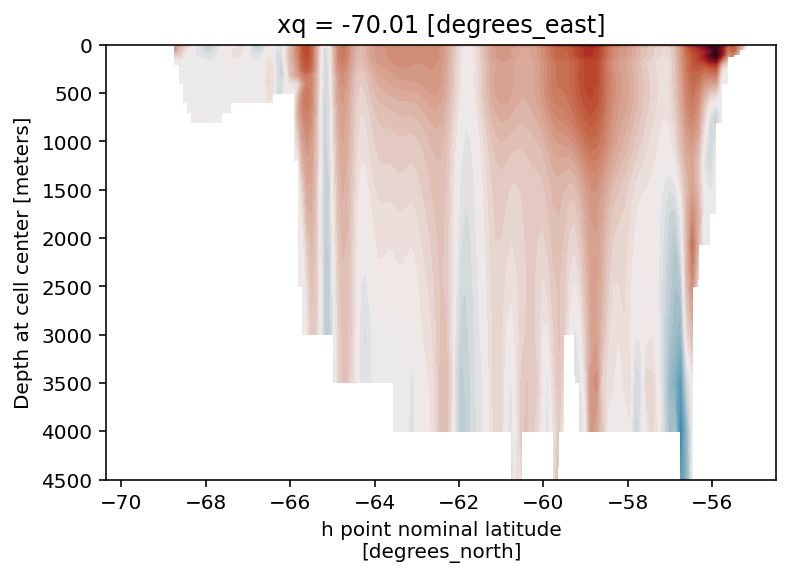

In [45]:
cmip6_cm4.sel(time=slice('0231-01-16','0250-12-16')).mean(dim='time').uo.squeeze().plot.contourf(yincrease=False,
                                                 vmin=-0.3,
                                                 vmax=0.3,
                                                 levels=60,
                                                 cmap=cmocean.cm.balance,
                                                 ylim=(4500,0),
                                                 corner_mask=False,
                                                 add_colorbar=False)

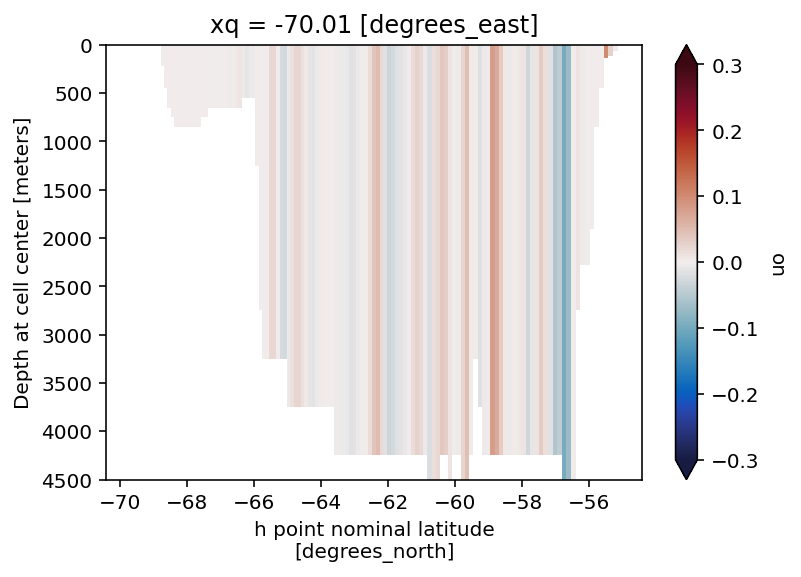

In [270]:
BottomVelTransport_cmip6[0].mean(dim='time').plot(yincrease=False,
                                                 vmin=-0.3,
                                                 vmax=0.3,
                                                 cmap=cmocean.cm.balance,
                                                 ylim=(4500,0),
                                                 extend='both')

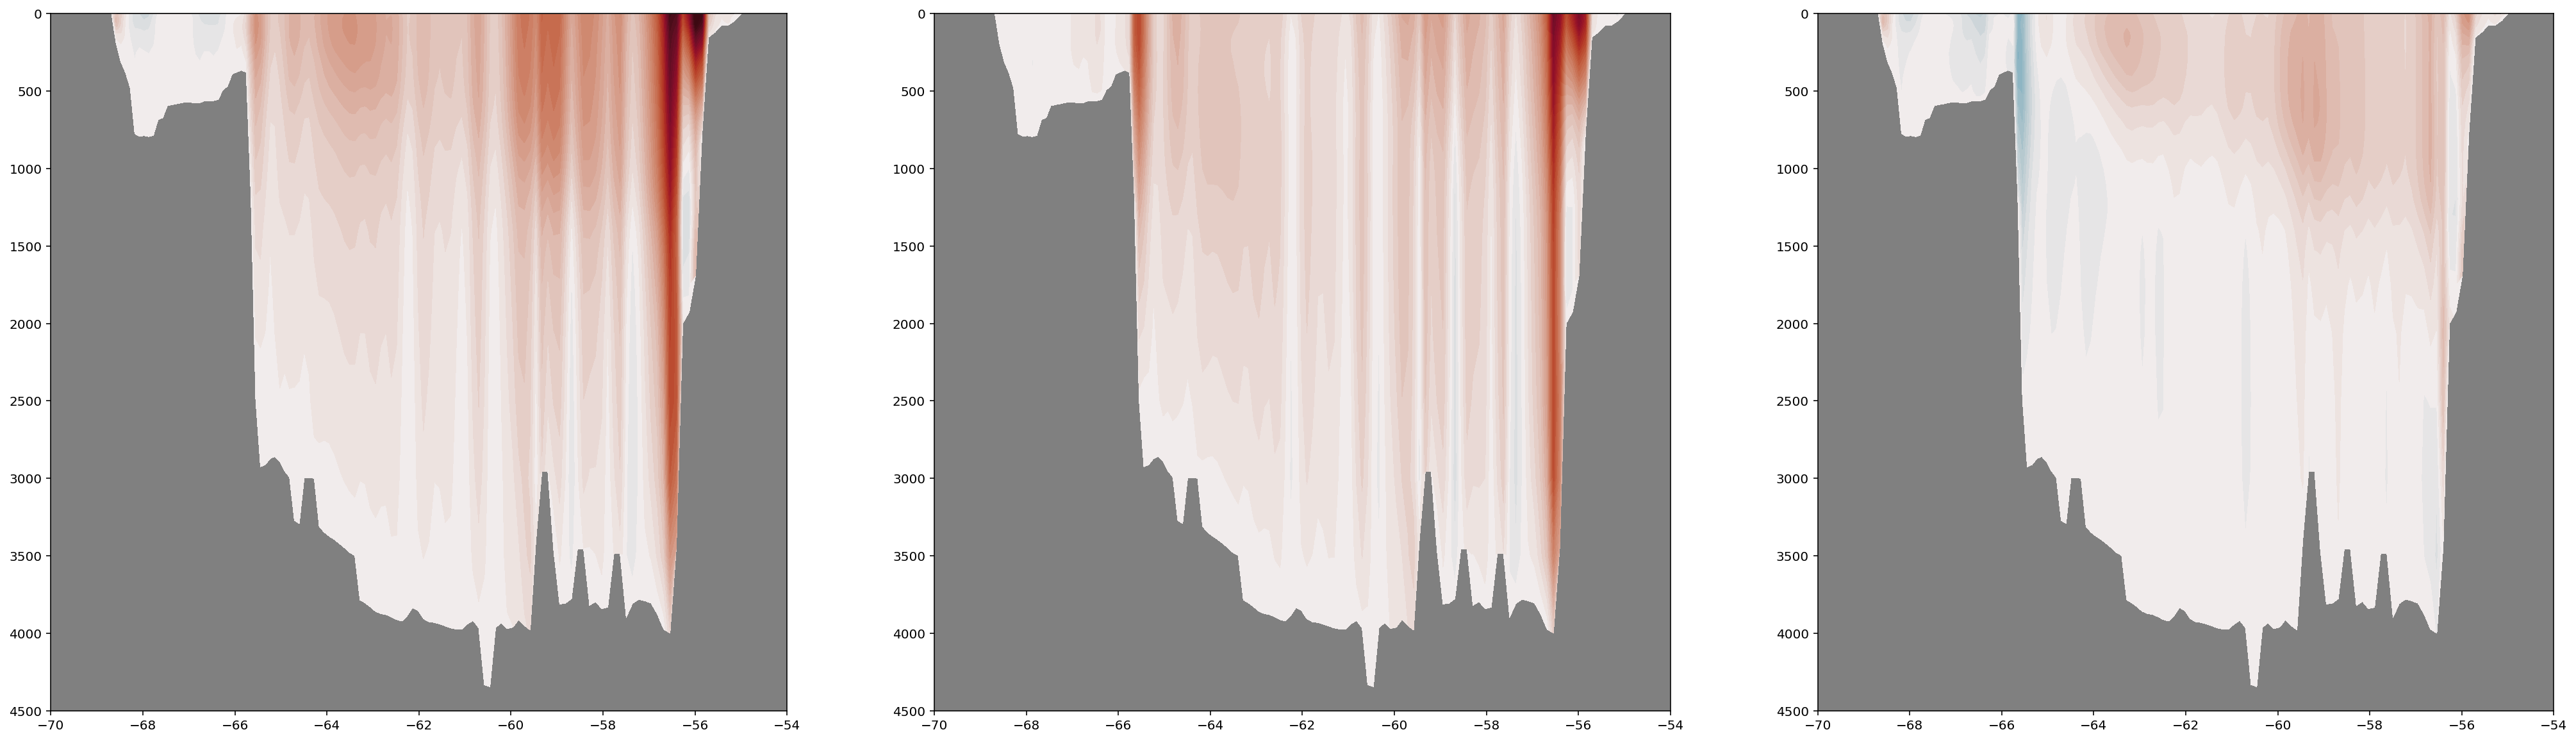

In [178]:
from matplotlib import gridspec
from matplotlib import colorbar

fig, ax = plt.subplots(1,3,figsize=(35,10))
gs = gridspec.GridSpec(1,3)
ax1, ax2, ax3 = plt.subplot(gs[0,0],facecolor='grey'),\
                plt.subplot(gs[0,1],facecolor='grey'),\
                plt.subplot(gs[0,2],facecolor='grey')

custom_ylim = (4500,0)
custom_xlim = (-70,-54)
plt.setp(ax1, ylim=custom_ylim, xlim=custom_xlim)
plt.setp(ax2, ylim=custom_ylim, xlim=custom_xlim)
plt.setp(ax3, ylim=custom_ylim, xlim=custom_xlim)

levels_vel = np.linspace(-0.3,0.3,60)
levels_vel_contour = np.linspace(-0.3,0.3,30)

ax1.contourf(lat_Drake_cm4,
             zl_Drake_cm4,
             TWT_cmip6_rho_field.reindex(z_l=TWT_cmip6_rho_field.z_l[::-1]).mean(dim='time'),
             levels=levels_vel,
             cmap=cmocean.cm.balance,
             extend='both')

ax2.contourf(lat_Drake_cm4,
             zl_Drake_cm4,
             TWT_cmip6_temp_field.reindex(z_l=TWT_cmip6_temp_field.z_l[::-1]).mean(dim='time'),
             levels=levels_vel,
             cmap=cmocean.cm.balance,
             extend='both')

ax3.contourf(lat_Drake_cm4,
             zl_Drake_cm4,
             TWT_cmip6_salinity_field.reindex(z_l=TWT_cmip6_salinity_field.z_l[::-1]).mean(dim='time'),
             levels=levels_vel,
             cmap=cmocean.cm.balance,
             extend='both')

### Velocity Cross-Sections time-averaged for "pre", "post", and "polynya" periods

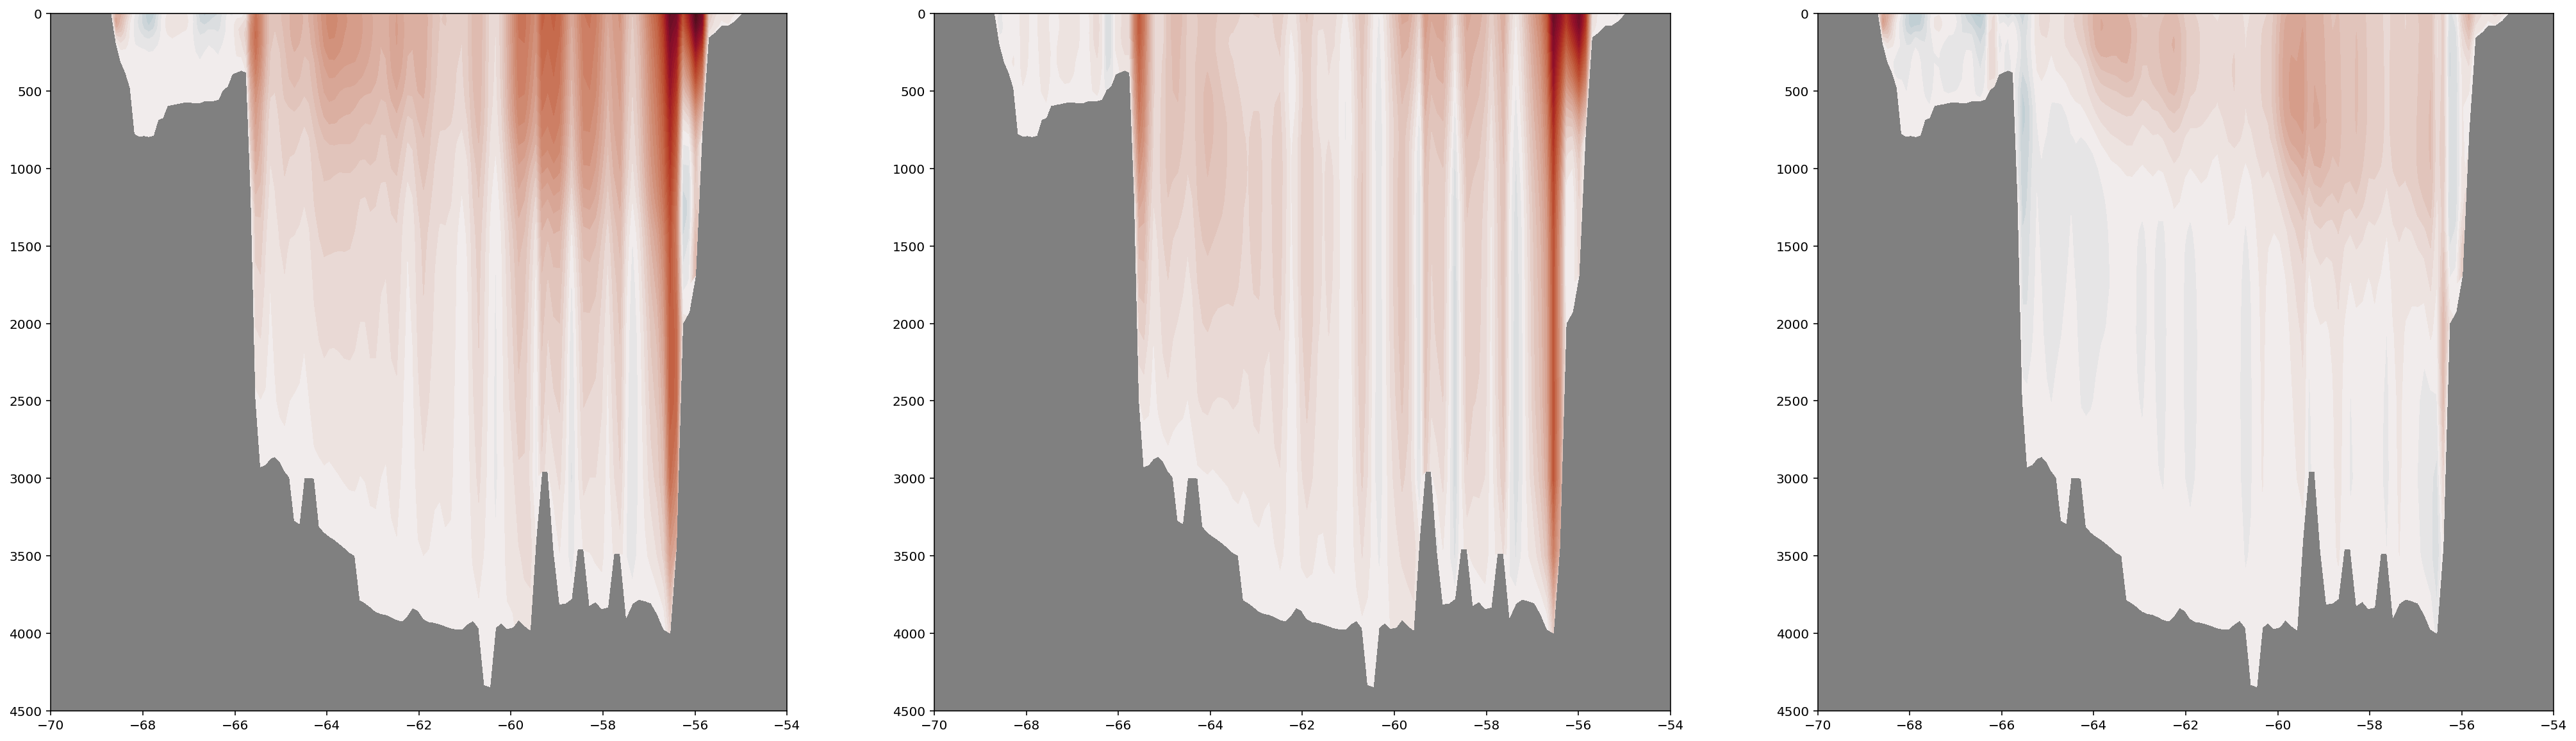

In [188]:
from matplotlib import gridspec
from matplotlib import colorbar

fig, ax = plt.subplots(1,3,figsize=(35,10))
gs = gridspec.GridSpec(1,3)
ax1, ax2, ax3 = plt.subplot(gs[0,0],facecolor='grey'),\
                plt.subplot(gs[0,1],facecolor='grey'),\
                plt.subplot(gs[0,2],facecolor='grey')

custom_ylim = (4500,0)
custom_xlim = (-70,-54)
plt.setp(ax1, ylim=custom_ylim, xlim=custom_xlim)
plt.setp(ax2, ylim=custom_ylim, xlim=custom_xlim)
plt.setp(ax3, ylim=custom_ylim, xlim=custom_xlim)

levels_vel = np.linspace(-0.3,0.3,60)
levels_vel_contour = np.linspace(-0.3,0.3,30)


ax1.contourf(lat_Drake_cm4,
             zl_Drake_cm4,
             TWT_cmip6_rho_field.reindex(z_l=TWT_cmip6_rho_field.z_l[::-1]).sel(time=slice('0524-01-16','0533-12-16')).mean(dim='time'),
             levels=levels_vel,
             cmap=cmocean.cm.balance,
             extend='both')

ax2.contourf(lat_Drake_cm4,
             zl_Drake_cm4,
             TWT_cmip6_temp_field.reindex(z_l=TWT_cmip6_temp_field.z_l[::-1]).sel(time=slice('0524-01-16','0533-12-16')).mean(dim='time'),
             levels=levels_vel,
             cmap=cmocean.cm.balance,
             extend='both')

ax3.contourf(lat_Drake_cm4,
             zl_Drake_cm4,
             TWT_cmip6_salinity_field.reindex(z_l=TWT_cmip6_salinity_field.z_l[::-1]).sel(time=slice('0524-01-16','0533-12-16')).mean(dim='time'),
             levels=levels_vel,
             cmap=cmocean.cm.balance,
             extend='both')

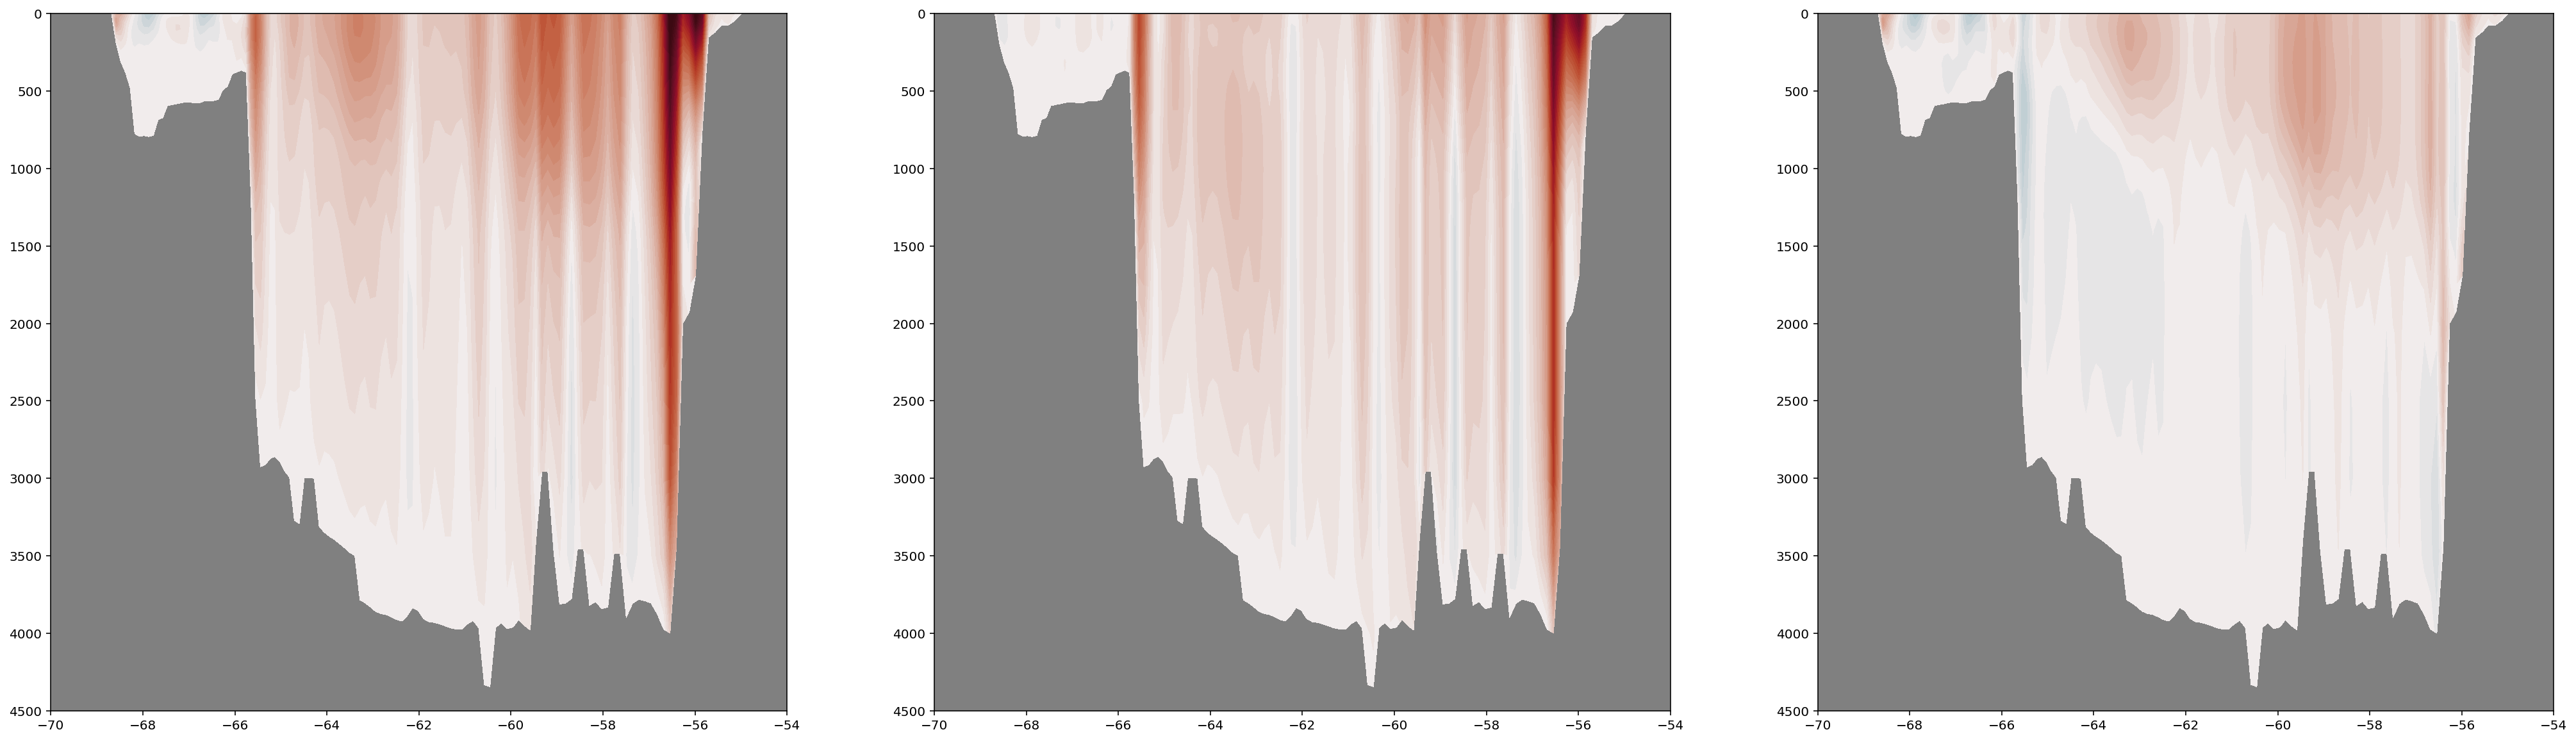

In [189]:
from matplotlib import gridspec
from matplotlib import colorbar

fig, ax = plt.subplots(1,3,figsize=(35,10))
gs = gridspec.GridSpec(1,3)
ax1, ax2, ax3 = plt.subplot(gs[0,0],facecolor='grey'),\
                plt.subplot(gs[0,1],facecolor='grey'),\
                plt.subplot(gs[0,2],facecolor='grey')

custom_ylim = (4500,0)
custom_xlim = (-70,-54)
plt.setp(ax1, ylim=custom_ylim, xlim=custom_xlim)
plt.setp(ax2, ylim=custom_ylim, xlim=custom_xlim)
plt.setp(ax3, ylim=custom_ylim, xlim=custom_xlim)

levels_vel = np.linspace(-0.3,0.3,60)
levels_vel_contour = np.linspace(-0.3,0.3,30)

ax1.contourf(lat_Drake_cm4,
             zl_Drake_cm4,
             TWT_cmip6_rho_field.reindex(z_l=TWT_cmip6_rho_field.z_l[::-1]).sel(time=slice('0534-01-16','0554-12-16')).mean(dim='time'),
             levels=levels_vel,
             cmap=cmocean.cm.balance,
             extend='both')

ax2.contourf(lat_Drake_cm4,
             zl_Drake_cm4,
             TWT_cmip6_temp_field.reindex(z_l=TWT_cmip6_temp_field.z_l[::-1]).sel(time=slice('0534-01-16','0554-12-16')).mean(dim='time'),
             levels=levels_vel,
             cmap=cmocean.cm.balance,
             extend='both')

ax3.contourf(lat_Drake_cm4,
             zl_Drake_cm4,
             TWT_cmip6_salinity_field.reindex(z_l=TWT_cmip6_salinity_field.z_l[::-1]).sel(time=slice('0534-01-16','0554-12-16')).mean(dim='time'),
             levels=levels_vel,
             cmap=cmocean.cm.balance,
             extend='both')

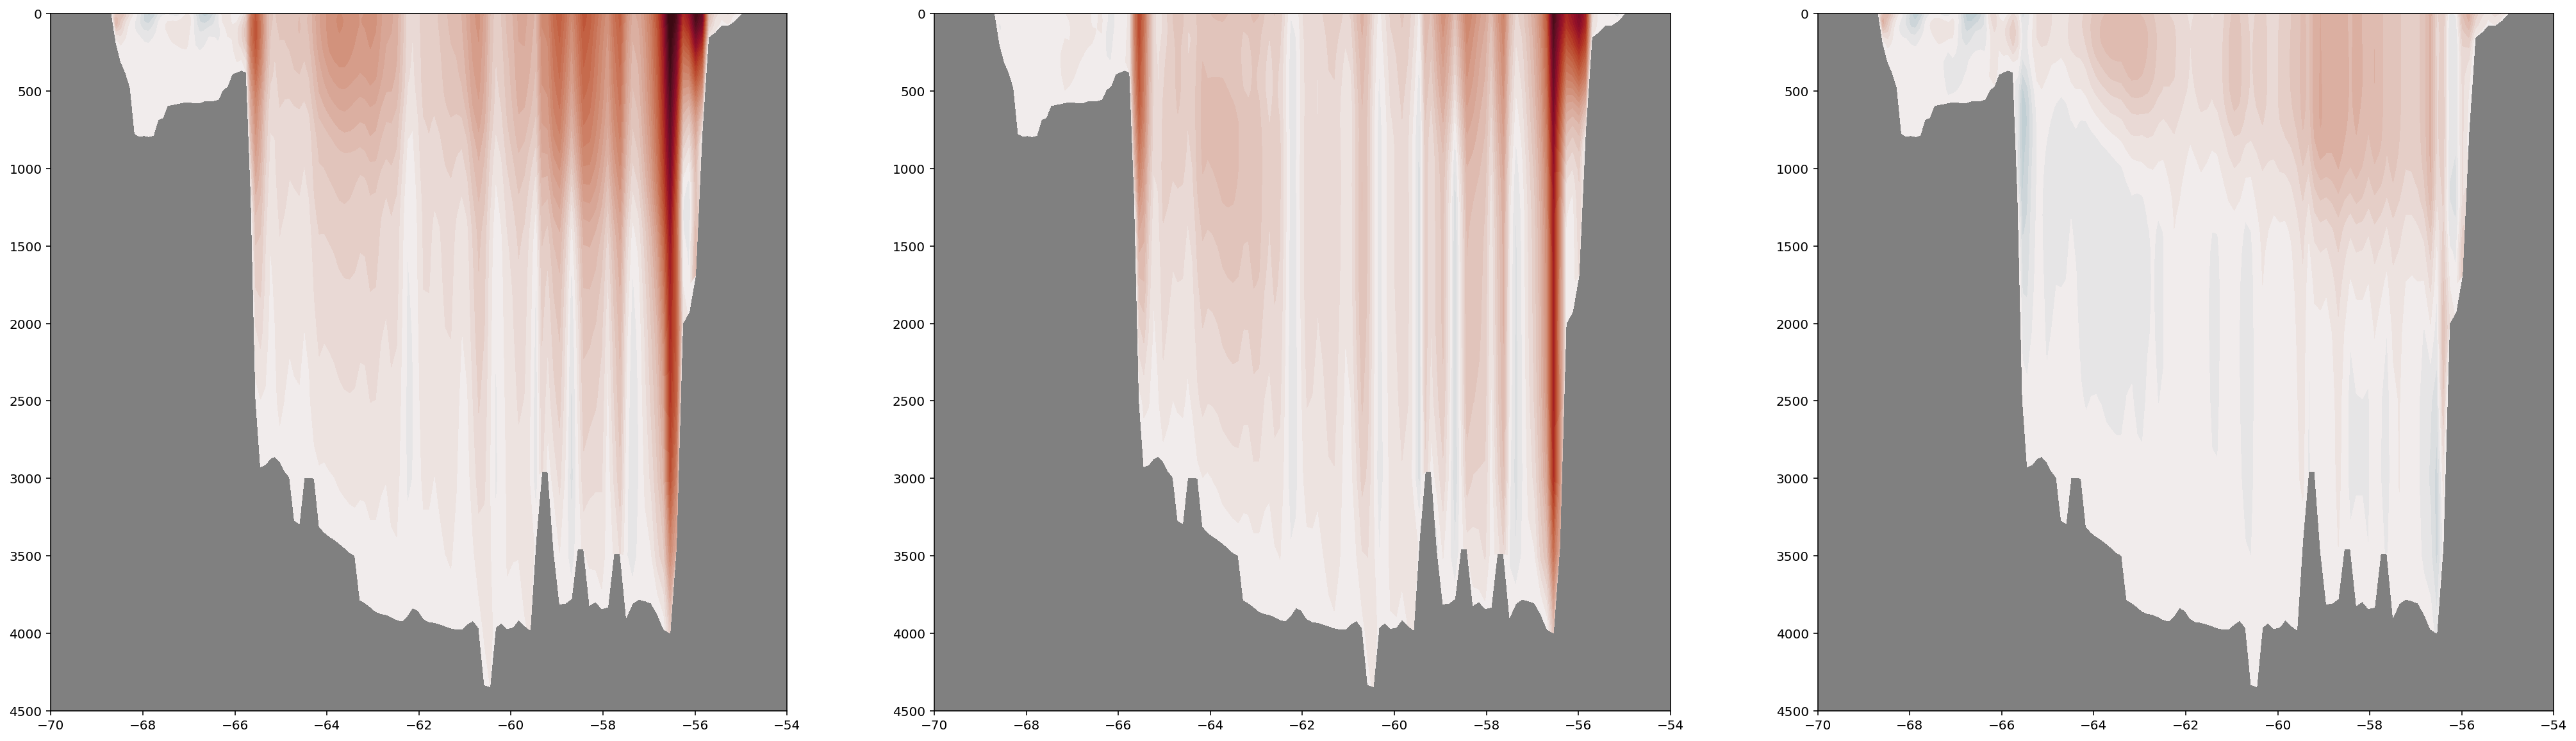

In [190]:
from matplotlib import gridspec
from matplotlib import colorbar

fig, ax = plt.subplots(1,3,figsize=(35,10))
gs = gridspec.GridSpec(1,3)
ax1, ax2, ax3 = plt.subplot(gs[0,0],facecolor='grey'),\
                plt.subplot(gs[0,1],facecolor='grey'),\
                plt.subplot(gs[0,2],facecolor='grey')

custom_ylim = (4500,0)
custom_xlim = (-70,-54)
plt.setp(ax1, ylim=custom_ylim, xlim=custom_xlim)
plt.setp(ax2, ylim=custom_ylim, xlim=custom_xlim)
plt.setp(ax3, ylim=custom_ylim, xlim=custom_xlim)

levels_vel = np.linspace(-0.3,0.3,60)
levels_vel_contour = np.linspace(-0.3,0.3,30)

ax1.contourf(lat_Drake_cm4,
             zl_Drake_cm4,
             TWT_cmip6_rho_field.reindex(z_l=TWT_cmip6_rho_field.z_l[::-1]).sel(time=slice('0555-01-16','0564-12-16')).mean(dim='time'),
             levels=levels_vel,
             cmap=cmocean.cm.balance,
             extend='both')

ax2.contourf(lat_Drake_cm4,
             zl_Drake_cm4,
             TWT_cmip6_temp_field.reindex(z_l=TWT_cmip6_temp_field.z_l[::-1]).sel(time=slice('0555-01-16','0564-12-16')).mean(dim='time'),
             levels=levels_vel,
             cmap=cmocean.cm.balance,
             extend='both')

ax3.contourf(lat_Drake_cm4,
             zl_Drake_cm4,
             TWT_cmip6_salinity_field.reindex(z_l=TWT_cmip6_salinity_field.z_l[::-1]).sel(time=slice('0555-01-16','0564-12-16')).mean(dim='time'),
             levels=levels_vel,
             cmap=cmocean.cm.balance,
             extend='both')

In [146]:
BottomVelTransport_cmip6[0].mean(dim='time').squeeze()

<xarray.DataArray 'uo' (z_l: 35, yh: 138)>
dask.array<getitem, shape=(35, 138), dtype=float32, chunksize=(35, 138), chunktype=numpy.ndarray>
Coordinates:
  * yh       (yh) float64 -70.35 -70.25 -70.15 -70.05 ... -54.78 -54.64 -54.49
  * z_l      (z_l) float64 2.5 10.0 20.0 32.5 ... 5e+03 5.5e+03 6e+03 6.5e+03
    xq       float64 -70.01

TypeError: Length of y (138) must match number of rows in z (35)

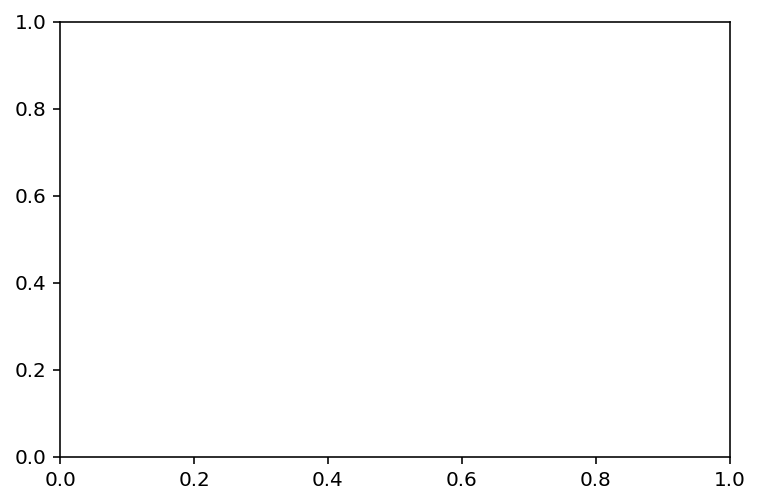

In [176]:
plt.contourf(lat_Drake_cm4[0][1:],
             zl_Drake_cm4[1][1:],
             BottomVelTransport_cmip6[0].mean(dim='time').squeeze(),
             levels=levels_vel,
             cmap=cmocean.cm.balance,
             extend='both',
             yincrease=False)

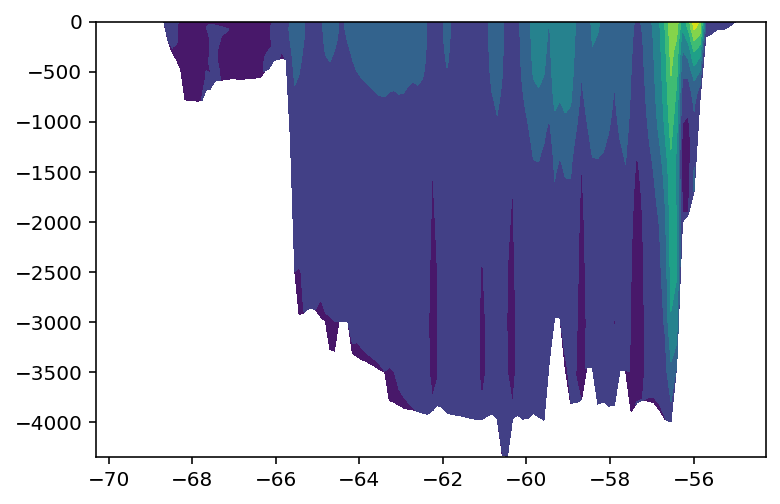

In [129]:
plt.contourf(lat_Drake_cm4,-zl_Drake_cm4,TWT_cmip6_rho_field.reindex(z_l=TWT_cmip6_rho_field.z_l[::-1]).mean(dim='time'))

#TWT_cmip6_rho_field.mean(dim='time').plot(yincrease=False)

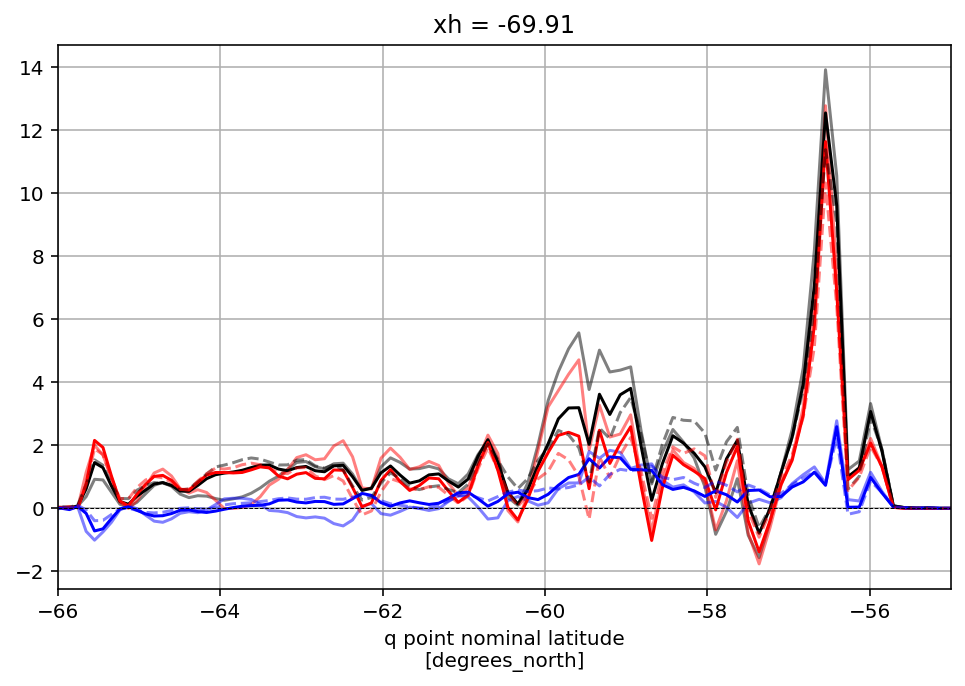

In [83]:
fig, ax = plt.subplots(figsize=(8,5))

TWT_cmip6_rho_field_volume_trans_Sv_vert_sum.sel(time=slice('0215-01-16','0224-12-16')).mean(dim='time').plot(color='black',xlim=(-66,-55),alpha=0.5)
TWT_cmip6_temp_field_volume_trans_Sv_vert_sum.sel(time=slice('0215-01-16','0224-12-16')).mean(dim='time').plot(color='red',alpha=0.5)
TWT_cmip6_salinity_field_volume_trans_Sv_vert_sum.sel(time=slice('0215-01-16','0224-12-16')).mean(dim='time').plot(color='blue',alpha=0.5)

TWT_cmip6_rho_field_volume_trans_Sv_vert_sum.sel(time=slice('0225-01-16','0238-12-16')).mean(dim='time').plot(color='black',xlim=(-66,-55))
TWT_cmip6_temp_field_volume_trans_Sv_vert_sum.sel(time=slice('0225-01-16','0238-12-16')).mean(dim='time').plot(color='red')
TWT_cmip6_salinity_field_volume_trans_Sv_vert_sum.sel(time=slice('0225-01-16','0238-12-16')).mean(dim='time').plot(color='blue')

TWT_cmip6_rho_field_volume_trans_Sv_vert_sum.sel(time=slice('0239-01-16','0248-12-16')).mean(dim='time').plot(color='black',xlim=(-66,-55),alpha=0.5,linestyle='--')
TWT_cmip6_temp_field_volume_trans_Sv_vert_sum.sel(time=slice('0239-01-16','0248-12-16')).mean(dim='time').plot(color='red',alpha=0.5,linestyle='--')
TWT_cmip6_salinity_field_volume_trans_Sv_vert_sum.sel(time=slice('0239-01-16','0248-12-16')).mean(dim='time').plot(color='blue',alpha=0.5,linestyle='--')

plt.axhline(y=0,color='k',linewidth=0.50,linestyle='--')
plt.grid()

In [ ]:
TWT_cmip6_1pct_salinity = compute_thermal_wind_salinity(static_sliced_om4p25,cmip6_cm4_1pct,grid_sliced_p25,beta_cmip6_cm4_1pct)
TWT_cmip6_1pct_salinity_annual_mean = annual_mean(TWT_cmip6_1pct_salinity[1])

TWT_cmip6_1pct_temp = compute_thermal_wind_temp(static_sliced_om4p25,cmip6_cm4_1pct,grid_sliced_p25,alpha_cmip6_cm4_1pct)
TWT_cmip6_1pct_temp_annual_mean = annual_mean(TWT_cmip6_1pct_temp[1])

TWT_cmip6_1pct = compute_thermal_wind(static_sliced_om4p25,rho_cmip6_cm4_1pct,cmip6_cm4_1pct,grid_sliced_p25)
TWT_cmip6_1pct_annual_mean = annual_mean(TWT_cmip6_1pct[1])

total_1pct = (-TWT_cmip6_1pct_temp_annual_mean + TWT_cmip6_1pct_salinity_annual_mean)*1035

In [ ]:
TWT_cmip6_ssp585_salinity = compute_thermal_wind_salinity(static_sliced_om4p25,cmip6_cm4_ssp585,grid_sliced_p25,beta_cmip6_cm4_ssp585)
TWT_cmip6_ssp585_salinity_annual_mean = annual_mean(TWT_cmip6_ssp585_salinity[1])

TWT_cmip6_ssp585_temp = compute_thermal_wind_temp(static_sliced_om4p25,cmip6_cm4_ssp585,grid_sliced_p25,alpha_cmip6_cm4_ssp585)
TWT_cmip6_ssp585_temp_annual_mean = annual_mean(TWT_cmip6_ssp585_temp[1])

TWT_cmip6_ssp585 = compute_thermal_wind(static_sliced_om4p25,rho_cmip6_cm4_ssp585,cmip6_cm4_ssp585,grid_sliced_p25)
TWT_cmip6_ssp585_annual_mean = annual_mean(TWT_cmip6_ssp585[1])

total_1pct = (-TWT_cmip6_ssp585_temp_annual_mean + TWT_cmip6_ssp585_salinity_annual_mean)*1035

Text(0.5, 1.0, '')

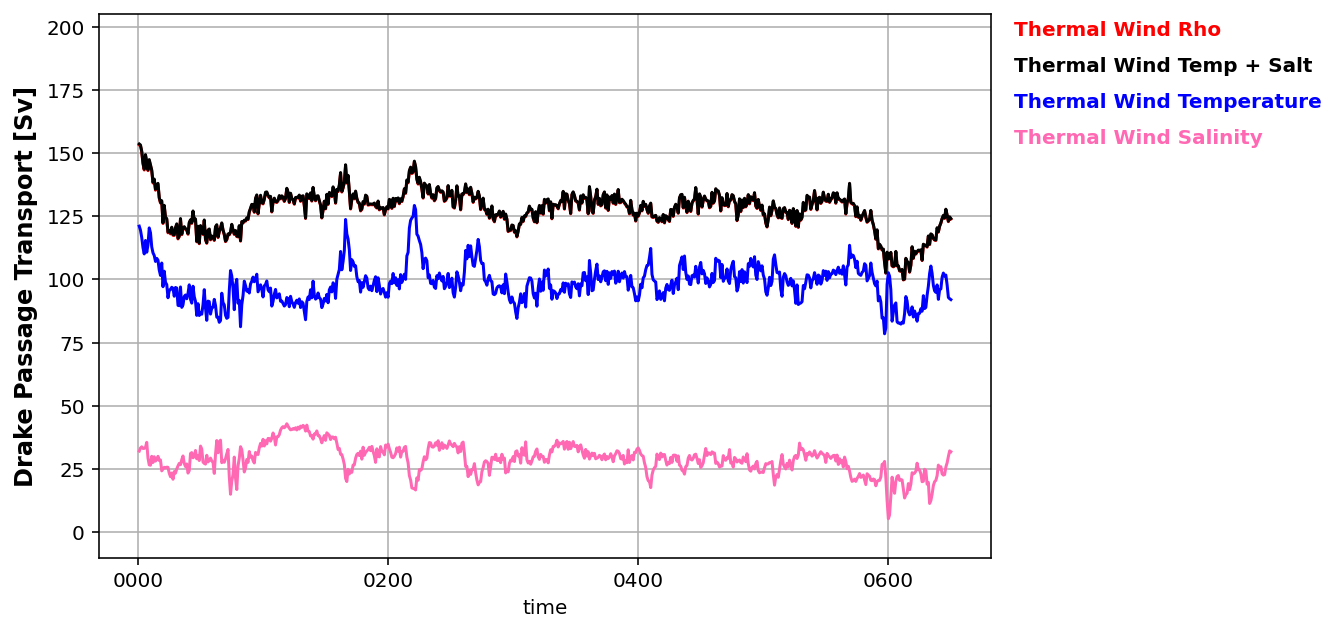

In [32]:
temp_component = TWT_cmip6_temp_annual_mean*-1*1035
salt_component = TWT_cmip6_salinity_annual_mean*1035

fig, ax = plt.subplots(figsize=(8,5))

total.plot(color='red')
TWT_cmip6_annual_mean.plot(color='black')
temp_component.plot(color='blue')
salt_component.plot(color='hotpink')

ax.set_ylabel('Drake Passage Transport [Sv]',fontweight='bold',fontsize='large')
plt.grid()
plt.ylim(-10,205)

fig.text(0.92,0.85,'Thermal Wind Rho',fontsize=10,color='red',fontweight='bold')
fig.text(0.92,0.80,'Thermal Wind Temp + Salt',fontsize=10,color='black',fontweight='bold')
fig.text(0.92,0.75,'Thermal Wind Temperature',fontsize=10,color='blue',fontweight='bold')
fig.text(0.92,0.70,'Thermal Wind Salinity',fontsize=10,color='hotpink',fontweight='bold')

plt.title('')

Text(0.5, 1.0, '')

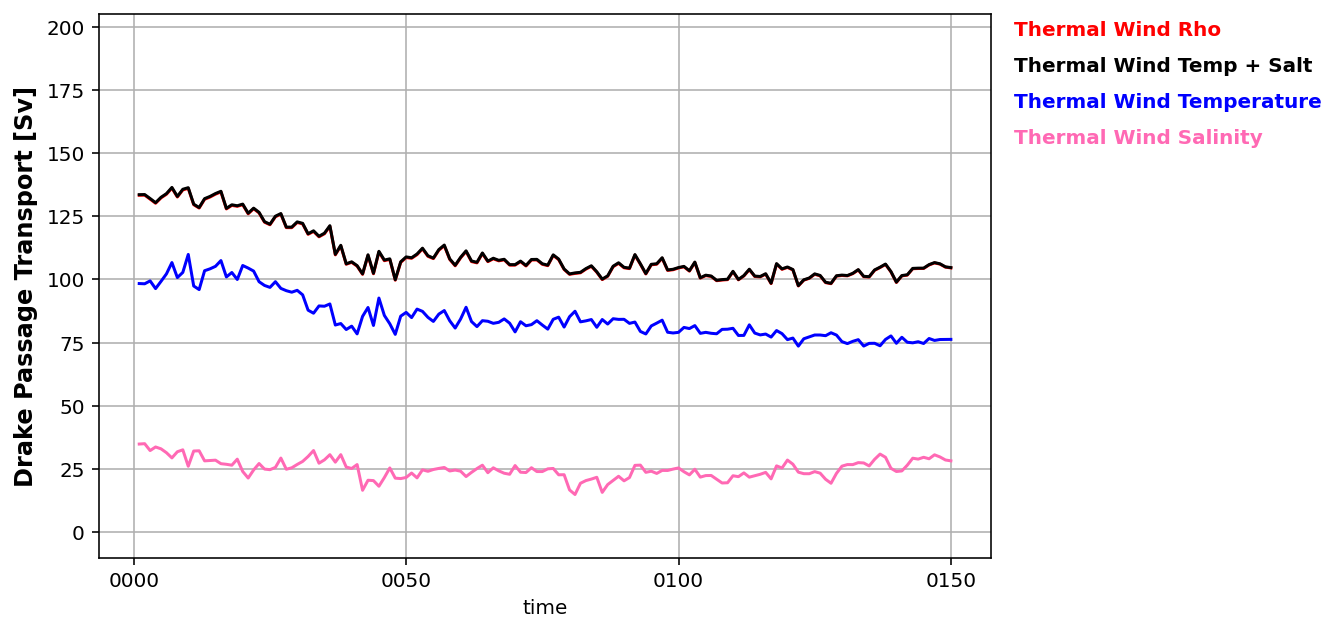

In [88]:
temp_component_1pct = TWT_cmip6_1pct_temp_annual_mean*-1*1035
salt_component_1pct = TWT_cmip6_1pct_salinity_annual_mean*1035

fig, ax = plt.subplots(figsize=(8,5))

total_1pct.plot(color='red')
TWT_cmip6_1pct_annual_mean.plot(color='black')
temp_component_1pct.plot(color='blue')
salt_component_1pct.plot(color='hotpink')

ax.set_ylabel('Drake Passage Transport [Sv]',fontweight='bold',fontsize='large')
plt.grid()
plt.ylim(-10,205)

fig.text(0.92,0.85,'Thermal Wind Rho',fontsize=10,color='red',fontweight='bold')
fig.text(0.92,0.80,'Thermal Wind Temp + Salt',fontsize=10,color='black',fontweight='bold')
fig.text(0.92,0.75,'Thermal Wind Temperature',fontsize=10,color='blue',fontweight='bold')
fig.text(0.92,0.70,'Thermal Wind Salinity',fontsize=10,color='hotpink',fontweight='bold')

plt.title('')

Text(0.5, 1.0, '')

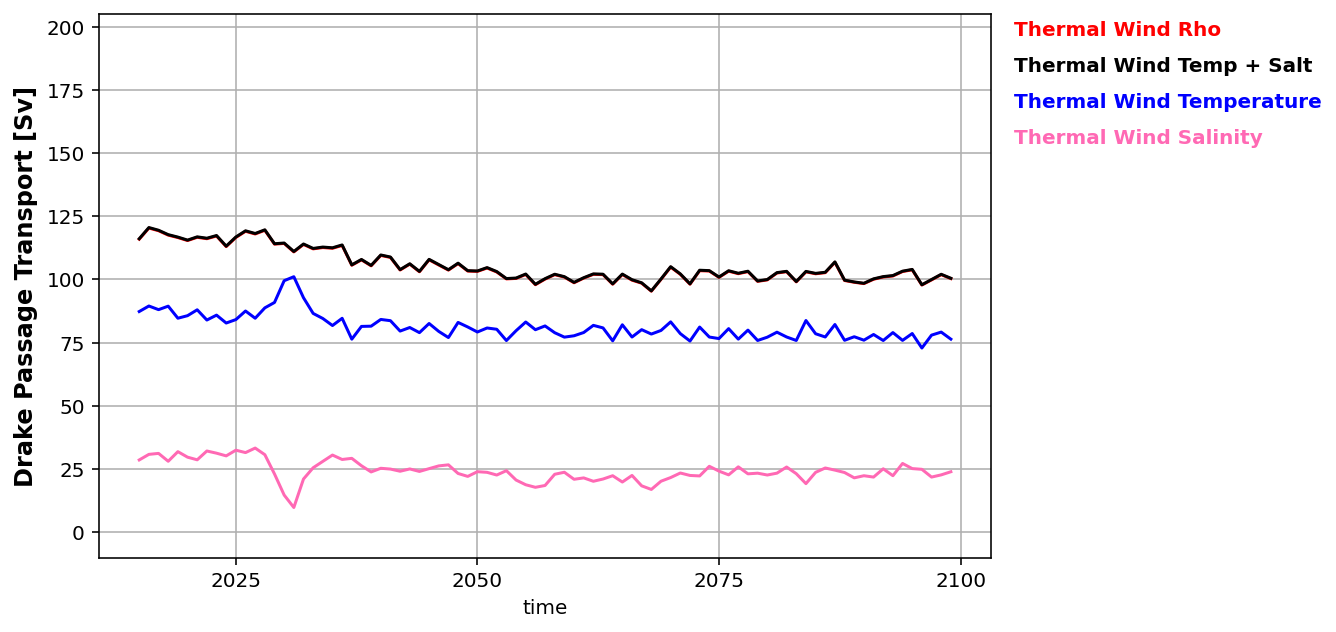

In [90]:
temp_component_ssp585 = TWT_cmip6_ssp585_temp_annual_mean*-1*1035
salt_component_ssp585 = TWT_cmip6_ssp585_salinity_annual_mean*1035

fig, ax = plt.subplots(figsize=(8,5))

total_1pct.plot(color='red')
TWT_cmip6_ssp585_annual_mean.plot(color='black')
temp_component_ssp585.plot(color='blue')
salt_component_ssp585.plot(color='hotpink')

ax.set_ylabel('Drake Passage Transport [Sv]',fontweight='bold',fontsize='large')
plt.grid()
plt.ylim(-10,205)

fig.text(0.92,0.85,'Thermal Wind Rho',fontsize=10,color='red',fontweight='bold')
fig.text(0.92,0.80,'Thermal Wind Temp + Salt',fontsize=10,color='black',fontweight='bold')
fig.text(0.92,0.75,'Thermal Wind Temperature',fontsize=10,color='blue',fontweight='bold')
fig.text(0.92,0.70,'Thermal Wind Salinity',fontsize=10,color='hotpink',fontweight='bold')

plt.title('')

### Plot transport as histograms as a function of latitude

In [139]:
TWT_cmip6_rho_field = annual_mean(TWT_cmip6[0])
TWT_cmip6_salinity_field = TWT_cmip6_salinity[0]*1035
TWT_cmip6_temp_field = TWT_cmip6_temp[0]*1035

TWT_cmip6_1pct_rho_field = annual_mean(TWT_cmip6_1pct[0])
TWT_cmip6_1pct_salinity_field = TWT_cmip6_1pct_salinity[0]*1035
TWT_cmip6_1pct_temp_field = TWT_cmip6_1pct_temp[0]*1035

TWT_cmip6_ssp585_rho_field = annual_mean(TWT_cmip6_ssp585[0])
TWT_cmip6_ssp585_salinity_field = TWT_cmip6_ssp585_salinity[0]*1035
TWT_cmip6_ssp585_temp_field = TWT_cmip6_ssp585_temp[0]*1035

#TWT_cmip6_rho_field.sel(time=slice('0081-01-16','0100-12-16')).mean(dim='time').plot(yincrease=False)

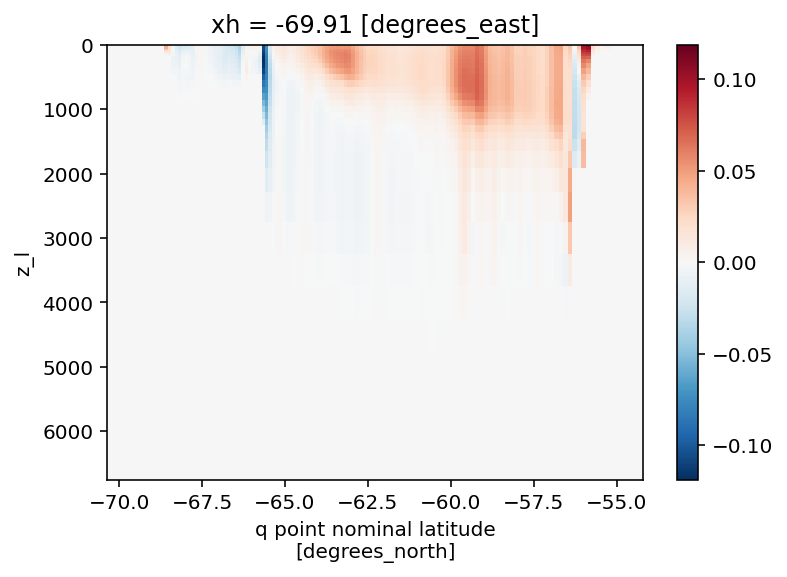

In [43]:
TWT_cmip6_salinity_field = TWT_cmip6_salinity[0]*1035
TWT_cmip6_salinity_field.sel(time=slice('0081-01-16','0100-12-16')).mean(dim='time').plot(yincrease=False)

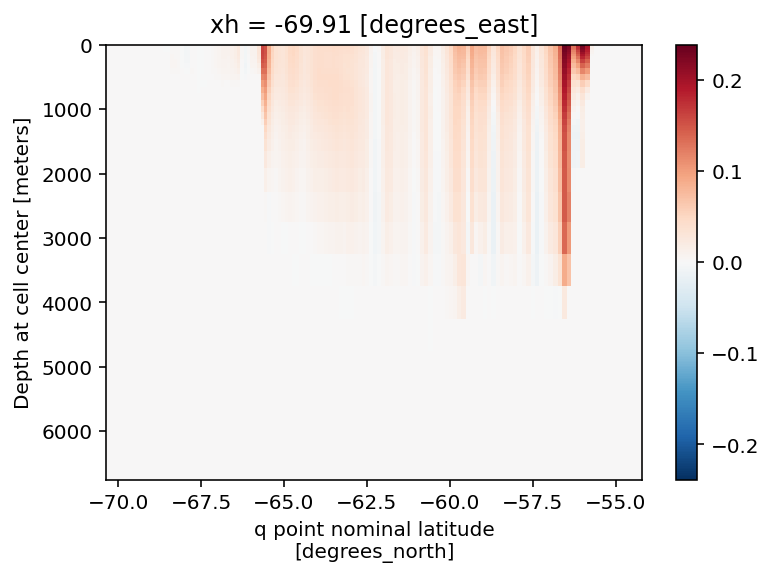

In [44]:
TWT_cmip6_temp_field = TWT_cmip6_temp[0]*-1*1035
TWT_cmip6_temp_field.sel(time=slice('0081-01-16','0100-12-16')).mean(dim='time').plot(yincrease=False)

In [140]:
thk = ml.derived.calc_dz(cmip6_cm4.z_l,cmip6_cm4.z_i,static_sliced_om4p25.deptho)
thk = thk.where(thk>0).sel(xh=cmip6_cm4.xh.values,method='nearest')
thk_interp = grid_sliced_p25.interp(thk,'Y',boundary='fill')
dy = static_sliced_om4p25.dyCv.sel(xh=cmip6_cm4.xh.values,method='nearest')

TWT_cmip6_rho_field_volume_trans = (TWT_cmip6_rho_field*thk_interp*dy)/10**6
TWT_cmip6_rho_field_volume_trans_Sv_vert_sum = TWT_cmip6_rho_field_volume_trans.sum(dim=(['z_l']))
TWT_cmip6_temp_field_volume_trans = (TWT_cmip6_temp_field*thk_interp*dy)/10**6
TWT_cmip6_temp_field_volume_trans_Sv_vert_sum = TWT_cmip6_temp_field_volume_trans.sum(dim=(['z_l']))*-1
TWT_cmip6_salinity_field_volume_trans = (TWT_cmip6_salinity_field*thk_interp*dy)/10**6
TWT_cmip6_salinity_field_volume_trans_Sv_vert_sum = TWT_cmip6_salinity_field_volume_trans.sum(dim=(['z_l']))

TWT_cmip6_1pct_rho_field_volume_trans = (TWT_cmip6_1pct_rho_field*thk_interp*dy)/10**6
TWT_cmip6_1pct_rho_field_volume_trans_Sv_vert_sum = TWT_cmip6_1pct_rho_field_volume_trans.sum(dim=(['z_l']))
TWT_cmip6_1pct_temp_field_volume_trans = (TWT_cmip6_1pct_temp_field*thk_interp*dy)/10**6
TWT_cmip6_1pct_temp_field_volume_trans_Sv_vert_sum = TWT_cmip6_1pct_temp_field_volume_trans.sum(dim=(['z_l']))*-1
TWT_cmip6_1pct_salinity_field_volume_trans = (TWT_cmip6_1pct_salinity_field*thk_interp*dy)/10**6
TWT_cmip6_1pct_salinity_field_volume_trans_Sv_vert_sum = TWT_cmip6_1pct_salinity_field_volume_trans.sum(dim=(['z_l']))

TWT_cmip6_ssp585_rho_field_volume_trans = (TWT_cmip6_ssp585_rho_field*thk_interp*dy)/10**6
TWT_cmip6_ssp585_rho_field_volume_trans_Sv_vert_sum = TWT_cmip6_ssp585_rho_field_volume_trans.sum(dim=(['z_l']))
TWT_cmip6_ssp585_temp_field_volume_trans = (TWT_cmip6_ssp585_temp_field*thk_interp*dy)/10**6
TWT_cmip6_ssp585_temp_field_volume_trans_Sv_vert_sum = TWT_cmip6_ssp585_temp_field_volume_trans.sum(dim=(['z_l']))*-1
TWT_cmip6_ssp585_salinity_field_volume_trans = (TWT_cmip6_ssp585_salinity_field*thk_interp*dy)/10**6
TWT_cmip6_ssp585_salinity_field_volume_trans_Sv_vert_sum = TWT_cmip6_ssp585_salinity_field_volume_trans.sum(dim=(['z_l']))

ModuleNotFoundError: No module named 'hvplot'

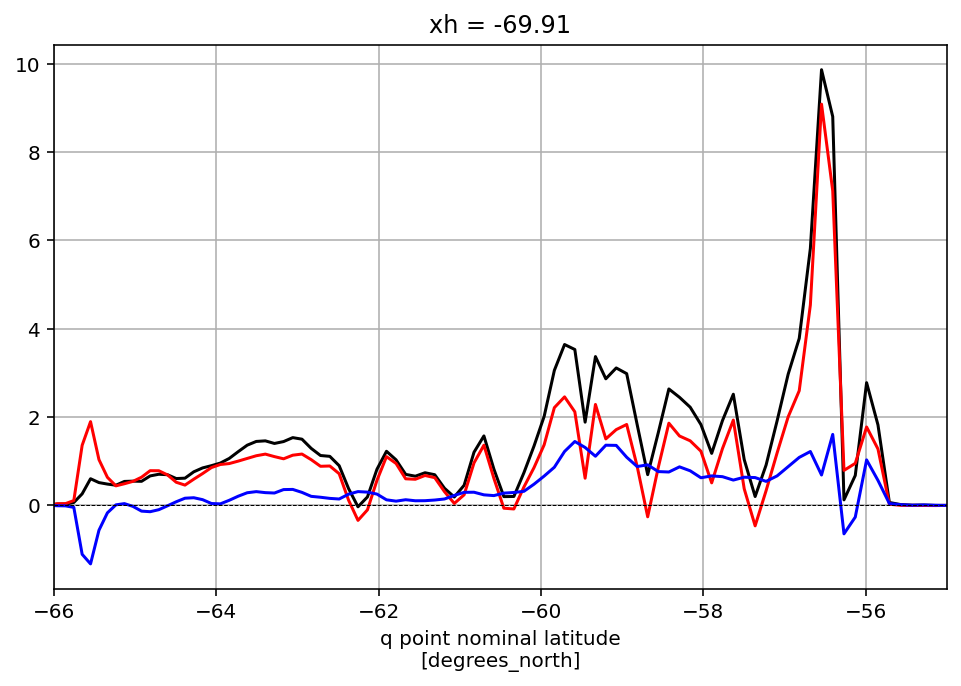

In [138]:
fig, ax = plt.subplots(figsize=(8,5))

TWT_cmip6_rho_field_volume_trans_Sv_vert_sum.sel(time=slice('0081-01-16','0100-12-16')).mean(dim='time').plot(color='black',xlim=(-66,-55))
TWT_cmip6_temp_field_volume_trans_Sv_vert_sum.sel(time=slice('0081-01-16','0100-12-16')).mean(dim='time').plot(color='red')
TWT_cmip6_salinity_field_volume_trans_Sv_vert_sum.sel(time=slice('0081-01-16','0100-12-16')).mean(dim='time').plot(color='blue')

plt.axhline(y=0,color='k',linewidth=0.50,linestyle='--')
plt.grid()

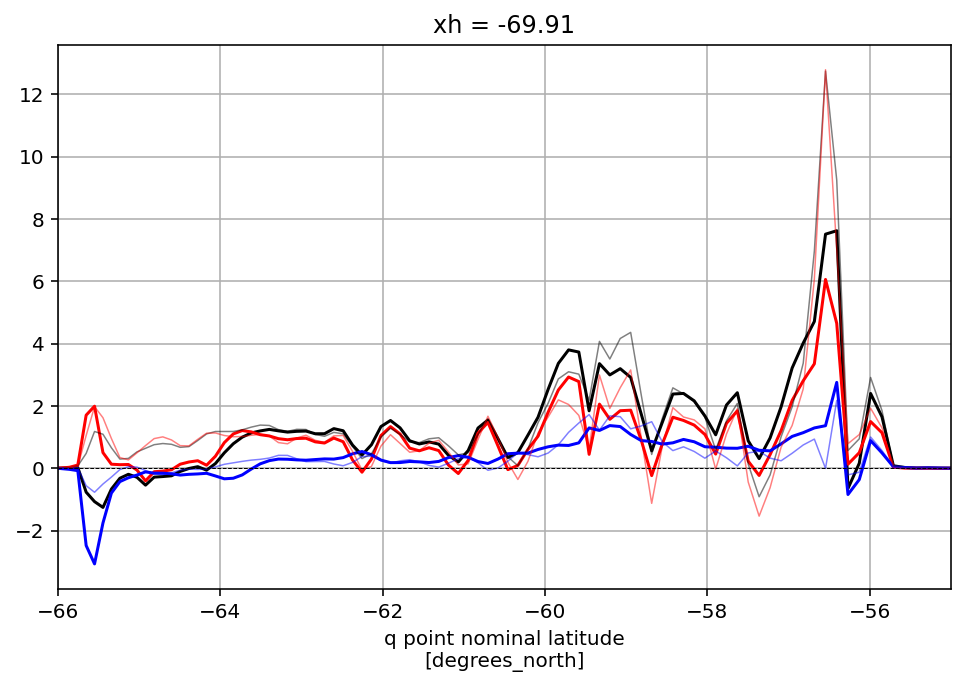

In [137]:
fig, ax = plt.subplots(figsize=(8,5))

TWT_cmip6_1pct_rho_field_volume_trans_Sv_vert_sum.sel(time=slice('0061-01-16','0080-12-16')).mean(dim='time').plot(color='black',xlim=(-66,-55))
TWT_cmip6_1pct_temp_field_volume_trans_Sv_vert_sum.sel(time=slice('0061-01-16','0080-12-16')).mean(dim='time').plot(color='red')
TWT_cmip6_1pct_salinity_field_volume_trans_Sv_vert_sum.sel(time=slice('0061-01-16','0080-12-16')).mean(dim='time').plot(color='blue')

TWT_cmip6_1pct_rho_field_volume_trans_Sv_vert_sum.sel(time=slice('0001-01-16','0020-12-16')).mean(dim='time').plot(color='black',alpha=0.5,linewidth=0.75)
TWT_cmip6_1pct_temp_field_volume_trans_Sv_vert_sum.sel(time=slice('0001-01-16','0020-12-16')).mean(dim='time').plot(color='red',alpha=0.5,linewidth=0.75)
TWT_cmip6_1pct_salinity_field_volume_trans_Sv_vert_sum.sel(time=slice('0001-01-16','0020-12-16')).mean(dim='time').plot(color='blue',alpha=0.5,linewidth=0.75)

plt.axhline(y=0,color='k',linewidth=0.50,linestyle='--')
plt.grid()

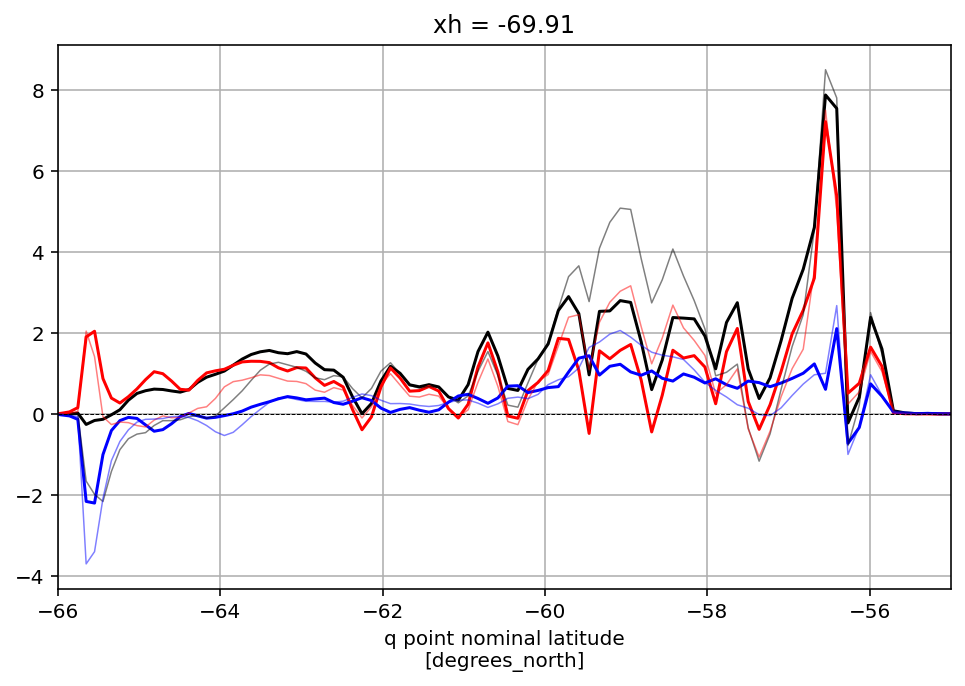

In [141]:
fig, ax = plt.subplots(figsize=(8,5))

TWT_cmip6_ssp585_rho_field_volume_trans_Sv_vert_sum.sel(time=slice('2014-01-16','2035-12-16')).mean(dim='time').plot(color='black',xlim=(-66,-55))
TWT_cmip6_ssp585_temp_field_volume_trans_Sv_vert_sum.sel(time=slice('2014-01-16','2035-12-16')).mean(dim='time').plot(color='red')
TWT_cmip6_ssp585_salinity_field_volume_trans_Sv_vert_sum.sel(time=slice('2014-01-16','2035-12-16')).mean(dim='time').plot(color='blue')

TWT_cmip6_ssp585_rho_field_volume_trans_Sv_vert_sum.sel(time=slice('2081-01-16','2100-12-16')).mean(dim='time').plot(color='black',alpha=0.5,linewidth=0.75)
TWT_cmip6_ssp585_temp_field_volume_trans_Sv_vert_sum.sel(time=slice('2081-01-16','2100-12-16')).mean(dim='time').plot(color='red',alpha=0.5,linewidth=0.75)
TWT_cmip6_ssp585_salinity_field_volume_trans_Sv_vert_sum.sel(time=slice('2081-01-16','2100-12-16')).mean(dim='time').plot(color='blue',alpha=0.5,linewidth=0.75)

plt.axhline(y=0,color='k',linewidth=0.50,linestyle='--')
plt.grid()

In [274]:
TWT_cmip6_rho_vert_sum = TWT_cmip6_rho_field_volume_trans_Sv_vert_sum.sel(time=slice('0081-01-16','0100-12-16')).mean(dim='time')
TWT_cmip6_rho_vert_sum = TWT_cmip6_rho_vert_sum.to_series()

TWT_cmip6_temp_vert_sum = TWT_cmip6_temp_field_volume_trans_Sv_vert_sum.sel(time=slice('0081-01-16','0100-12-16')).mean(dim='time')*-1
TWT_cmip6_temp_vert_sum = TWT_cmip6_temp_vert_sum.to_series()

TWT_cmip6_salinity_vert_sum = TWT_cmip6_salinity_field_volume_trans_Sv_vert_sum.sel(time=slice('0081-01-16','0100-12-16')).mean(dim='time')
TWT_cmip6_salinity_vert_sum = TWT_cmip6_salinity_vert_sum.to_series()

<AxesSubplot:xlabel='yq,xh'>

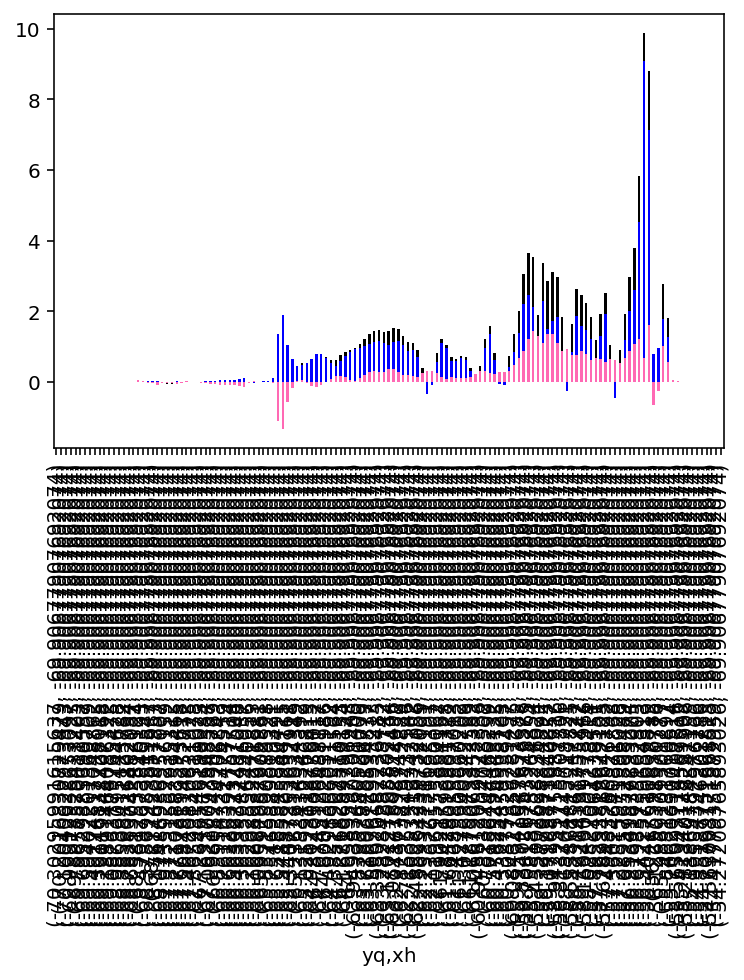

In [275]:
TWT_cmip6_rho_vert_sum.plot(kind='bar',color='k')
TWT_cmip6_temp_vert_sum.plot(kind='bar',color='blue')
TWT_cmip6_salinity_vert_sum.plot(kind='bar',color='hotpink')

### Composites of 20 year periods centered on strong (max) ACC and weak (min) ACC

In [91]:
### Thermal wind transport rho:
ACC_max1_twt_rho = TWT_cmip6_rho_field_volume_trans_Sv_vert_sum.sel(time=slice('0231-01-16','0250-12-16')).mean(dim='time')
ACC_max2_twt_rho = TWT_cmip6_rho_field_volume_trans_Sv_vert_sum.sel(time=slice('0341-01-16','0360-12-16')).mean(dim='time')
ACC_max3_twt_rho = TWT_cmip6_rho_field_volume_trans_Sv_vert_sum.sel(time=slice('0447-01-16','0466-12-16')).mean(dim='time')
ACC_max4_twt_rho = TWT_cmip6_rho_field_volume_trans_Sv_vert_sum.sel(time=slice('0546-01-16','0565-12-16')).mean(dim='time')

ACC_min1_twt_rho = TWT_cmip6_rho_field_volume_trans_Sv_vert_sum.sel(time=slice('0291-01-16','0310-12-16')).mean(dim='time')
ACC_min2_twt_rho = TWT_cmip6_rho_field_volume_trans_Sv_vert_sum.sel(time=slice('0405-01-16','0426-12-16')).mean(dim='time')
ACC_min3_twt_rho = TWT_cmip6_rho_field_volume_trans_Sv_vert_sum.sel(time=slice('0499-01-16','0518-12-16')).mean(dim='time')
ACC_min4_twt_rho = TWT_cmip6_rho_field_volume_trans_Sv_vert_sum.sel(time=slice('0605-01-16','0624-12-16')).mean(dim='time')

ACC_max_twt_rho_ens = xr.concat([ACC_max1_twt_rho,ACC_max2_twt_rho,ACC_max3_twt_rho,ACC_max4_twt_rho],dim='member').mean(dim='member')
ACC_min_twt_rho_ens = xr.concat([ACC_min1_twt_rho,ACC_min2_twt_rho,ACC_min3_twt_rho,ACC_min4_twt_rho],dim='member').mean(dim='member')

### Thermal wind transport temp:
ACC_piControl_ave_twt_temp = TWT_cmip6_temp_field_volume_trans_Sv_vert_sum.mean(dim='time')*-1

ACC_max1_twt_temp = TWT_cmip6_temp_field_volume_trans_Sv_vert_sum.sel(time=slice('0231-01-16','0250-12-16')).mean(dim='time')*-1
ACC_max2_twt_temp = TWT_cmip6_temp_field_volume_trans_Sv_vert_sum.sel(time=slice('0341-01-16','0360-12-16')).mean(dim='time')*-1
ACC_max3_twt_temp = TWT_cmip6_temp_field_volume_trans_Sv_vert_sum.sel(time=slice('0447-01-16','0466-12-16')).mean(dim='time')*-1
ACC_max4_twt_temp = TWT_cmip6_temp_field_volume_trans_Sv_vert_sum.sel(time=slice('0546-01-16','0565-12-16')).mean(dim='time')*-1

ACC_min1_twt_temp = TWT_cmip6_temp_field_volume_trans_Sv_vert_sum.sel(time=slice('0291-01-16','0310-12-16')).mean(dim='time')*-1
ACC_min2_twt_temp = TWT_cmip6_temp_field_volume_trans_Sv_vert_sum.sel(time=slice('0405-01-16','0426-12-16')).mean(dim='time')*-1
ACC_min3_twt_temp = TWT_cmip6_temp_field_volume_trans_Sv_vert_sum.sel(time=slice('0499-01-16','0518-12-16')).mean(dim='time')*-1
ACC_min4_twt_temp = TWT_cmip6_temp_field_volume_trans_Sv_vert_sum.sel(time=slice('0605-01-16','0624-12-16')).mean(dim='time')*-1

ACC_max_twt_temp_ens = xr.concat([ACC_max1_twt_temp,ACC_max2_twt_temp,ACC_max3_twt_temp,ACC_max4_twt_temp],dim='member').mean(dim='member')
ACC_min_twt_temp_ens = xr.concat([ACC_min1_twt_temp,ACC_min2_twt_temp,ACC_min3_twt_temp,ACC_min4_twt_temp],dim='member').mean(dim='member')

### Thermal wind transport salt:
ACC_max1_twt_salt = TWT_cmip6_salinity_field_volume_trans_Sv_vert_sum.sel(time=slice('0231-01-16','0250-12-16')).mean(dim='time')
ACC_max2_twt_salt = TWT_cmip6_salinity_field_volume_trans_Sv_vert_sum.sel(time=slice('0341-01-16','0360-12-16')).mean(dim='time')
ACC_max3_twt_salt = TWT_cmip6_salinity_field_volume_trans_Sv_vert_sum.sel(time=slice('0447-01-16','0466-12-16')).mean(dim='time')
ACC_max4_twt_salt = TWT_cmip6_salinity_field_volume_trans_Sv_vert_sum.sel(time=slice('0546-01-16','0565-12-16')).mean(dim='time')

ACC_min1_twt_salt = TWT_cmip6_salinity_field_volume_trans_Sv_vert_sum.sel(time=slice('0291-01-16','0310-12-16')).mean(dim='time')
ACC_min2_twt_salt = TWT_cmip6_salinity_field_volume_trans_Sv_vert_sum.sel(time=slice('0405-01-16','0426-12-16')).mean(dim='time')
ACC_min3_twt_salt = TWT_cmip6_salinity_field_volume_trans_Sv_vert_sum.sel(time=slice('0499-01-16','0518-12-16')).mean(dim='time')
ACC_min4_twt_salt = TWT_cmip6_salinity_field_volume_trans_Sv_vert_sum.sel(time=slice('0605-01-16','0624-12-16')).mean(dim='time')

ACC_max_twt_salt_ens = xr.concat([ACC_max1_twt_salt,ACC_max2_twt_salt,ACC_max3_twt_salt,ACC_max4_twt_salt],dim='member').mean(dim='member')
ACC_min_twt_salt_ens = xr.concat([ACC_min1_twt_salt,ACC_min2_twt_salt,ACC_min3_twt_salt,ACC_min4_twt_salt],dim='member').mean(dim='member')


### bottom velocity transport
ACC_piControl_ave_bvt = BottomVelTransport_cmip6[2].mean(dim='time')/10**6

ACC_max1_bvt = BottomVelTransport_cmip6[2].sel(time=slice('0231-01-16','0250-12-16')).mean(dim='time')/10**6
ACC_max2_bvt = BottomVelTransport_cmip6[2].sel(time=slice('0341-01-16','0360-12-16')).mean(dim='time')/10**6
ACC_max3_bvt = BottomVelTransport_cmip6[2].sel(time=slice('0447-01-16','0466-12-16')).mean(dim='time')/10**6
ACC_max4_bvt = BottomVelTransport_cmip6[2].sel(time=slice('0546-01-16','0565-12-16')).mean(dim='time')/10**6

ACC_min1_bvt = BottomVelTransport_cmip6[2].sel(time=slice('0291-01-16','0310-12-16')).mean(dim='time')/10**6
ACC_min2_bvt = BottomVelTransport_cmip6[2].sel(time=slice('0405-01-16','0426-12-16')).mean(dim='time')/10**6
ACC_min3_bvt = BottomVelTransport_cmip6[2].sel(time=slice('0499-01-16','0518-12-16')).mean(dim='time')/10**6
ACC_min4_bvt = BottomVelTransport_cmip6[2].sel(time=slice('0605-01-16','0624-12-16')).mean(dim='time')/10**6

ACC_max_bvt_ens = xr.concat([ACC_max1_bvt,ACC_max2_bvt,ACC_max3_bvt,ACC_max4_bvt],dim='member').mean(dim='member')
ACC_min_bvt_ens = xr.concat([ACC_min1_bvt,ACC_min2_bvt,ACC_min3_bvt,ACC_min4_bvt],dim='member').mean(dim='member')



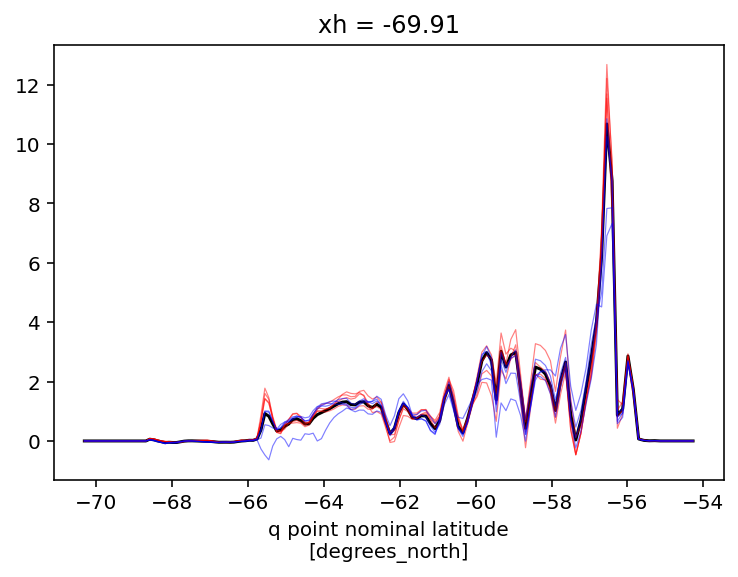

In [51]:
TWT_cmip6_rho_field_volume_trans_Sv_vert_sum.mean(dim='time').plot(color='k',linewidth=1.5)

ACC_max1_twt_rho.plot(color='red',linewidth=0.60,alpha=0.5)
ACC_max2_twt_rho.plot(color='red',linewidth=0.60,alpha=0.5)
ACC_max3_twt_rho.plot(color='red',linewidth=0.60,alpha=0.5)
ACC_max4_twt_rho.plot(color='red',linewidth=0.60,alpha=0.5)

ACC_min1_twt_rho.plot(color='blue',linewidth=0.60,alpha=0.5)
ACC_min2_twt_rho.plot(color='blue',linewidth=0.60,alpha=0.5)
ACC_min3_twt_rho.plot(color='blue',linewidth=0.60,alpha=0.5)
ACC_min4_twt_rho.plot(color='blue',linewidth=0.60,alpha=0.5)


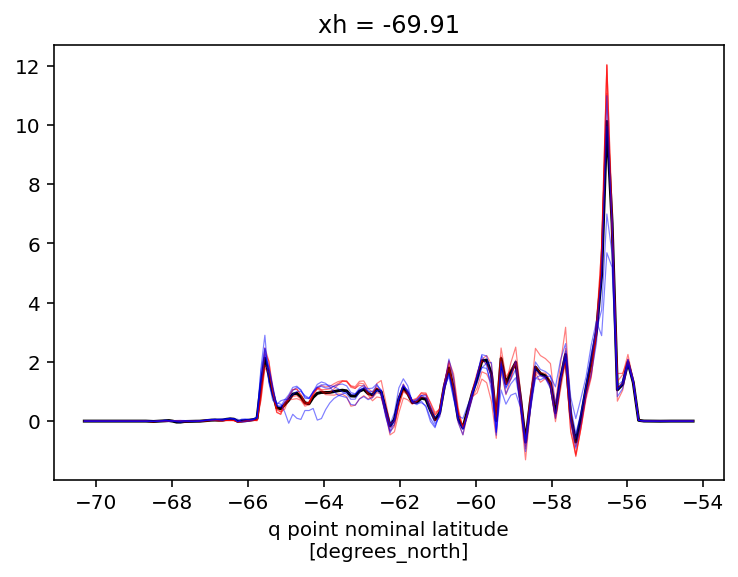

In [58]:
ACC_piControl_ave_twt_temp.plot(color='k',linewidth=1.5)

ACC_max1_twt_temp.plot(color='red',linewidth=0.60,alpha=0.5)
ACC_max2_twt_temp.plot(color='red',linewidth=0.60,alpha=0.5)
ACC_max3_twt_temp.plot(color='red',linewidth=0.60,alpha=0.5)
ACC_max4_twt_temp.plot(color='red',linewidth=0.60,alpha=0.5)

ACC_min1_twt_temp.plot(color='blue',linewidth=0.60,alpha=0.5)
ACC_min2_twt_temp.plot(color='blue',linewidth=0.60,alpha=0.5)
ACC_min3_twt_temp.plot(color='blue',linewidth=0.60,alpha=0.5)
ACC_min4_twt_temp.plot(color='blue',linewidth=0.60,alpha=0.5)

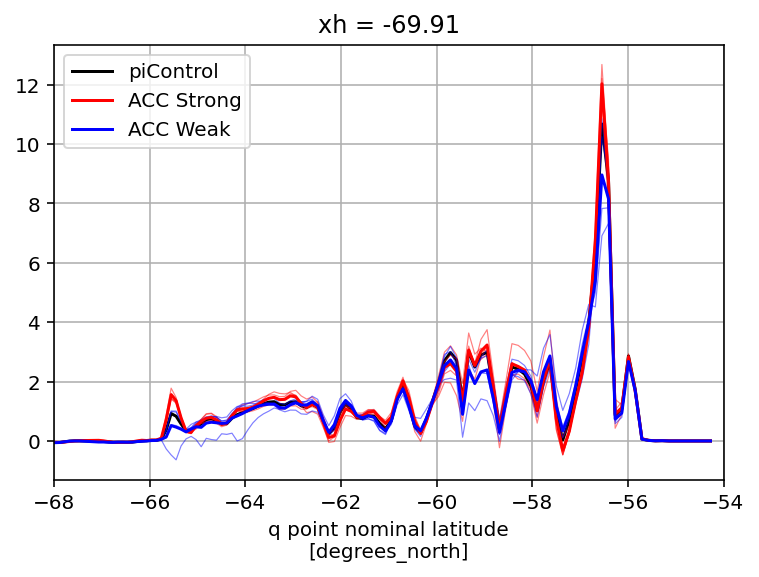

In [116]:
TWT_cmip6_rho_field_volume_trans_Sv_vert_sum.mean(dim='time').plot(color='k',linewidth=1.5,label='piControl',xlim=(-68,-54))

ACC_max1_twt_rho.plot(color='red',linewidth=0.60,alpha=0.5)
ACC_max2_twt_rho.plot(color='red',linewidth=0.60,alpha=0.5)
ACC_max3_twt_rho.plot(color='red',linewidth=0.60,alpha=0.5)
ACC_max4_twt_rho.plot(color='red',linewidth=0.60,alpha=0.5)

ACC_min1_twt_rho.plot(color='blue',linewidth=0.60,alpha=0.5)
ACC_min2_twt_rho.plot(color='blue',linewidth=0.60,alpha=0.5)
ACC_min3_twt_rho.plot(color='blue',linewidth=0.60,alpha=0.5)
ACC_min4_twt_rho.plot(color='blue',linewidth=0.60,alpha=0.5)

ACC_max_twt_rho_ens.plot(color='red',linewidth=1.5,label='ACC Strong')
ACC_min_twt_rho_ens.plot(color='blue',linewidth=1.5,label='ACC Weak')

plt.legend()
plt.grid()

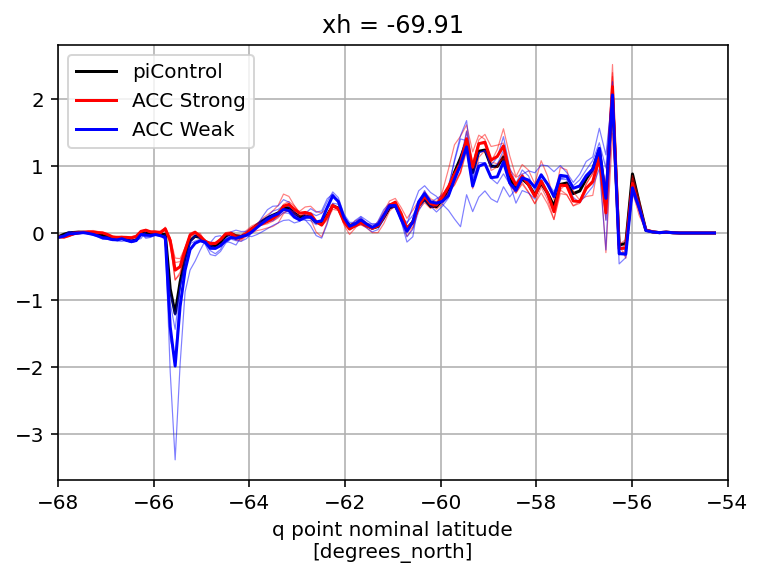

In [114]:
TWT_cmip6_salinity_field_volume_trans_Sv_vert_sum.mean(dim='time').plot(color='k',linewidth=1.5,label='piControl',xlim=(-68,-54))

ACC_max1_twt_salt.plot(color='red',linewidth=0.60,alpha=0.5)
ACC_max2_twt_salt.plot(color='red',linewidth=0.60,alpha=0.5)
ACC_max3_twt_salt.plot(color='red',linewidth=0.60,alpha=0.5)
ACC_max4_twt_salt.plot(color='red',linewidth=0.60,alpha=0.5)

ACC_min1_twt_salt.plot(color='blue',linewidth=0.60,alpha=0.5)
ACC_min2_twt_salt.plot(color='blue',linewidth=0.60,alpha=0.5)
ACC_min3_twt_salt.plot(color='blue',linewidth=0.60,alpha=0.5)
ACC_min4_twt_salt.plot(color='blue',linewidth=0.60,alpha=0.5)

ACC_max_twt_salt_ens.plot(color='red',linewidth=1.5,label='ACC Strong')
ACC_min_twt_salt_ens.plot(color='blue',linewidth=1.5,label='ACC Weak')

plt.legend()
plt.grid()

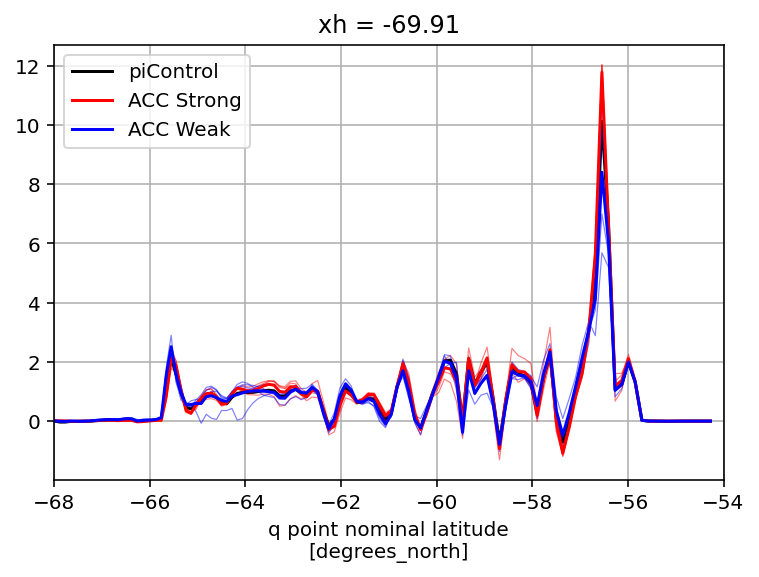

In [117]:
ACC_piControl_ave_twt_temp.plot(color='k',linewidth=1.5,label='piControl',xlim=(-68,-54))

ACC_max1_twt_temp.plot(color='red',linewidth=0.60,alpha=0.5)
ACC_max2_twt_temp.plot(color='red',linewidth=0.60,alpha=0.5)
ACC_max3_twt_temp.plot(color='red',linewidth=0.60,alpha=0.5)
ACC_max4_twt_temp.plot(color='red',linewidth=0.60,alpha=0.5)

ACC_min1_twt_temp.plot(color='blue',linewidth=0.60,alpha=0.5)
ACC_min2_twt_temp.plot(color='blue',linewidth=0.60,alpha=0.5)
ACC_min3_twt_temp.plot(color='blue',linewidth=0.60,alpha=0.5)
ACC_min4_twt_temp.plot(color='blue',linewidth=0.60,alpha=0.5)

ACC_max_twt_temp_ens.plot(color='red',linewidth=1.5,label='ACC Strong')
ACC_min_twt_temp_ens.plot(color='blue',linewidth=1.5,label='ACC Weak')

plt.legend()
plt.grid()

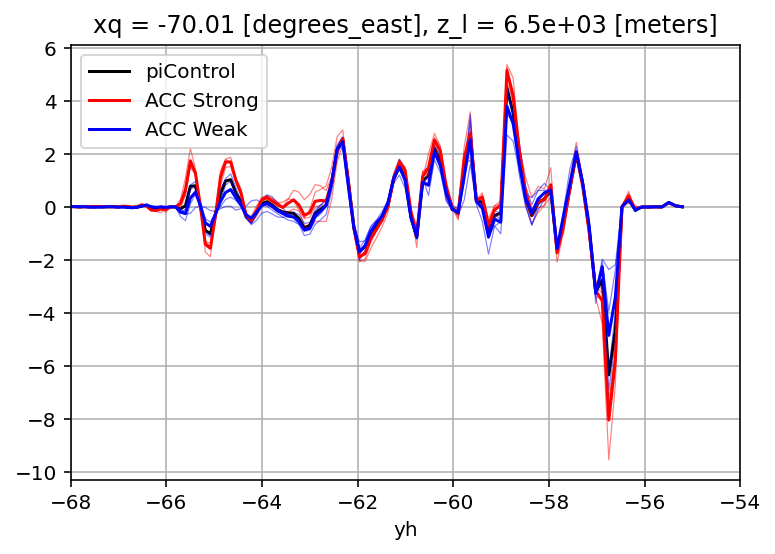

In [118]:
ACC_piControl_ave_bvt.plot(color='k',linewidth=1.5,label='piControl',xlim=(-68,-54))

ACC_max1_bvt.plot(color='red',linewidth=0.60,alpha=0.5)
ACC_max2_bvt.plot(color='red',linewidth=0.60,alpha=0.5)
ACC_max3_bvt.plot(color='red',linewidth=0.60,alpha=0.5)
ACC_max4_bvt.plot(color='red',linewidth=0.60,alpha=0.5)

ACC_min1_bvt.plot(color='blue',linewidth=0.60,alpha=0.5)
ACC_min2_bvt.plot(color='blue',linewidth=0.60,alpha=0.5)
ACC_min3_bvt.plot(color='blue',linewidth=0.60,alpha=0.5)
ACC_min4_bvt.plot(color='blue',linewidth=0.60,alpha=0.5)

ACC_max_bvt_ens.plot(color='red',linewidth=1.5,label='ACC Strong')
ACC_min_bvt_ens.plot(color='blue',linewidth=1.5,label='ACC Weak')

plt.legend()
plt.grid()

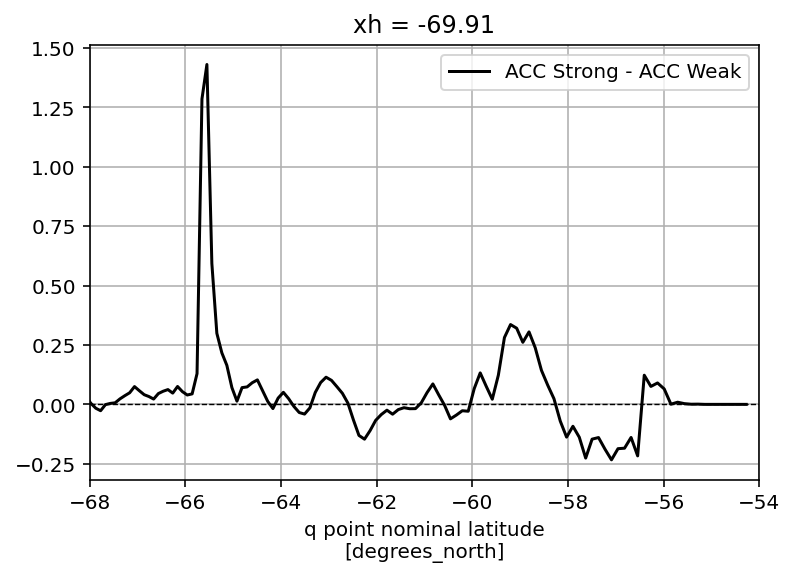

In [132]:
diff_ACC_bvt_ens = ACC_max_bvt_ens - ACC_min_bvt_ens
diff_ACC_twt_rho_ens = ACC_max_twt_rho_ens - ACC_min_twt_rho_ens
diff_ACC_twt_temp_ens = ACC_max_twt_temp_ens - ACC_min_twt_temp_ens
diff_ACC_twt_salt_ens = ACC_max_twt_salt_ens - ACC_min_twt_salt_ens

#diff_ACC_bvt_ens.plot(color='k',label='ACC Strong - ACC Weak',xlim=(-68,-54))
#diff_ACC_twt_rho_ens.plot(color='k',label='ACC Strong - ACC Weak',xlim=(-68,-54))
#diff_ACC_twt_temp_ens.plot(color='k',label='ACC Strong - ACC Weak',xlim=(-68,-54))
diff_ACC_twt_salt_ens.plot(color='k',label='ACC Strong - ACC Weak',xlim=(-68,-54))
plt.legend()
plt.axhline(y=0,linewidth=0.7,linestyle='--',color='k')
plt.grid()

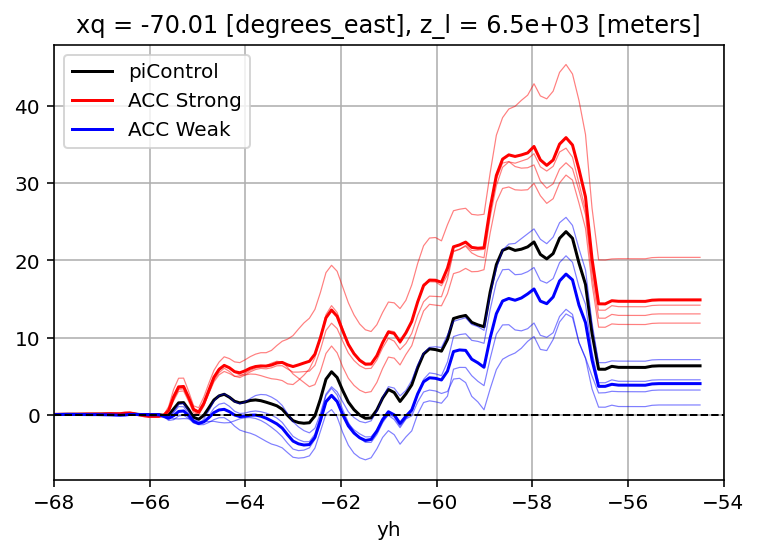

In [120]:
ACC_piControl_ave_bvt.cumsum(dim='yh').plot(color='k',linewidth=1.5,label='piControl',xlim=(-68,-54))
ACC_max1_bvt.cumsum(dim='yh').plot(color='red',linewidth=0.60,alpha=0.5)
ACC_max2_bvt.cumsum(dim='yh').plot(color='red',linewidth=0.60,alpha=0.5)
ACC_max3_bvt.cumsum(dim='yh').plot(color='red',linewidth=0.60,alpha=0.5)
ACC_max4_bvt.cumsum(dim='yh').plot(color='red',linewidth=0.60,alpha=0.5)

ACC_min1_bvt.cumsum(dim='yh').plot(color='blue',linewidth=0.60,alpha=0.5)
ACC_min2_bvt.cumsum(dim='yh').plot(color='blue',linewidth=0.60,alpha=0.5)
ACC_min3_bvt.cumsum(dim='yh').plot(color='blue',linewidth=0.60,alpha=0.5)
ACC_min4_bvt.cumsum(dim='yh').plot(color='blue',linewidth=0.60,alpha=0.5)

ACC_max_bvt_ens.cumsum(dim='yh').plot(color='red',linewidth=1.5,label='ACC Strong')
ACC_min_bvt_ens.cumsum(dim='yh').plot(color='blue',linewidth=1.5,label='ACC Weak')

plt.axhline(y=0,linewidth=1,linestyle='--',color='k')
plt.legend()
plt.grid()


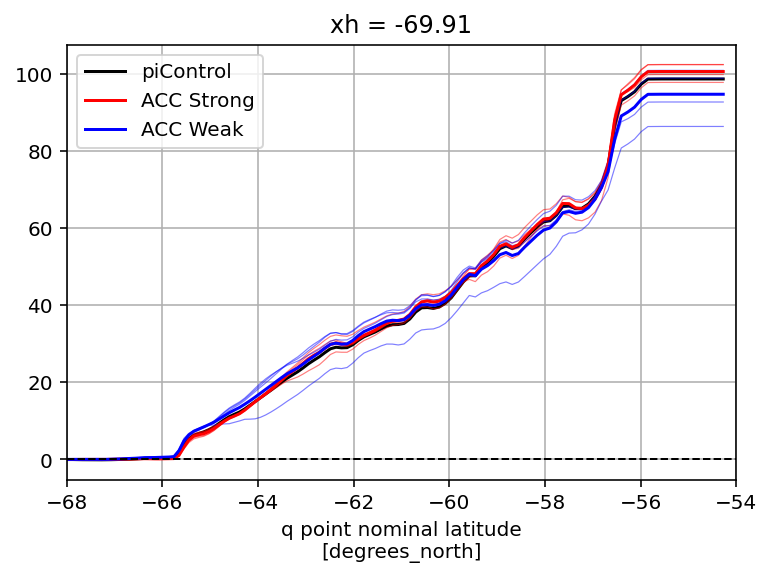

In [125]:
ACC_piControl_ave_twt_temp.cumsum(dim='yq').plot(color='k',linewidth=1.5,label='piControl',xlim=(-68,-54))
ACC_max1_twt_temp.cumsum(dim='yq').plot(color='red',linewidth=0.60,alpha=0.5)
ACC_max2_twt_temp.cumsum(dim='yq').plot(color='red',linewidth=0.60,alpha=0.5)
ACC_max3_twt_temp.cumsum(dim='yq').plot(color='red',linewidth=0.60,alpha=0.5)
ACC_max4_twt_temp.cumsum(dim='yq').plot(color='red',linewidth=0.60,alpha=0.5)

ACC_min1_twt_temp.cumsum(dim='yq').plot(color='blue',linewidth=0.60,alpha=0.5)
ACC_min2_twt_temp.cumsum(dim='yq').plot(color='blue',linewidth=0.60,alpha=0.5)
ACC_min3_twt_temp.cumsum(dim='yq').plot(color='blue',linewidth=0.60,alpha=0.5)
ACC_min4_twt_temp.cumsum(dim='yq').plot(color='blue',linewidth=0.60,alpha=0.5)

ACC_max_twt_temp_ens.cumsum(dim='yq').plot(color='red',linewidth=1.5,label='ACC Strong')
ACC_min_twt_temp_ens.cumsum(dim='yq').plot(color='blue',linewidth=1.5,label='ACC Weak')

plt.axhline(y=0,linewidth=1,linestyle='--',color='k')
plt.legend()
plt.grid()

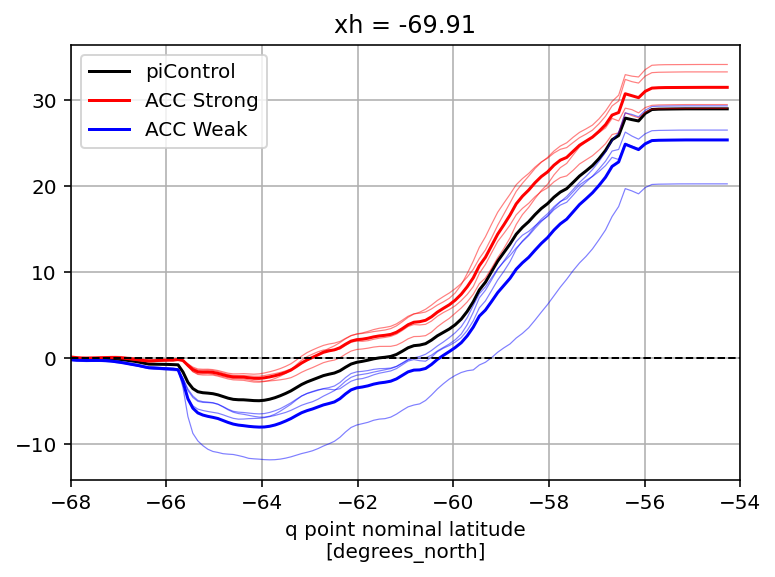

In [126]:
TWT_cmip6_salinity_field_volume_trans_Sv_vert_sum.mean(dim='time').cumsum(dim='yq').plot(color='k',linewidth=1.5,label='piControl',xlim=(-68,-54))
ACC_max1_twt_salt.cumsum(dim='yq').plot(color='red',linewidth=0.60,alpha=0.5)
ACC_max2_twt_salt.cumsum(dim='yq').plot(color='red',linewidth=0.60,alpha=0.5)
ACC_max3_twt_salt.cumsum(dim='yq').plot(color='red',linewidth=0.60,alpha=0.5)
ACC_max4_twt_salt.cumsum(dim='yq').plot(color='red',linewidth=0.60,alpha=0.5)

ACC_min1_twt_salt.cumsum(dim='yq').plot(color='blue',linewidth=0.60,alpha=0.5)
ACC_min2_twt_salt.cumsum(dim='yq').plot(color='blue',linewidth=0.60,alpha=0.5)
ACC_min3_twt_salt.cumsum(dim='yq').plot(color='blue',linewidth=0.60,alpha=0.5)
ACC_min4_twt_salt.cumsum(dim='yq').plot(color='blue',linewidth=0.60,alpha=0.5)

ACC_max_twt_salt_ens.cumsum(dim='yq').plot(color='red',linewidth=1.5,label='ACC Strong')
ACC_min_twt_salt_ens.cumsum(dim='yq').plot(color='blue',linewidth=1.5,label='ACC Weak')

plt.axhline(y=0,linewidth=1,linestyle='--',color='k')
plt.legend()
plt.grid()

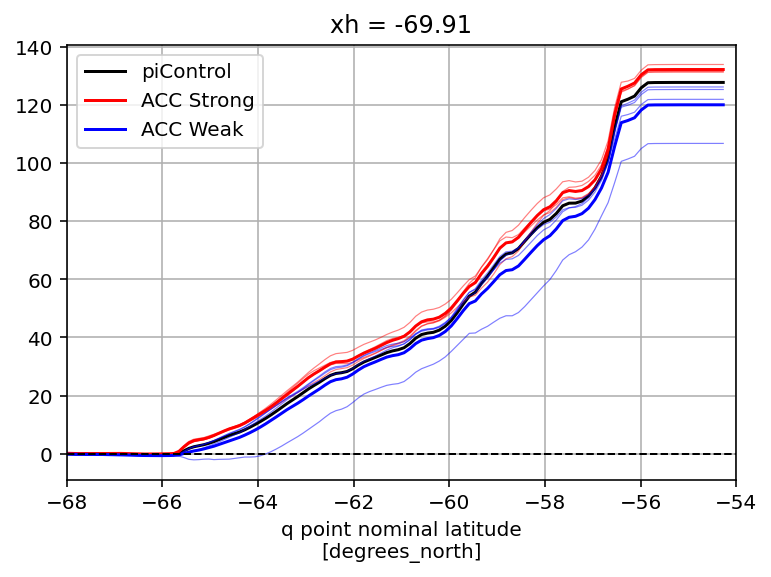

In [127]:
TWT_cmip6_rho_field_volume_trans_Sv_vert_sum.mean(dim='time').cumsum(dim='yq').plot(color='k',linewidth=1.5,label='piControl',xlim=(-68,-54))
ACC_max1_twt_rho.cumsum(dim='yq').plot(color='red',linewidth=0.60,alpha=0.5)
ACC_max2_twt_rho.cumsum(dim='yq').plot(color='red',linewidth=0.60,alpha=0.5)
ACC_max3_twt_rho.cumsum(dim='yq').plot(color='red',linewidth=0.60,alpha=0.5)
ACC_max4_twt_rho.cumsum(dim='yq').plot(color='red',linewidth=0.60,alpha=0.5)

ACC_min1_twt_rho.cumsum(dim='yq').plot(color='blue',linewidth=0.60,alpha=0.5)
ACC_min2_twt_rho.cumsum(dim='yq').plot(color='blue',linewidth=0.60,alpha=0.5)
ACC_min3_twt_rho.cumsum(dim='yq').plot(color='blue',linewidth=0.60,alpha=0.5)
ACC_min4_twt_rho.cumsum(dim='yq').plot(color='blue',linewidth=0.60,alpha=0.5)

ACC_max_twt_rho_ens.cumsum(dim='yq').plot(color='red',linewidth=1.5,label='ACC Strong')
ACC_min_twt_rho_ens.cumsum(dim='yq').plot(color='blue',linewidth=1.5,label='ACC Weak')

plt.axhline(y=0,linewidth=1,linestyle='--',color='k')
plt.legend()
plt.grid()

### Transport components as a function of depth

In [137]:
TWT_cmip6_rho_field_volume_trans = (TWT_cmip6_rho_field*thk_interp*dy)/10**6
TWT_cmip6_rho_field_volume_trans_Sv_y_sum = TWT_cmip6_rho_field_volume_trans.sum(dim=(['yq']))
TWT_cmip6_temp_field_volume_trans = (TWT_cmip6_temp_field*thk_interp*dy)/10**6
TWT_cmip6_temp_field_volume_trans_Sv_y_sum = TWT_cmip6_temp_field_volume_trans.sum(dim=(['yq']))
TWT_cmip6_salinity_field_volume_trans = (TWT_cmip6_salinity_field*thk_interp*dy)/10**6
TWT_cmip6_salinity_field_volume_trans_Sv_y_sum = TWT_cmip6_salinity_field_volume_trans.sum(dim=(['yq']))

In [145]:
### Thermal wind transport rho:
ACC_max1_twt_rho = TWT_cmip6_rho_field_volume_trans_Sv_y_sum.sel(time=slice('0231-01-16','0250-12-16')).mean(dim='time')
ACC_max2_twt_rho = TWT_cmip6_rho_field_volume_trans_Sv_y_sum.sel(time=slice('0341-01-16','0360-12-16')).mean(dim='time')
ACC_max3_twt_rho = TWT_cmip6_rho_field_volume_trans_Sv_y_sum.sel(time=slice('0447-01-16','0466-12-16')).mean(dim='time')
ACC_max4_twt_rho = TWT_cmip6_rho_field_volume_trans_Sv_y_sum.sel(time=slice('0546-01-16','0565-12-16')).mean(dim='time')

ACC_min1_twt_rho = TWT_cmip6_rho_field_volume_trans_Sv_y_sum.sel(time=slice('0291-01-16','0310-12-16')).mean(dim='time')
ACC_min2_twt_rho = TWT_cmip6_rho_field_volume_trans_Sv_y_sum.sel(time=slice('0405-01-16','0426-12-16')).mean(dim='time')
ACC_min3_twt_rho = TWT_cmip6_rho_field_volume_trans_Sv_y_sum.sel(time=slice('0499-01-16','0518-12-16')).mean(dim='time')
ACC_min4_twt_rho = TWT_cmip6_rho_field_volume_trans_Sv_y_sum.sel(time=slice('0605-01-16','0624-12-16')).mean(dim='time')

ACC_max_twt_rho_ens = xr.concat([ACC_max1_twt_rho,ACC_max2_twt_rho,ACC_max3_twt_rho,ACC_max4_twt_rho],dim='member').mean(dim='member')
ACC_min_twt_rho_ens = xr.concat([ACC_min1_twt_rho,ACC_min2_twt_rho,ACC_min3_twt_rho,ACC_min4_twt_rho],dim='member').mean(dim='member')

### Thermal wind transport temp:
ACC_piControl_ave_twt_temp = TWT_cmip6_temp_field_volume_trans_Sv_y_sum.mean(dim='time')*-1

ACC_max1_twt_temp = TWT_cmip6_temp_field_volume_trans_Sv_y_sum.sel(time=slice('0231-01-16','0250-12-16')).mean(dim='time')
ACC_max2_twt_temp = TWT_cmip6_temp_field_volume_trans_Sv_y_sum.sel(time=slice('0341-01-16','0360-12-16')).mean(dim='time')
ACC_max3_twt_temp = TWT_cmip6_temp_field_volume_trans_Sv_y_sum.sel(time=slice('0447-01-16','0466-12-16')).mean(dim='time')
ACC_max4_twt_temp = TWT_cmip6_temp_field_volume_trans_Sv_y_sum.sel(time=slice('0546-01-16','0565-12-16')).mean(dim='time')

ACC_min1_twt_temp = TWT_cmip6_temp_field_volume_trans_Sv_y_sum.sel(time=slice('0291-01-16','0310-12-16')).mean(dim='time')
ACC_min2_twt_temp = TWT_cmip6_temp_field_volume_trans_Sv_y_sum.sel(time=slice('0405-01-16','0426-12-16')).mean(dim='time')
ACC_min3_twt_temp = TWT_cmip6_temp_field_volume_trans_Sv_y_sum.sel(time=slice('0499-01-16','0518-12-16')).mean(dim='time')
ACC_min4_twt_temp = TWT_cmip6_temp_field_volume_trans_Sv_y_sum.sel(time=slice('0605-01-16','0624-12-16')).mean(dim='time')

ACC_max_twt_temp_ens = xr.concat([ACC_max1_twt_temp,ACC_max2_twt_temp,ACC_max3_twt_temp,ACC_max4_twt_temp],dim='member').mean(dim='member')
ACC_min_twt_temp_ens = xr.concat([ACC_min1_twt_temp,ACC_min2_twt_temp,ACC_min3_twt_temp,ACC_min4_twt_temp],dim='member').mean(dim='member')

### Thermal wind transport salt:
ACC_max1_twt_salt = TWT_cmip6_salinity_field_volume_trans_Sv_y_sum.sel(time=slice('0231-01-16','0250-12-16')).mean(dim='time')
ACC_max2_twt_salt = TWT_cmip6_salinity_field_volume_trans_Sv_y_sum.sel(time=slice('0341-01-16','0360-12-16')).mean(dim='time')
ACC_max3_twt_salt = TWT_cmip6_salinity_field_volume_trans_Sv_y_sum.sel(time=slice('0447-01-16','0466-12-16')).mean(dim='time')
ACC_max4_twt_salt = TWT_cmip6_salinity_field_volume_trans_Sv_y_sum.sel(time=slice('0546-01-16','0565-12-16')).mean(dim='time')

ACC_min1_twt_salt = TWT_cmip6_salinity_field_volume_trans_Sv_y_sum.sel(time=slice('0291-01-16','0310-12-16')).mean(dim='time')
ACC_min2_twt_salt = TWT_cmip6_salinity_field_volume_trans_Sv_y_sum.sel(time=slice('0405-01-16','0426-12-16')).mean(dim='time')
ACC_min3_twt_salt = TWT_cmip6_salinity_field_volume_trans_Sv_y_sum.sel(time=slice('0499-01-16','0518-12-16')).mean(dim='time')
ACC_min4_twt_salt = TWT_cmip6_salinity_field_volume_trans_Sv_y_sum.sel(time=slice('0605-01-16','0624-12-16')).mean(dim='time')

ACC_max_twt_salt_ens = xr.concat([ACC_max1_twt_salt,ACC_max2_twt_salt,ACC_max3_twt_salt,ACC_max4_twt_salt],dim='member').mean(dim='member')
ACC_min_twt_salt_ens = xr.concat([ACC_min1_twt_salt,ACC_min2_twt_salt,ACC_min3_twt_salt,ACC_min4_twt_salt],dim='member').mean(dim='member')


### bottom velocity transport
#ACC_piControl_ave_bvt = BottomVelTransport_cmip6[2].mean(dim='time')/10**6

#ACC_max1_bvt = BottomVelTransport_cmip6[2].sel(time=slice('0231-01-16','0250-12-16')).mean(dim='time')/10**6
#ACC_max2_bvt = BottomVelTransport_cmip6[2].sel(time=slice('0341-01-16','0360-12-16')).mean(dim='time')/10**6
#ACC_max3_bvt = BottomVelTransport_cmip6[2].sel(time=slice('0447-01-16','0466-12-16')).mean(dim='time')/10**6
#ACC_max4_bvt = BottomVelTransport_cmip6[2].sel(time=slice('0546-01-16','0565-12-16')).mean(dim='time')/10**6

#ACC_min1_bvt = BottomVelTransport_cmip6[2].sel(time=slice('0291-01-16','0310-12-16')).mean(dim='time')/10**6
#ACC_min2_bvt = BottomVelTransport_cmip6[2].sel(time=slice('0405-01-16','0426-12-16')).mean(dim='time')/10**6
#ACC_min3_bvt = BottomVelTransport_cmip6[2].sel(time=slice('0499-01-16','0518-12-16')).mean(dim='time')/10**6
#ACC_min4_bvt = BottomVelTransport_cmip6[2].sel(time=slice('0605-01-16','0624-12-16')).mean(dim='time')/10**6

#ACC_max_bvt_ens = xr.concat([ACC_max1_bvt,ACC_max2_bvt,ACC_max3_bvt,ACC_max4_bvt],dim='member').mean(dim='member')
#ACC_min_bvt_ens = xr.concat([ACC_min1_bvt,ACC_min2_bvt,ACC_min3_bvt,ACC_min4_bvt],dim='member').mean(dim='member')



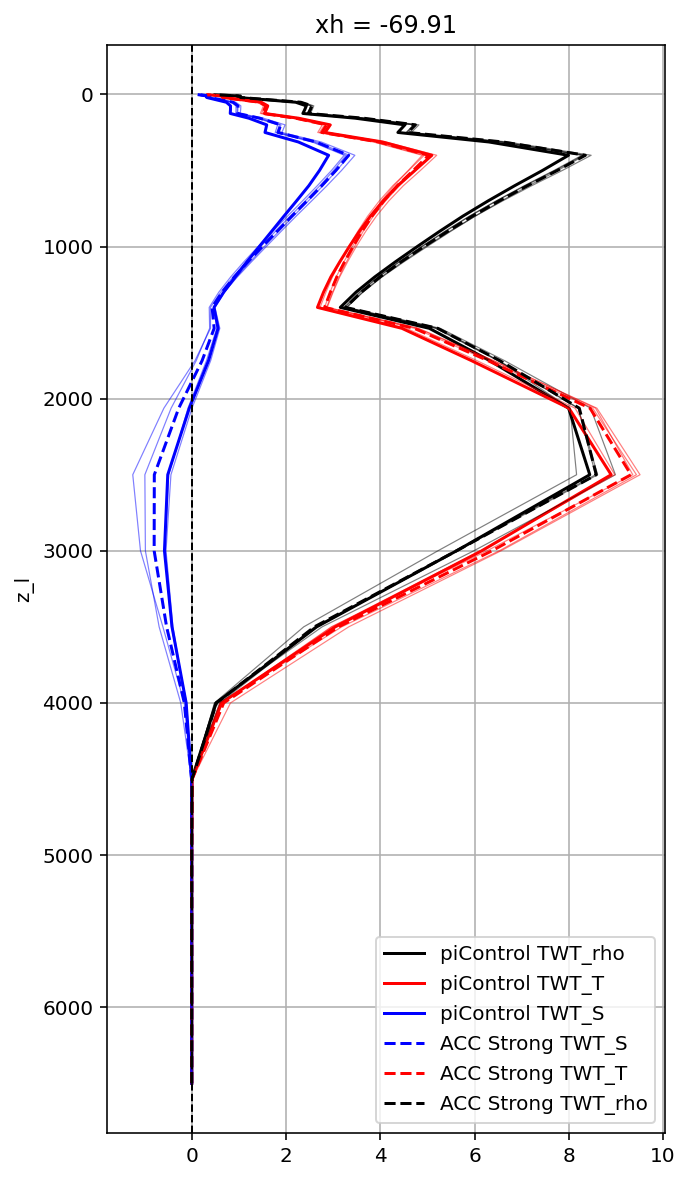

In [155]:
fig, plt.subplots(figsize=(5,10))

TWT_cmip6_rho_field_volume_trans_Sv_y_sum.mean(dim='time').plot(y='z_l',color='k',yincrease=False,linewidth=1.5,label='piControl TWT_rho')
TWT_cmip6_temp_field_volume_trans_Sv_y_sum.mean(dim='time').plot(y='z_l',color='red',yincrease=False,linewidth=1.5,label='piControl TWT_T')
TWT_cmip6_salinity_field_volume_trans_Sv_y_sum.mean(dim='time').plot(y='z_l',color='blue',yincrease=False,linewidth=1.5,label='piControl TWT_S')

ACC_max1_twt_rho.plot(y='z_l',color='k',yincrease=False,alpha=0.5,linewidth=0.6)
ACC_max2_twt_rho.plot(y='z_l',color='k',yincrease=False,alpha=0.5,linewidth=0.6)
ACC_max3_twt_rho.plot(y='z_l',color='k',yincrease=False,alpha=0.5,linewidth=0.6)
ACC_max4_twt_rho.plot(y='z_l',color='k',yincrease=False,alpha=0.5,linewidth=0.6)

ACC_max1_twt_temp.plot(y='z_l',color='red',yincrease=False,alpha=0.5,linewidth=0.6)
ACC_max2_twt_temp.plot(y='z_l',color='red',yincrease=False,alpha=0.5,linewidth=0.6)
ACC_max3_twt_temp.plot(y='z_l',color='red',yincrease=False,alpha=0.5,linewidth=0.6)
ACC_max4_twt_temp.plot(y='z_l',color='red',yincrease=False,alpha=0.5,linewidth=0.6)

ACC_max1_twt_salt.plot(y='z_l',color='blue',yincrease=False,alpha=0.5,linewidth=0.6)
ACC_max2_twt_salt.plot(y='z_l',color='blue',yincrease=False,alpha=0.5,linewidth=0.6)
ACC_max3_twt_salt.plot(y='z_l',color='blue',yincrease=False,alpha=0.5,linewidth=0.6)
ACC_max4_twt_salt.plot(y='z_l',color='blue',yincrease=False,alpha=0.5,linewidth=0.6)

ACC_max_twt_salt_ens.plot(y='z_l',color='blue',yincrease=False,linewidth=1.5,linestyle='--',label='ACC Strong TWT_S')
ACC_max_twt_temp_ens.plot(y='z_l',color='red',yincrease=False,linewidth=1.5,linestyle='--',label='ACC Strong TWT_T')
ACC_max_twt_rho_ens.plot(y='z_l',color='black',yincrease=False,linewidth=1.5,linestyle='--',label='ACC Strong TWT_rho')

plt.axvline(x=0,linewidth=1,linestyle='--',color='k')
plt.legend()
plt.grid()

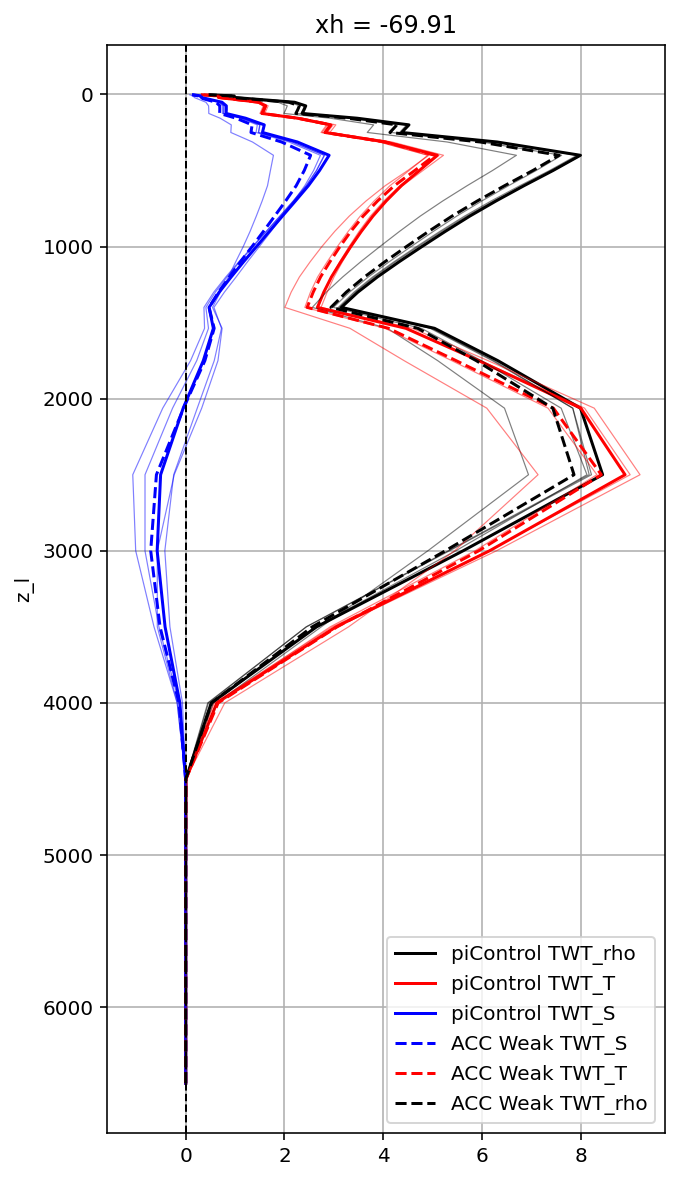

In [158]:
fig, plt.subplots(figsize=(5,10))

TWT_cmip6_rho_field_volume_trans_Sv_y_sum.mean(dim='time').plot(y='z_l',color='k',yincrease=False,linewidth=1.5,label='piControl TWT_rho')
TWT_cmip6_temp_field_volume_trans_Sv_y_sum.mean(dim='time').plot(y='z_l',color='red',yincrease=False,linewidth=1.5,label='piControl TWT_T')
TWT_cmip6_salinity_field_volume_trans_Sv_y_sum.mean(dim='time').plot(y='z_l',color='blue',yincrease=False,linewidth=1.5,label='piControl TWT_S')

ACC_min1_twt_rho.plot(y='z_l',color='k',yincrease=False,alpha=0.5,linewidth=0.6)
ACC_min2_twt_rho.plot(y='z_l',color='k',yincrease=False,alpha=0.5,linewidth=0.6)
ACC_min3_twt_rho.plot(y='z_l',color='k',yincrease=False,alpha=0.5,linewidth=0.6)
ACC_min4_twt_rho.plot(y='z_l',color='k',yincrease=False,alpha=0.5,linewidth=0.6)

ACC_min1_twt_temp.plot(y='z_l',color='red',yincrease=False,alpha=0.5,linewidth=0.6)
ACC_min2_twt_temp.plot(y='z_l',color='red',yincrease=False,alpha=0.5,linewidth=0.6)
ACC_min3_twt_temp.plot(y='z_l',color='red',yincrease=False,alpha=0.5,linewidth=0.6)
ACC_min4_twt_temp.plot(y='z_l',color='red',yincrease=False,alpha=0.5,linewidth=0.6)

ACC_min1_twt_salt.plot(y='z_l',color='blue',yincrease=False,alpha=0.5,linewidth=0.6)
ACC_min2_twt_salt.plot(y='z_l',color='blue',yincrease=False,alpha=0.5,linewidth=0.6)
ACC_min3_twt_salt.plot(y='z_l',color='blue',yincrease=False,alpha=0.5,linewidth=0.6)
ACC_min4_twt_salt.plot(y='z_l',color='blue',yincrease=False,alpha=0.5,linewidth=0.6)

ACC_min_twt_salt_ens.plot(y='z_l',color='blue',yincrease=False,linewidth=1.5,linestyle='--',label='ACC Weak TWT_S')
ACC_min_twt_temp_ens.plot(y='z_l',color='red',yincrease=False,linewidth=1.5,linestyle='--',label='ACC Weak TWT_T')
ACC_min_twt_rho_ens.plot(y='z_l',color='black',yincrease=False,linewidth=1.5,linestyle='--',label='ACC Weak TWT_rho')

plt.axvline(x=0,linewidth=1,linestyle='--',color='k')
plt.legend()
plt.grid()

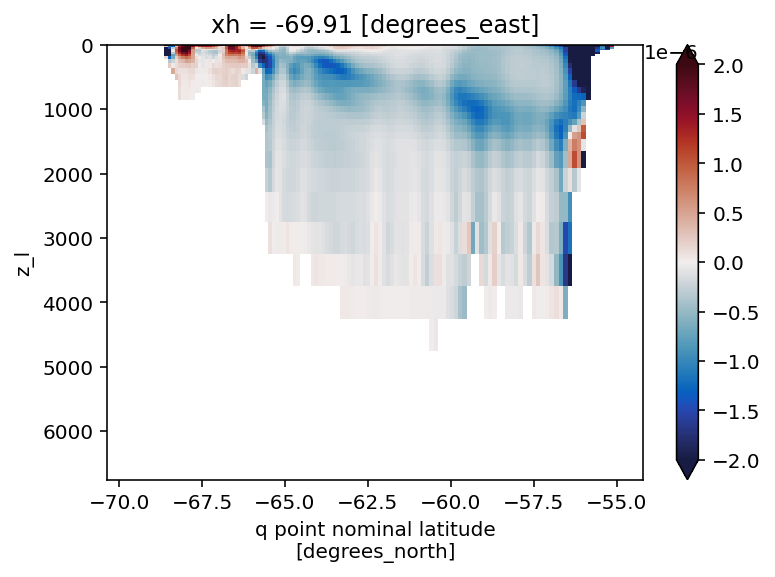

In [221]:
dS_dy_beta_rho = TWT_cmip6_salinity[4]*1035
dT_dy_alpha_rho = TWT_cmip6_temp[4]*1035*-1
drho_dy = TWT_cmip6[4]

## Interpolate T, S, and in-situ density to yq location for plotting over the gradient fields:
T_interp = grid_sliced_p25.interp(cmip6_cm4.thetao,'Y',boundary='fill').squeeze()
S_interp = grid_sliced_p25.interp(cmip6_cm4.so,'Y',boundary='fill').squeeze()
rho_insitu_interp = grid_sliced_p25.interp(rho_cmip6_cm4,'Y',boundary='fill').squeeze()

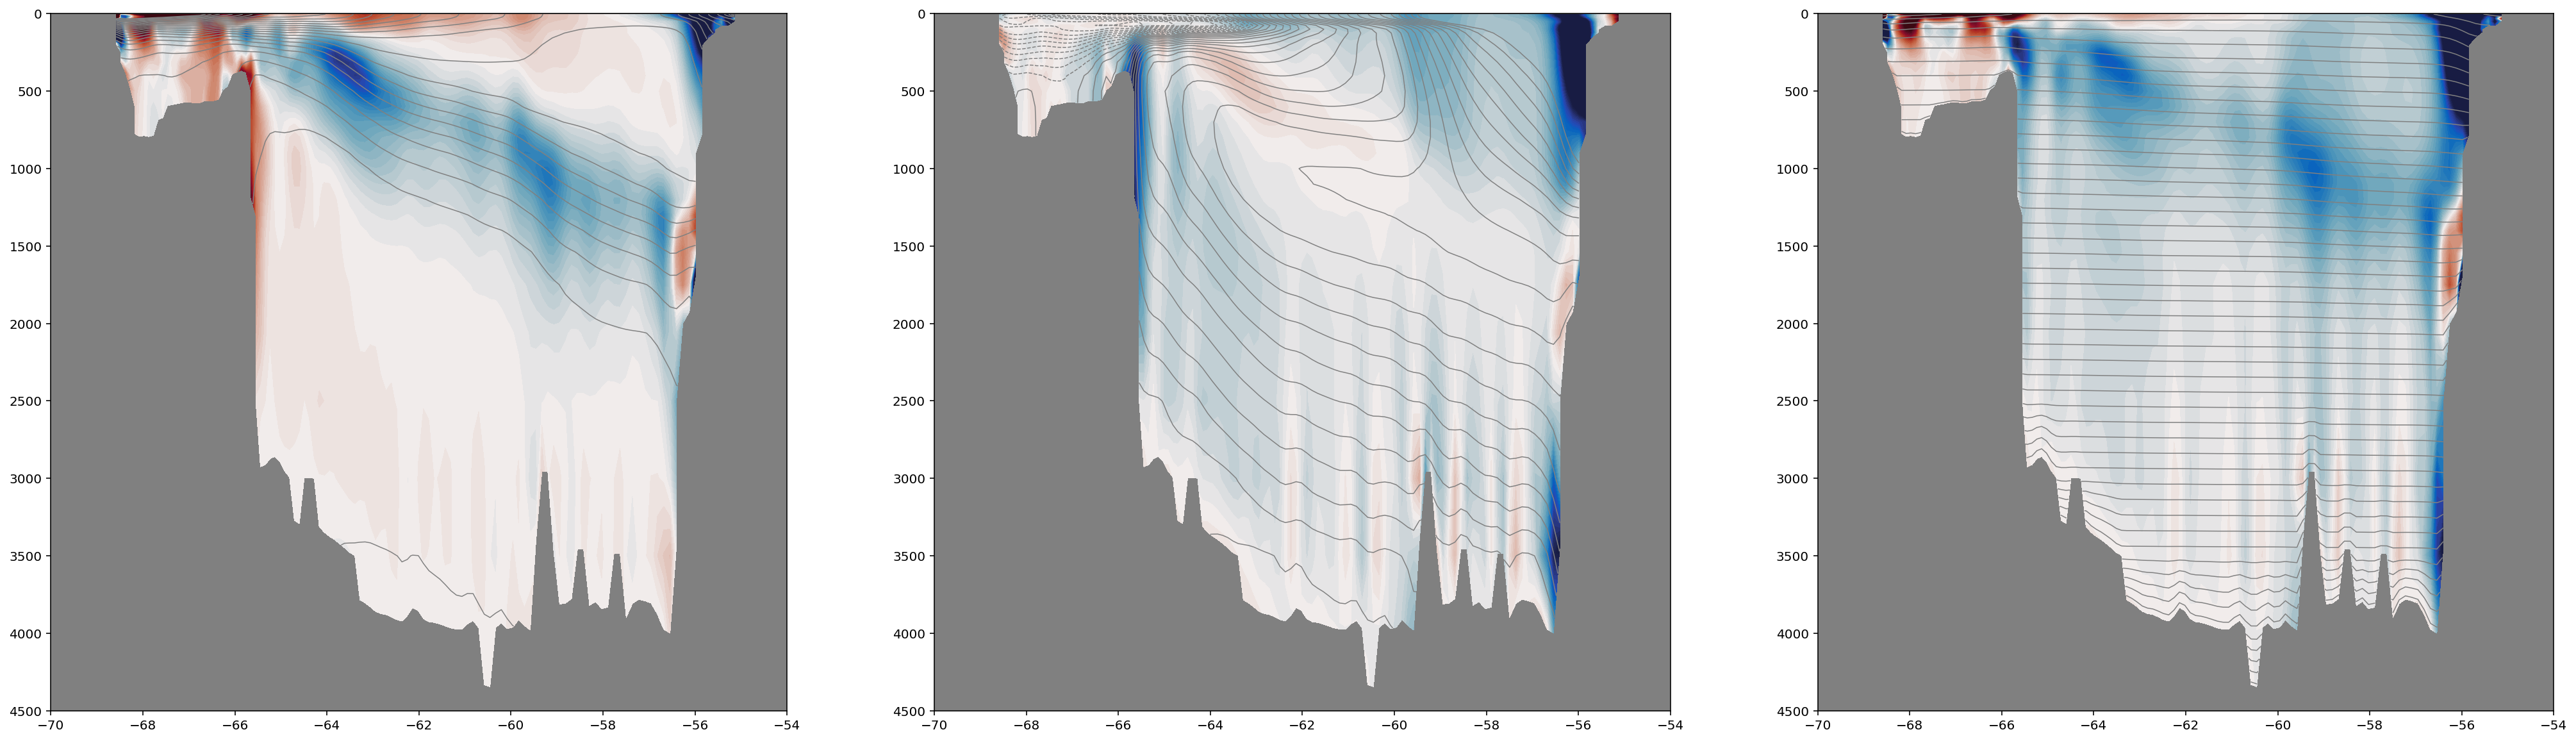

In [222]:
from matplotlib import gridspec
from matplotlib import colorbar

fig, ax = plt.subplots(1,3,figsize=(35,10))
gs = gridspec.GridSpec(1,3)
ax1, ax2, ax3 = plt.subplot(gs[0,0],facecolor='grey'),\
                plt.subplot(gs[0,1],facecolor='grey'),\
                plt.subplot(gs[0,2],facecolor='grey')

custom_ylim = (4500,0)
custom_xlim = (-70,-54)
plt.setp(ax1, ylim=custom_ylim, xlim=custom_xlim)
plt.setp(ax2, ylim=custom_ylim, xlim=custom_xlim)
plt.setp(ax3, ylim=custom_ylim, xlim=custom_xlim)

levels_dS_dy_beta_rho = np.linspace(-2e-6,2e-6,60)
levels_S = np.linspace(33.20,34.75,25)

levels_dT_dy_alpha_rho = np.linspace(-2e-6,2e-6,60)
levels_T = np.linspace(-3.5,3.5,50)

levels_rho = np.linspace(1026,1048,50)

ax1.contourf(lat_Drake_cm4,
             zl_Drake_cm4,
             dS_dy_beta_rho.mean(dim='time').squeeze(),
             levels=levels_dS_dy_beta_rho,
             cmap=cmocean.cm.balance,
             extend='both',
             )

ax1.contour(lat_Drake_cm4,
             zl_Drake_cm4,
             S_interp.mean(dim='time'),
             levels=levels_S,
             colors='grey',
             linewidths=0.75)


ax2.contourf(lat_Drake_cm4,
             zl_Drake_cm4,
             dT_dy_alpha_rho.mean(dim='time').squeeze(),
             levels=levels_dT_dy_alpha_rho,
             cmap=cmocean.cm.balance,
             extend='both',
             )

ax2.contour(lat_Drake_cm4,
             zl_Drake_cm4,
             T_interp.mean(dim='time'),
             levels=levels_T,
             colors='grey',
             linewidths=0.75)

ax3.contourf(lat_Drake_cm4,
             zl_Drake_cm4,
             drho_dy.mean(dim='time').squeeze(),
             levels=levels_dT_dy_alpha_rho,
             cmap=cmocean.cm.balance,
             extend='both',
             )

ax3.contour(lat_Drake_cm4,
             zl_Drake_cm4,
             rho_insitu_interp.mean(dim='time'),
             levels=levels_rho,
             colors='grey',
             linewidths=0.75)

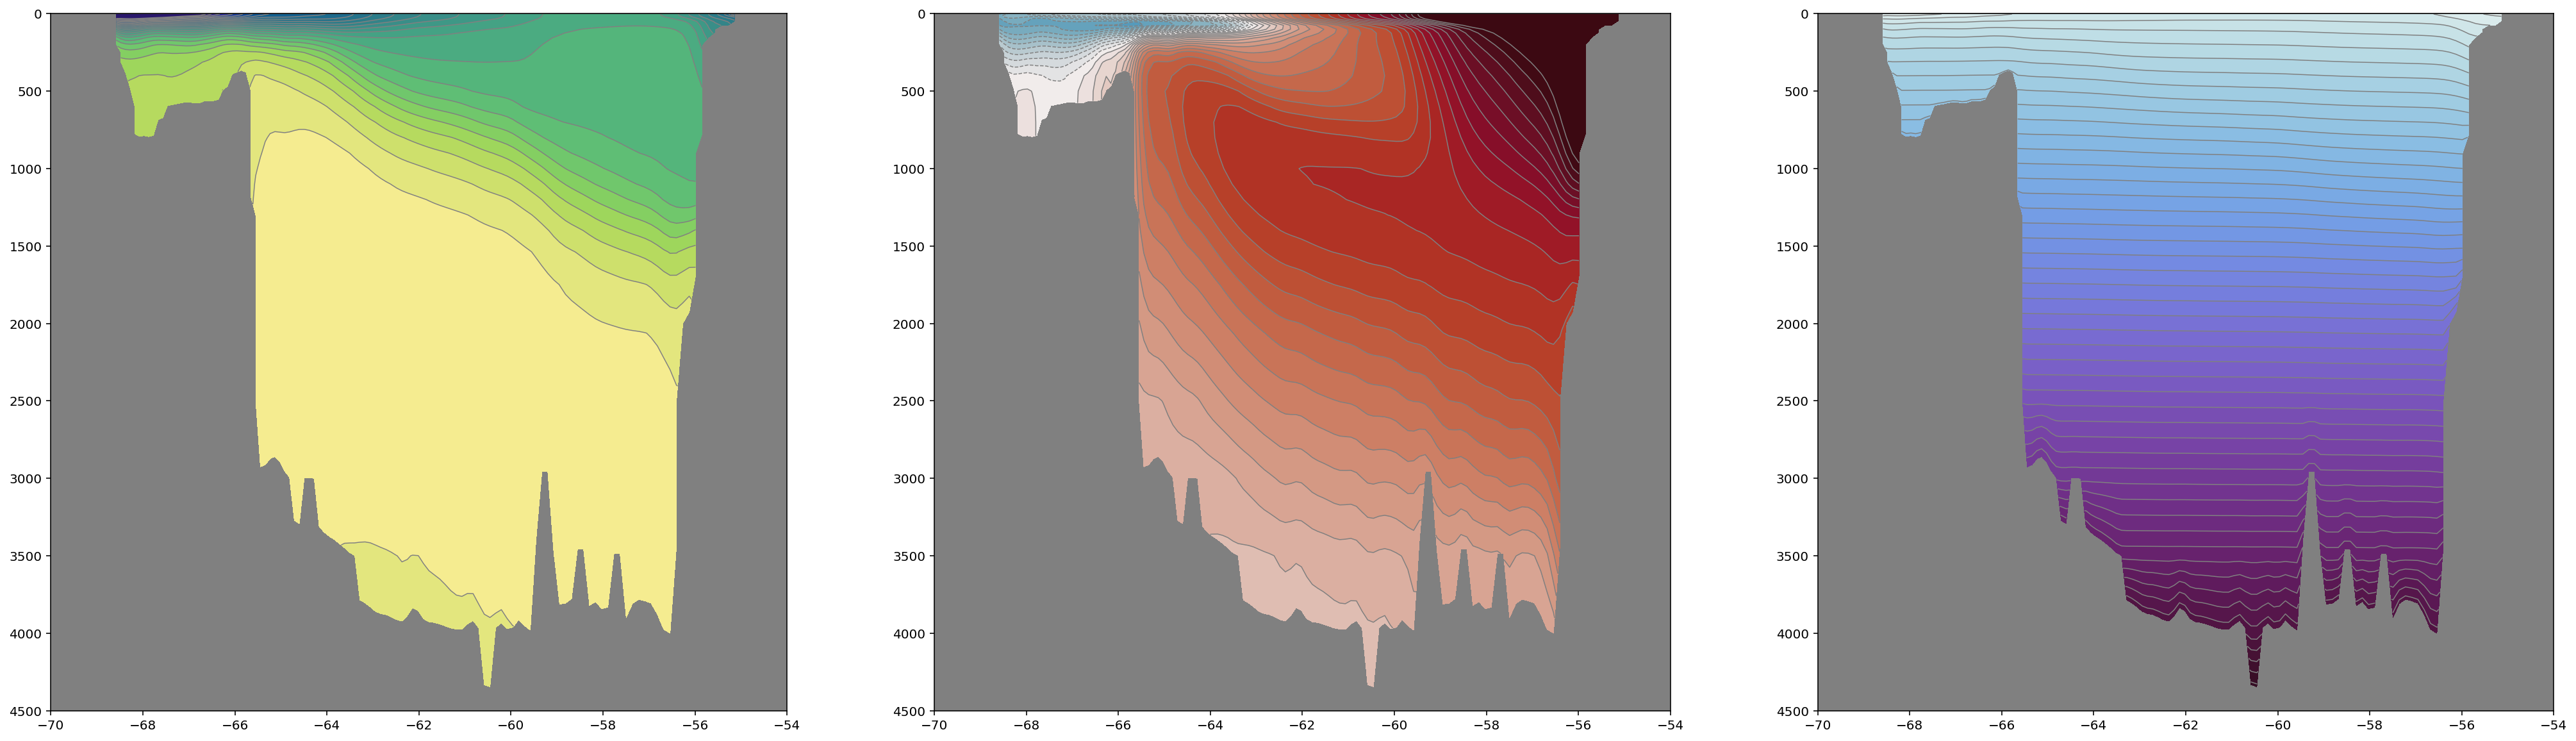

In [223]:
from matplotlib import gridspec
from matplotlib import colorbar

fig, ax = plt.subplots(1,3,figsize=(35,10))
gs = gridspec.GridSpec(1,3)
ax1, ax2, ax3 = plt.subplot(gs[0,0],facecolor='grey'),\
                plt.subplot(gs[0,1],facecolor='grey'),\
                plt.subplot(gs[0,2],facecolor='grey')

custom_ylim = (4500,0)
custom_xlim = (-70,-54)
plt.setp(ax1, ylim=custom_ylim, xlim=custom_xlim)
plt.setp(ax2, ylim=custom_ylim, xlim=custom_xlim)
plt.setp(ax3, ylim=custom_ylim, xlim=custom_xlim)

levels_dS_dy_beta_rho = np.linspace(-2e-6,2e-6,60)
levels_S = np.linspace(33.20,34.75,25)

levels_dT_dy_alpha_rho = np.linspace(-2e-6,2e-6,60)
levels_T = np.linspace(-3.5,3.5,50)

levels_rho = np.linspace(1026,1048,50)

ax1.contourf(lat_Drake_cm4,
             zl_Drake_cm4,
             S_interp.mean(dim='time'),
             levels=levels_S,
             cmap=cmocean.cm.haline,
             extend='both',
             )

ax1.contour(lat_Drake_cm4,
             zl_Drake_cm4,
             S_interp.mean(dim='time'),
             levels=levels_S,
             colors='grey',
             linewidths=0.75)


ax2.contourf(lat_Drake_cm4,
             zl_Drake_cm4,
             T_interp.mean(dim='time'),
             levels=levels_T,
             cmap=cmocean.cm.balance,
             extend='both',
             )

ax2.contour(lat_Drake_cm4,
             zl_Drake_cm4,
             T_interp.mean(dim='time'),
             levels=levels_T,
             colors='grey',
             linewidths=0.75)

ax3.contourf(lat_Drake_cm4,
             zl_Drake_cm4,
             rho_insitu_interp.mean(dim='time'),
             levels=levels_rho,
             cmap=cmocean.cm.dense,
             extend='both',
             )

ax3.contour(lat_Drake_cm4,
             zl_Drake_cm4,
             rho_insitu_interp.mean(dim='time'),
             levels=levels_rho,
             colors='grey',
             linewidths=0.75)

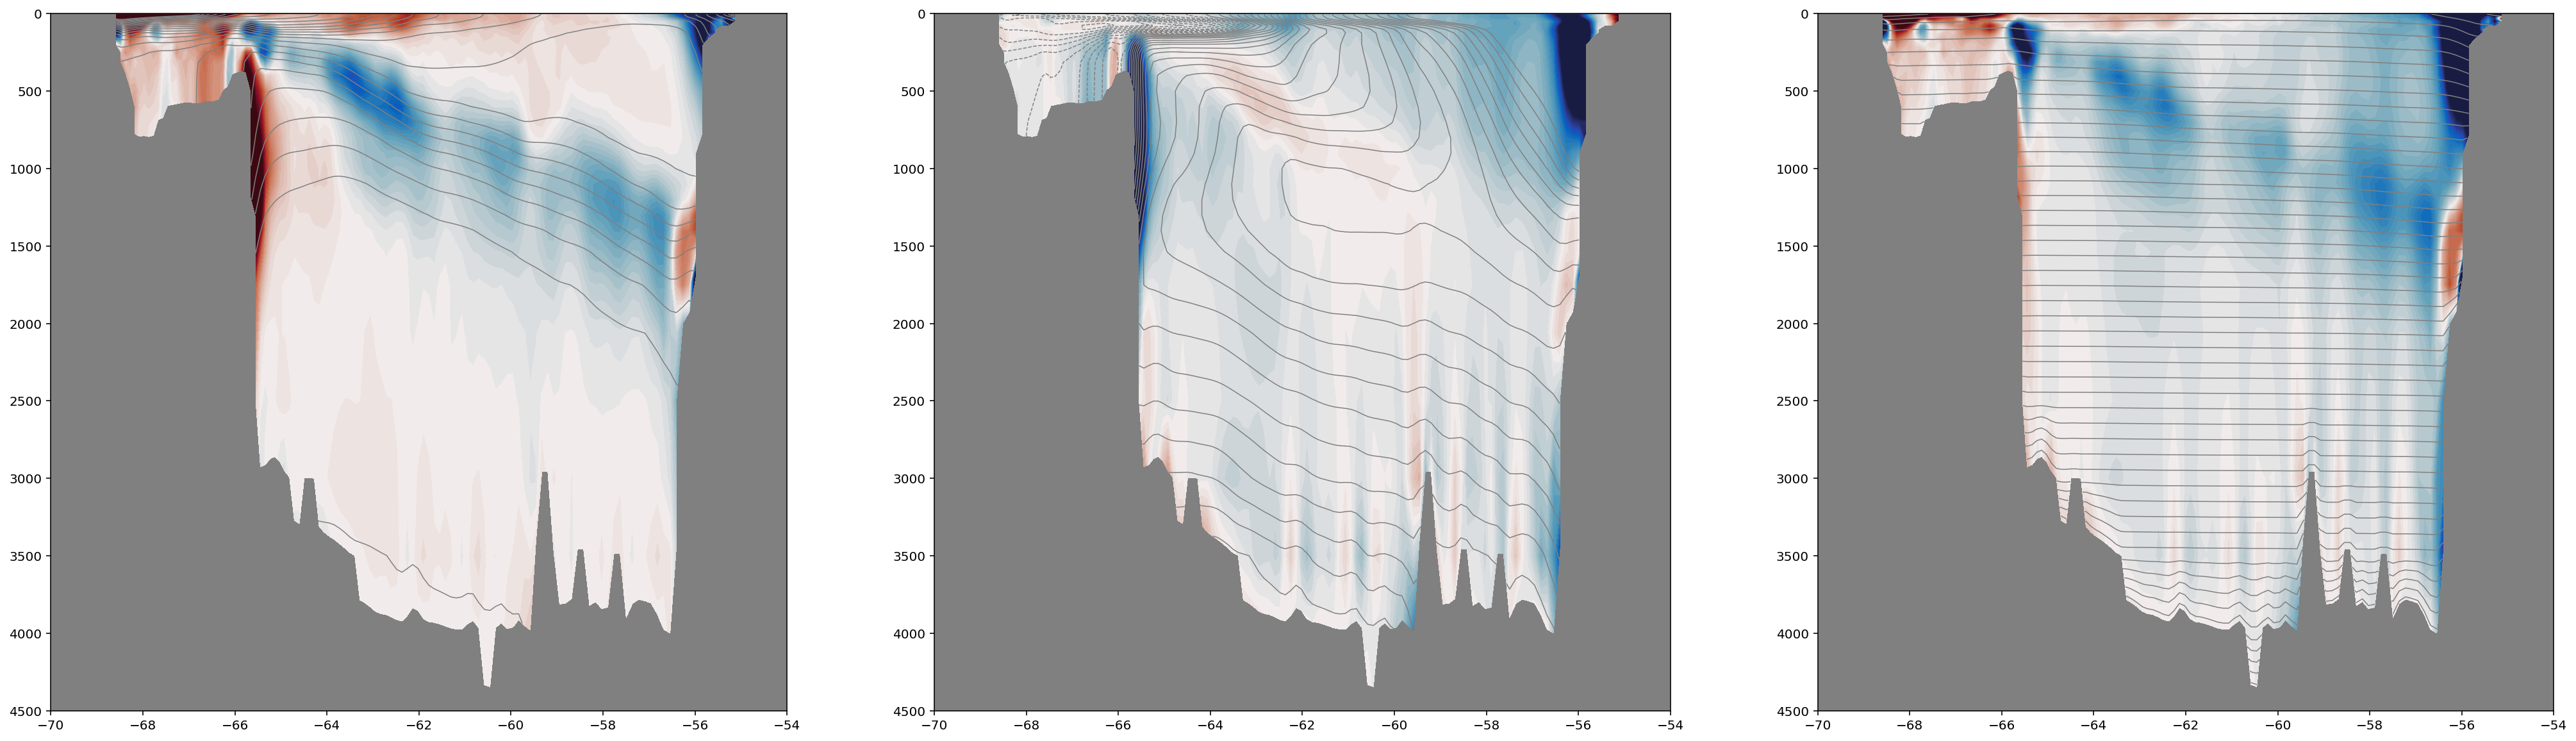

In [264]:
from matplotlib import gridspec
from matplotlib import colorbar

fig, ax = plt.subplots(1,3,figsize=(35,10))
gs = gridspec.GridSpec(1,3)
ax1, ax2, ax3 = plt.subplot(gs[0,0],facecolor='grey'),\
                plt.subplot(gs[0,1],facecolor='grey'),\
                plt.subplot(gs[0,2],facecolor='grey')

custom_ylim = (4500,0)
custom_xlim = (-70,-54)
plt.setp(ax1, ylim=custom_ylim, xlim=custom_xlim)
plt.setp(ax2, ylim=custom_ylim, xlim=custom_xlim)
plt.setp(ax3, ylim=custom_ylim, xlim=custom_xlim)

levels_dS_dy_beta_rho = np.linspace(-2e-6,2e-6,60)
levels_S = np.linspace(33.20,34.75,25)

levels_dT_dy_alpha_rho = np.linspace(-2e-6,2e-6,60)
levels_T = np.linspace(-3.5,3.5,50)

levels_rho = np.linspace(1026,1048,50)

ax1.contourf(lat_Drake_cm4,
             zl_Drake_cm4,
             dS_dy_beta_rho.sel(time=slice('0605-01-16','0624-12-16')).mean(dim='time').squeeze(),
             levels=levels_dS_dy_beta_rho,
             cmap=cmocean.cm.balance,
             extend='both',
             )

ax1.contour(lat_Drake_cm4,
             zl_Drake_cm4,
             S_interp.sel(time=slice('0605-01-16','0624-12-16')).mean(dim='time'),
             levels=levels_S,
             colors='grey',
             linewidths=0.75)


ax2.contourf(lat_Drake_cm4,
             zl_Drake_cm4,
             dT_dy_alpha_rho.sel(time=slice('0605-01-16','0624-12-16')).mean(dim='time').squeeze(),
             levels=levels_dT_dy_alpha_rho,
             cmap=cmocean.cm.balance,
             extend='both',
             )

ax2.contour(lat_Drake_cm4,
             zl_Drake_cm4,
             T_interp.sel(time=slice('0605-01-16','0624-12-16')).mean(dim='time'),
             levels=levels_T,
             colors='grey',
             linewidths=0.75)

ax3.contourf(lat_Drake_cm4,
             zl_Drake_cm4,
             drho_dy.sel(time=slice('0605-01-16','0624-12-16')).mean(dim='time').squeeze(),
             levels=levels_dT_dy_alpha_rho,
             cmap=cmocean.cm.balance,
             extend='both',
             )

ax3.contour(lat_Drake_cm4,
             zl_Drake_cm4,
             rho_insitu_interp.sel(time=slice('0605-01-16','0624-12-16')).mean(dim='time'),
             levels=levels_rho,
             colors='grey',
             linewidths=0.75)

In [260]:
ACC_max1_twt_rho = TWT_cmip6_rho_field_volume_trans_Sv_y_sum.sel(time=slice('0231-01-16','0250-12-16')).mean(dim='time')
ACC_max2_twt_rho = TWT_cmip6_rho_field_volume_trans_Sv_y_sum.sel(time=slice('0341-01-16','0360-12-16')).mean(dim='time')
ACC_max3_twt_rho = TWT_cmip6_rho_field_volume_trans_Sv_y_sum.sel(time=slice('0447-01-16','0466-12-16')).mean(dim='time')
ACC_max4_twt_rho = TWT_cmip6_rho_field_volume_trans_Sv_y_sum.sel(time=slice('0546-01-16','0565-12-16')).mean(dim='time')

ACC_min1_twt_rho = TWT_cmip6_rho_field_volume_trans_Sv_y_sum.sel(time=slice('0291-01-16','0310-12-16')).mean(dim='time')
ACC_min2_twt_rho = TWT_cmip6_rho_field_volume_trans_Sv_y_sum.sel(time=slice('0405-01-16','0426-12-16')).mean(dim='time')
ACC_min3_twt_rho = TWT_cmip6_rho_field_volume_trans_Sv_y_sum.sel(time=slice('0499-01-16','0518-12-16')).mean(dim='time')
ACC_min4_twt_rho = TWT_cmip6_rho_field_volume_trans_Sv_y_sum.sel(time=slice('0605-01-16','0624-12-16')).mean(dim='time')

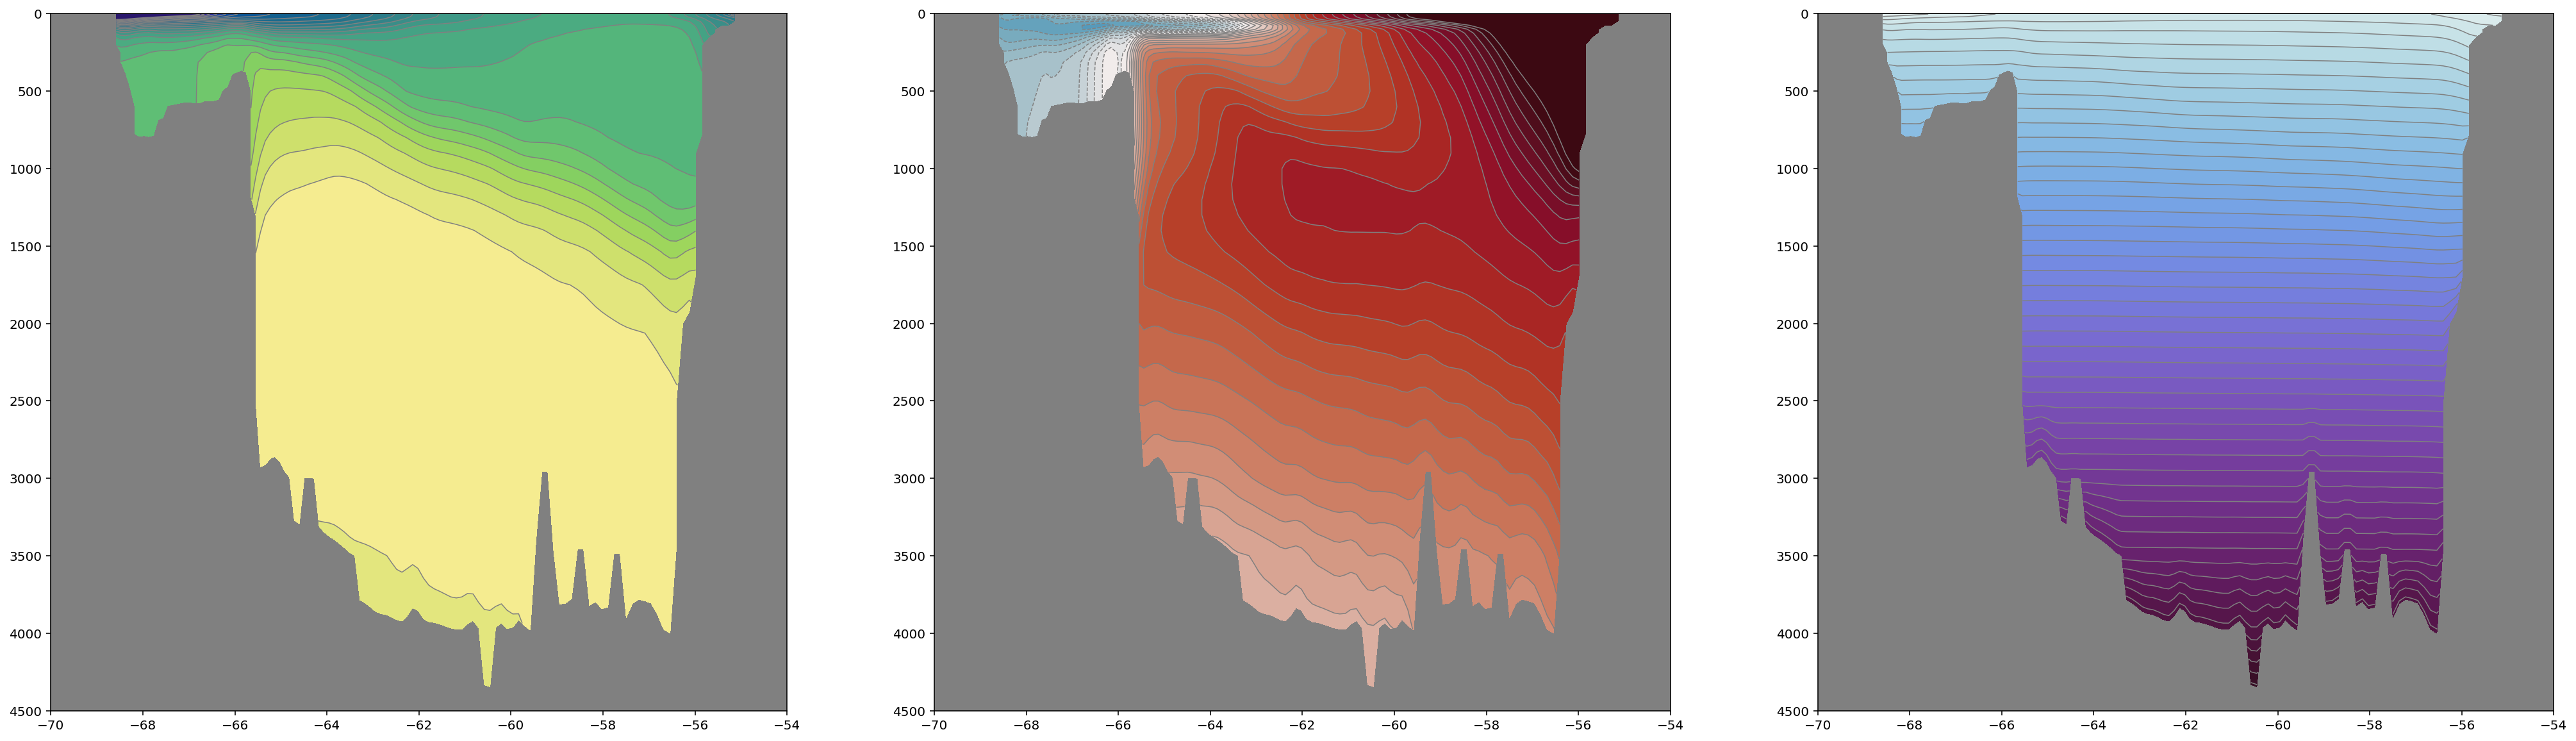

In [236]:
fig, ax = plt.subplots(1,3,figsize=(35,10))
gs = gridspec.GridSpec(1,3)
ax1, ax2, ax3 = plt.subplot(gs[0,0],facecolor='grey'),\
                plt.subplot(gs[0,1],facecolor='grey'),\
                plt.subplot(gs[0,2],facecolor='grey')

custom_ylim = (4500,0)
custom_xlim = (-70,-54)
plt.setp(ax1, ylim=custom_ylim, xlim=custom_xlim)
plt.setp(ax2, ylim=custom_ylim, xlim=custom_xlim)
plt.setp(ax3, ylim=custom_ylim, xlim=custom_xlim)

levels_dS_dy_beta_rho = np.linspace(-2e-6,2e-6,60)
levels_S = np.linspace(33.20,34.75,25)

levels_dT_dy_alpha_rho = np.linspace(-2e-6,2e-6,60)
levels_T = np.linspace(-3.5,3.5,50)

levels_rho = np.linspace(1026,1048,50)

ax1.contourf(lat_Drake_cm4,
             zl_Drake_cm4,
             S_interp.sel(time=slice('0605-01-16','0624-12-16')).mean(dim='time'),
             levels=levels_S,
             cmap=cmocean.cm.haline,
             extend='both',
             )

ax1.contour(lat_Drake_cm4,
             zl_Drake_cm4,
             S_interp.sel(time=slice('0605-01-16','0624-12-16')).mean(dim='time'),
             levels=levels_S,
             colors='grey',
             linewidths=0.75)


ax2.contourf(lat_Drake_cm4,
             zl_Drake_cm4,
             T_interp.sel(time=slice('0605-01-16','0624-12-16')).mean(dim='time'),
             levels=levels_T,
             cmap=cmocean.cm.balance,
             extend='both',
             )

ax2.contour(lat_Drake_cm4,
             zl_Drake_cm4,
             T_interp.sel(time=slice('0605-01-16','0624-12-16')).mean(dim='time'),
             levels=levels_T,
             colors='grey',
             linewidths=0.75)

ax3.contourf(lat_Drake_cm4,
             zl_Drake_cm4,
             rho_insitu_interp.sel(time=slice('0605-01-16','0624-12-16')).mean(dim='time'),
             levels=levels_rho,
             cmap=cmocean.cm.dense,
             extend='both',
             )

ax3.contour(lat_Drake_cm4,
             zl_Drake_cm4,
             rho_insitu_interp.sel(time=slice('0605-01-16','0624-12-16')).mean(dim='time'),
             levels=levels_rho,
             colors='grey',
             linewidths=0.75)

In [249]:
## Max periods
diff_max_1_S = S_interp.sel(time=slice('0231-01-16','0250-12-16')).mean(dim='time') - S_interp.mean(dim='time')
diff_max_1_T = T_interp.sel(time=slice('0231-01-16','0250-12-16')).mean(dim='time') - T_interp.mean(dim='time')
diff_max_1_rho = rho_insitu_interp.sel(time=slice('0231-01-16','0250-12-16')).mean(dim='time') - rho_insitu_interp.mean(dim='time')

diff_max_2_S = S_interp.sel(time=slice('0341-01-16','0360-12-16')).mean(dim='time') - S_interp.mean(dim='time')
diff_max_2_T = T_interp.sel(time=slice('0341-01-16','0360-12-16')).mean(dim='time') - T_interp.mean(dim='time')
diff_max_2_rho = rho_insitu_interp.sel(time=slice('0341-01-16','0360-12-16')).mean(dim='time') - rho_insitu_interp.mean(dim='time')

diff_max_3_S = S_interp.sel(time=slice('0447-01-16','0466-12-16')).mean(dim='time') - S_interp.mean(dim='time')
diff_max_3_T = T_interp.sel(time=slice('0447-01-16','0466-12-16')).mean(dim='time') - T_interp.mean(dim='time')
diff_max_3_rho = rho_insitu_interp.sel(time=slice('0447-01-16','0466-12-16')).mean(dim='time') - rho_insitu_interp.mean(dim='time')

diff_max_4_S = S_interp.sel(time=slice('0546-01-16','0565-12-16')).mean(dim='time') - S_interp.mean(dim='time')
diff_max_4_T = T_interp.sel(time=slice('0546-01-16','0565-12-16')).mean(dim='time') - T_interp.mean(dim='time')
diff_max_4_rho = rho_insitu_interp.sel(time=slice('0546-01-16','0565-12-16')).mean(dim='time') - rho_insitu_interp.mean(dim='time')
                                                                                                                        
                                                                                                                        
## Min periods                                                                                                                        
diff_min_1_S = S_interp.sel(time=slice('0291-01-16','0310-12-16')).mean(dim='time') - S_interp.mean(dim='time')
diff_min_1_T = T_interp.sel(time=slice('0291-01-16','0310-12-16')).mean(dim='time') - T_interp.mean(dim='time')
diff_min_1_rho = rho_insitu_interp.sel(time=slice('0291-01-16','0310-12-16')).mean(dim='time') - rho_insitu_interp.mean(dim='time')

diff_min_2_S = S_interp.sel(time=slice('0405-01-16','0426-12-16')).mean(dim='time') - S_interp.mean(dim='time')
diff_min_2_T = T_interp.sel(time=slice('0405-01-16','0426-12-16')).mean(dim='time') - T_interp.mean(dim='time')
diff_min_2_rho = rho_insitu_interp.sel(time=slice('0405-01-16','0426-12-16')).mean(dim='time') - rho_insitu_interp.mean(dim='time')

diff_min_3_S = S_interp.sel(time=slice('0499-01-16','0518-12-16')).mean(dim='time') - S_interp.mean(dim='time')
diff_min_3_T = T_interp.sel(time=slice('0499-01-16','0518-12-16')).mean(dim='time') - T_interp.mean(dim='time')
diff_min_3_rho = rho_insitu_interp.sel(time=slice('0499-01-16','0518-12-16')).mean(dim='time') - rho_insitu_interp.mean(dim='time')

diff_min_4_S = S_interp.sel(time=slice('0605-01-16','0624-12-16')).mean(dim='time') - S_interp.mean(dim='time')
diff_min_4_T = T_interp.sel(time=slice('0605-01-16','0624-12-16')).mean(dim='time') - T_interp.mean(dim='time')
diff_min_4_rho = rho_insitu_interp.sel(time=slice('0605-01-16','0624-12-16')).mean(dim='time') - rho_insitu_interp.mean(dim='time')

## Define composite periods
#### ACC_max1 = (time=slice('0231-01-16','0250-12-16')).mean(dim='time')
#### ACC_max2 = (time=slice('0341-01-16','0360-12-16')).mean(dim='time')
#### ACC_max3 = (time=slice('0447-01-16','0466-12-16')).mean(dim='time')
#### ACC_max4 = (time=slice('0546-01-16','0565-12-16')).mean(dim='time')

#### ACC_min1 = (time=slice('0291-01-16','0310-12-16')).mean(dim='time')
#### ACC_min2 = (time=slice('0405-01-16','0426-12-16')).mean(dim='time')
#### ACC_min3 = (time=slice('0499-01-16','0518-12-16')).mean(dim='time')
#### ACC_min4 = (time=slice('0605-01-16','0624-12-16')).mean(dim='time')

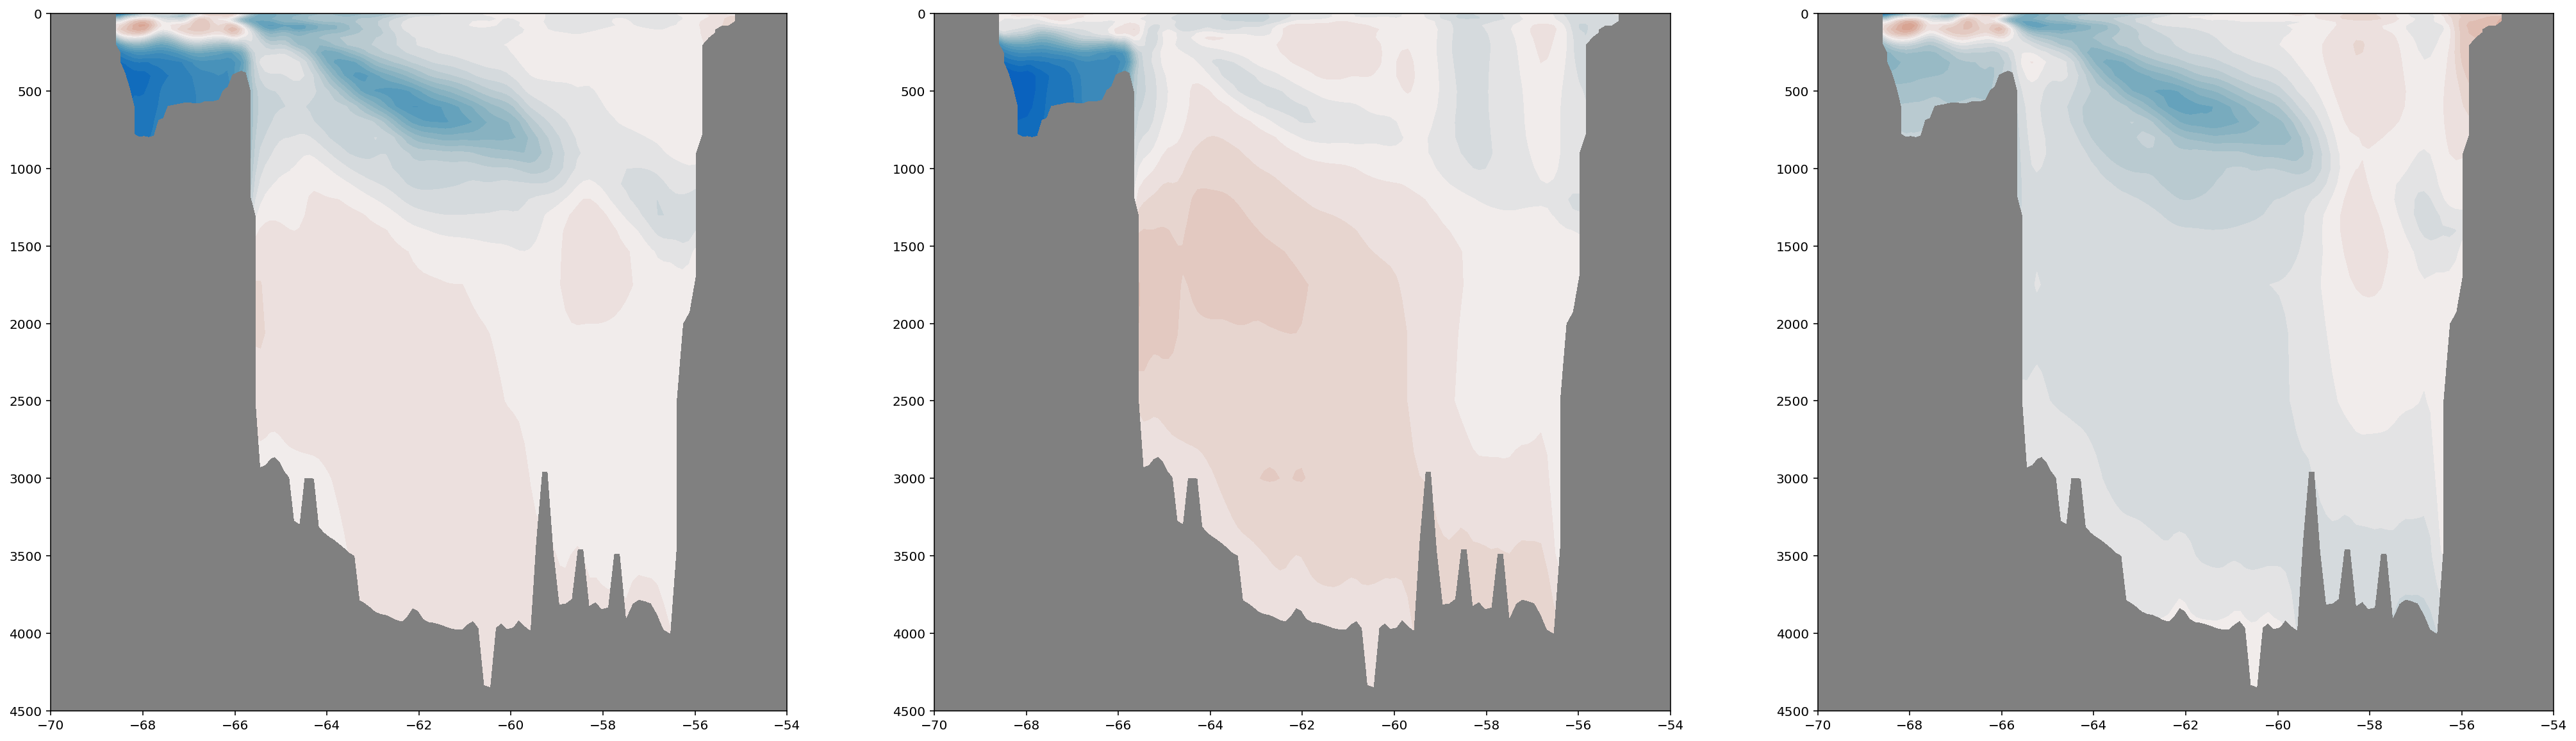

In [253]:
fig, ax = plt.subplots(1,3,figsize=(35,10))
gs = gridspec.GridSpec(1,3)
ax1, ax2, ax3 = plt.subplot(gs[0,0],facecolor='grey'),\
                plt.subplot(gs[0,1],facecolor='grey'),\
                plt.subplot(gs[0,2],facecolor='grey')

custom_ylim = (4500,0)
custom_xlim = (-70,-54)
plt.setp(ax1, ylim=custom_ylim, xlim=custom_xlim)
plt.setp(ax2, ylim=custom_ylim, xlim=custom_xlim)
plt.setp(ax3, ylim=custom_ylim, xlim=custom_xlim)

levels_diff_S = np.linspace(-0.20,0.20,50)
levels_diff_T = np.linspace(-1.4,1.4,50)
levels_diff_rho = np.linspace(-0.16,0.16,50)

ax1.contourf(lat_Drake_cm4,
             zl_Drake_cm4,
             diff_min_1_S,
             levels=levels_diff_S,
             cmap=cmocean.cm.balance,
             extend='both',
             )

ax2.contourf(lat_Drake_cm4,
             zl_Drake_cm4,
             diff_min_1_T,
             levels=levels_diff_T,
             cmap=cmocean.cm.balance,
             extend='both',
             )

ax3.contourf(lat_Drake_cm4,
             zl_Drake_cm4,
             diff_min_1_rho,
             levels=levels_diff_rho,
             cmap=cmocean.cm.balance,
             extend='both',
             )

### For composite periods plot SST, SSS, 0 - 1000 m, 200 - 10000 m, 1000 - 3000 m, > 3000 m